<a href="https://colab.research.google.com/github/IAMDSVSSANGRAL/classificationcapestone/blob/main/Cardiovascular_risk_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -



##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Individual/Team
##### **Team Member 1 -** Vishal Singh Sangral
##### **Team Member 2 -** Samadhan Tangde

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

https://github.com/IAMDSVSSANGRAL/classificationcapestone

# **Problem Statement**


The objective of this project is to develop a machine learning model that can predict whether a patient is at risk of developing coronary heart disease (CHD) within the next 10 years. The dataset used for this project contains records of over 4,000 patients from an ongoing cardiovascular study in Framingham, Massachusetts. Each record consists of 15 attributes, including demographic, behavioral, and medical risk factors.

The primary task is binary classification, where the target variable is "TenYearCHD," indicating whether a patient is at risk of CHD (1) or not (0). The features include attributes such as age, sex, education level, smoking status, blood pressure measurements, cholesterol levels, and more. The dataset may also contain missing values that need to be handled appropriately.

By building an accurate predictive model, this project aims to assist healthcare professionals in identifying individuals at higher risk of CHD, allowing for early intervention and tailored healthcare recommendations to reduce the incidence of cardiovascular diseases.

Key objectives for the project include data preprocessing, feature engineering, model selection, hyperparameter tuning, and evaluating the model's performance using appropriate metrics. The success of this project will be measured by the model's ability to predict CHD risk with a high degree of accuracy and reliability.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [77]:
# Import Libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [78]:
#mounting the google drive
from google.colab import drive
drive.mount('/content/drive')

#assinging the path
path = "/content/drive/MyDrive/Santa/classification - capestone/data_cardiovascular_risk.csv"

#read data from a CSV file into a DataFrame.
data_raw = pd.read_csv(path)

#create a copy of raw data
df = data_raw.copy()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Dataset First View

In [79]:
# Dataset First Look
df.head()

id  age  education sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
0   0   64        2.0   F        YES         3.0     0.0                0   
1   1   36        4.0   M         NO         0.0     0.0                0   
2   2   46        1.0   F        YES        10.0     0.0                0   
3   3   50        1.0   M        YES        20.0     0.0                0   
4   4   64        1.0   F        YES        30.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    221.0  148.0   85.0    NaN       90.0     80.0   
1             1         0    212.0  168.0   98.0  29.77       72.0     75.0   
2             0         0    250.0  116.0   71.0  20.35       88.0     94.0   
3             1         0    233.0  158.0   88.0  28.26       68.0     94.0   
4             0         0    241.0  136.5   85.0  26.42       70.0     77.0   

   TenYearCHD  
0           1  
1           0  
2           0  
3           1  
4           0

### Dataset Rows & Columns count

In [80]:
# Dataset Rows & Columns count
rows, columns = df.shape

# Print the number of rows and columns
print("Number of Rows:", rows)
print("Number of Columns:", columns)

Number of Rows: 3390
Number of Columns: 17


### Dataset Information

In [81]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

#### Duplicate Values

In [82]:
# Dataset Duplicate Value Count
duplicate_count = df.duplicated().sum()

# Print the count of duplicate values
print("Duplicate Value Count:", duplicate_count)


Duplicate Value Count: 0


#### Missing Values/Null Values

In [83]:
# Missing Values/Null Values Count
missing_values_count = df.isnull().sum()

# Print the count of missing values for each column
print("Missing Values Count:")
print(missing_values_count)


Missing Values Count:
id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64


In [84]:
#installing missingno
!pip install missingno

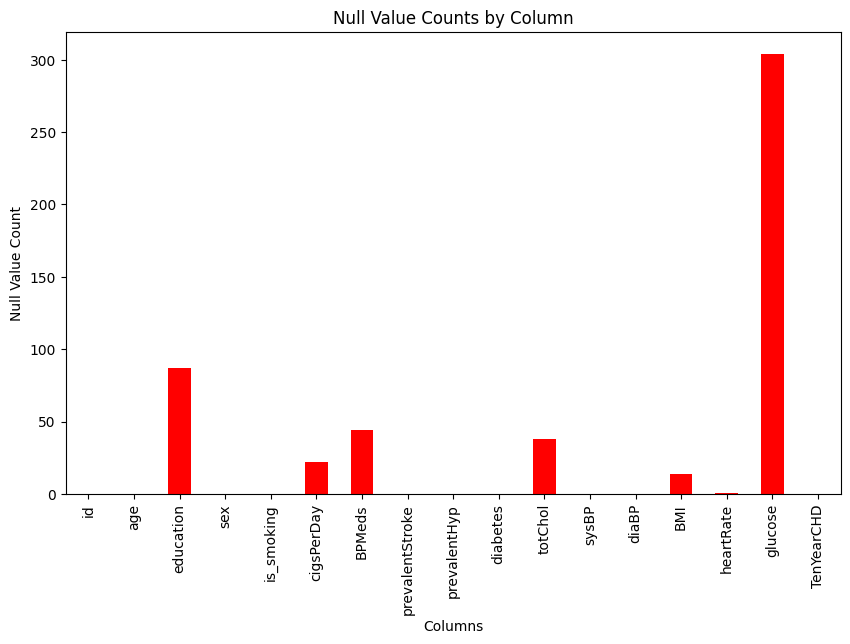

In [85]:
# Visualizing the missing values
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
missing_values_count.plot(kind='bar', color='red')
plt.xlabel('Columns')
plt.ylabel('Null Value Count')
plt.title('Null Value Counts by Column')
plt.xticks(rotation=90)  # Rotate the x-axis labels for better visibility
plt.show()

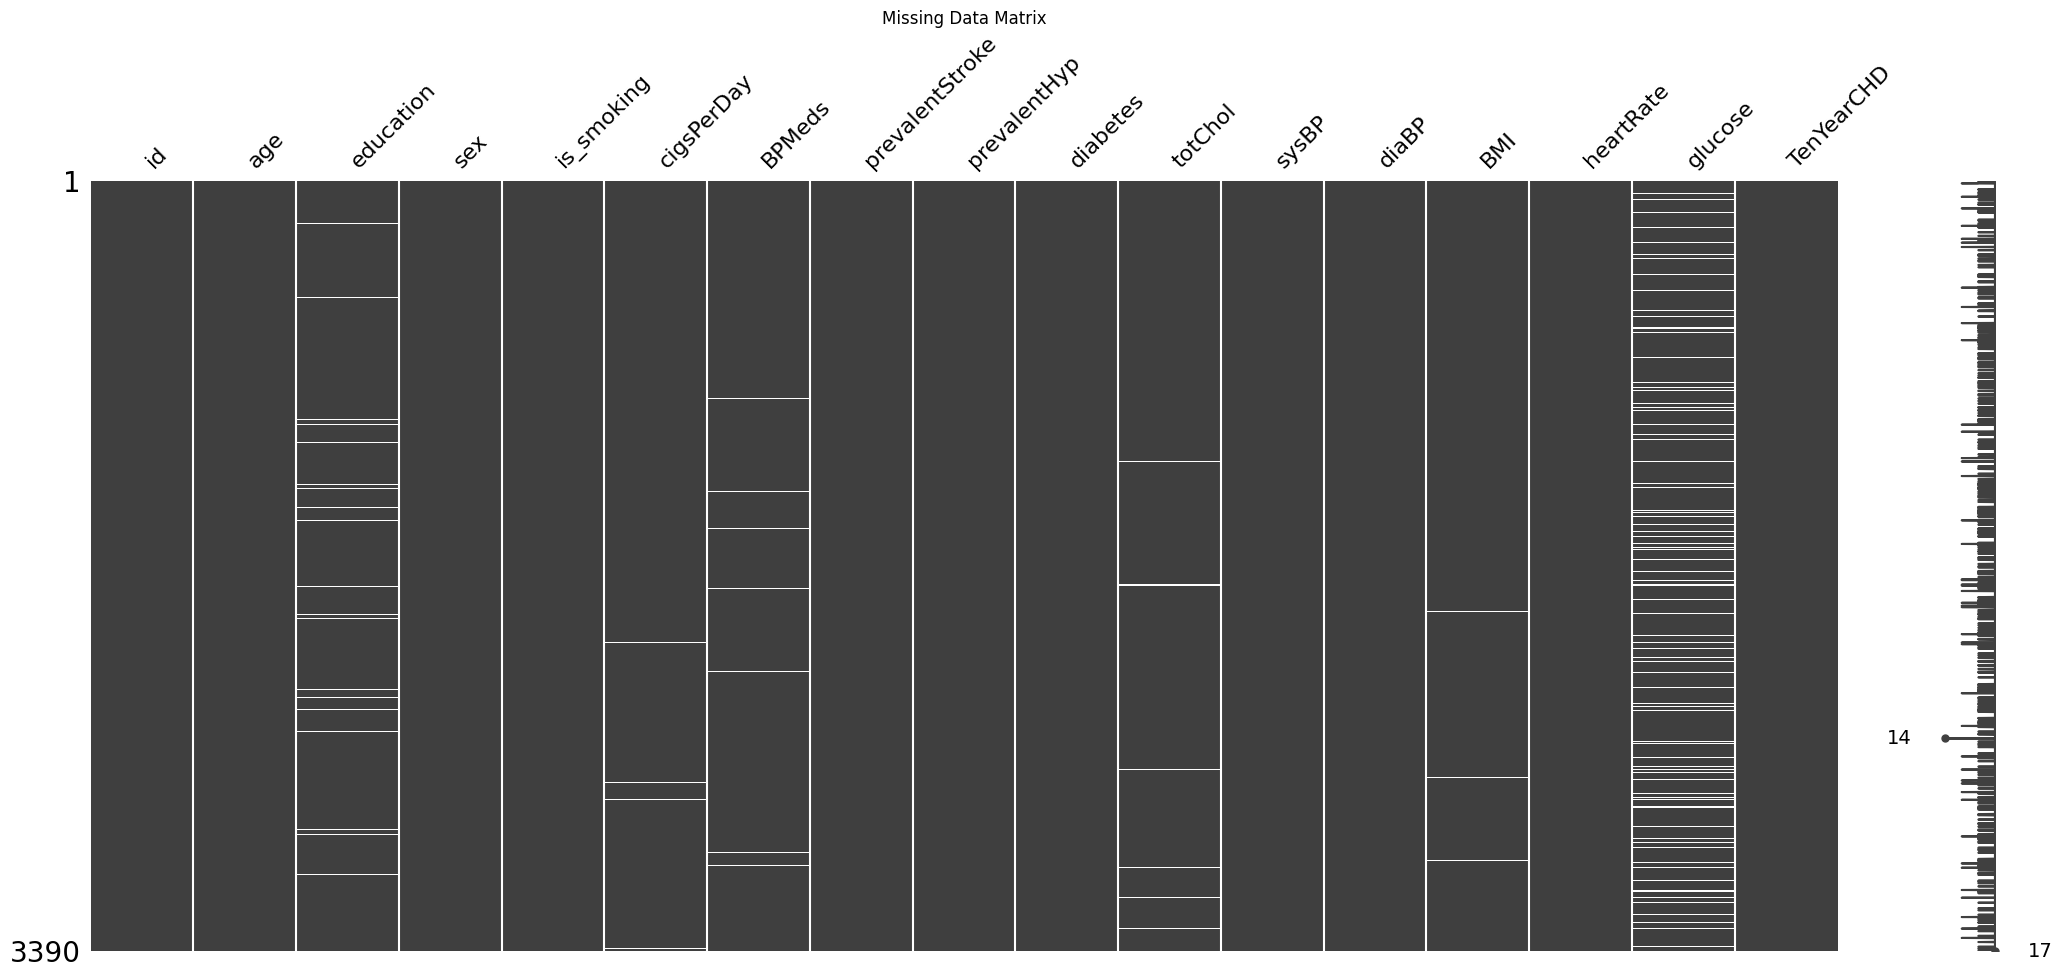

In [86]:
# Visualizing the missing values
# Create a missing data matrix visualization
msno.matrix(df)
plt.title('Missing Data Matrix')
plt.show()

### What did you know about your dataset?

There are several insights that can be gathered from the information provided about your dataset:

1. **Number of Entries:**
   - The dataset contains 3,390 entries.

2. **Columns and Data Types:**
   - There are 17 columns in the dataset.
   - The data types include integers (`int64`), floats (`float64`), and objects (`object`).

3. **Missing Values:**
   - Some columns have missing values (non-null counts are less than the total number of entries).
   - Columns with missing values include 'education', 'cigsPerDay', 'BPMeds', 'totChol', 'BMI', 'heartRate', and 'glucose'.

4. **Categorical Columns:**
   - 'sex' and 'is_smoking' are categorical columns represented as objects. You may want to check the unique values in these columns and potentially convert them to numerical values if needed.

5. **Numerical Columns:**
   - Columns such as 'age', 'education', 'cigsPerDay', 'BPMeds', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose' are numerical.

6. **Target Variable:**
   - 'TenYearCHD' is the target variable for binary classification, indicating whether a patient is at risk of CHD in the next 10 years.

7. **Summary Statistics:**
   - Descriptive statistics such as mean, standard deviation, minimum, and maximum are not provided, but calculating these would be useful for understanding the distribution of numerical features.

8. **Potential Preprocessing Steps:**
   - Imputation: Consider imputing missing values for columns like 'education', 'cigsPerDay', 'BPMeds', 'totChol', 'BMI', 'heartRate', and 'glucose'.
   - Categorical Encoding: Convert categorical columns ('sex' and 'is_smoking') into numerical format, possibly using one-hot encoding or label encoding.
   - Feature Scaling: Depending on the algorithms you plan to use, consider scaling numerical features.

These initial insights provide a foundation for further exploration and preprocessing of the dataset. You can visualize the distribution of numerical features, explore relationships between variables, and handle missing values before building and training your machine learning model.

## ***2. Understanding Your Variables***

In [87]:
# Assuming data_raw is your DataFrame
columns_list = df.columns

# Print the list of columns
print("Dataset Columns:")
print(columns_list)

Dataset Columns:
Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')


In [88]:
# Dataset Describe
df.describe(include="all").T

count unique  top  freq        mean         std    min  \
id               3390.0    NaN  NaN   NaN      1694.5  978.753033    0.0   
age              3390.0    NaN  NaN   NaN   49.542183    8.592878   32.0   
education        3303.0    NaN  NaN   NaN    1.970936    1.019081    1.0   
sex                3390      2    F  1923         NaN         NaN    NaN   
is_smoking         3390      2   NO  1703         NaN         NaN    NaN   
cigsPerDay       3368.0    NaN  NaN   NaN    9.069477   11.879078    0.0   
BPMeds           3346.0    NaN  NaN   NaN    0.029886    0.170299    0.0   
prevalentStroke  3390.0    NaN  NaN   NaN     0.00649    0.080309    0.0   
prevalentHyp     3390.0    NaN  NaN   NaN    0.315339    0.464719    0.0   
diabetes         3390.0    NaN  NaN   NaN    0.025664    0.158153    0.0   
totChol          3352.0    NaN  NaN   NaN  237.074284    45.24743  107.0   
sysBP            3390.0    NaN  NaN   NaN   132.60118    22.29203   83.5   
diaBP            3390.0    NaN  NaN   NaN   82.883038   12.023581   48.0   
BMI              3376.0    NaN  NaN   NaN   25.794964    4.115449  15.96   
heartRate        3389.0    NaN  NaN   NaN   75.977279   11.971868   45.0   
glucose          3086.0    NaN  NaN   NaN    82.08652   24.244753   40.0   
TenYearCHD       3390.0    NaN  NaN   NaN    0.150737    0.357846    0.0   

                    25%     50%      75%     max  
id               847.25  1694.5  2541.75  3389.0  
age                42.0    49.0     56.0    70.0  
education           1.0     2.0      3.0     4.0  
sex                 NaN     NaN      NaN     NaN  
is_smoking          NaN     NaN      NaN     NaN  
cigsPerDay          0.0     0.0     20.0    70.0  
BPMeds              0.0     0.0      0.0     1.0  
prevalentStroke     0.0     0.0      0.0     1.0  
prevalentHyp        0.0     0.0      1.0     1.0  
diabetes            0.0     0.0      0.0     1.0  
totChol           206.0   234.0    264.0   696.0  
sysBP             117.0   128.5    144.0   295.0  
diaBP              74.5    82.0     90.0   142.5  
BMI               23.02   25.38    28.04    56.8  
heartRate          68.0    75.0     83.0   143.0  
glucose            71.0    78.0     87.0   394.0  
TenYearCHD          0.0     0.0      0.0     1.0

### Variables Description

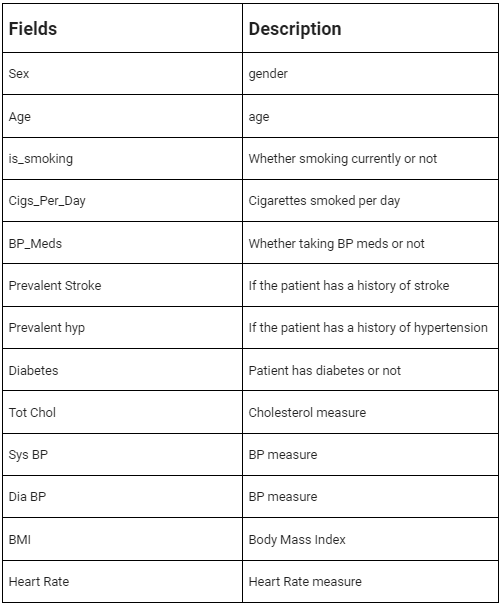

### Check Unique Values for each variable.

In [89]:
# Check Unique Values for each variable.
for column in df.columns:
    unique_values = df[column].unique()
    print(f'Unique values in column "{column}":')
    print(unique_values)
    print('\n')

Unique values in column "id":
[   0    1    2 ... 3387 3388 3389]


Unique values in column "age":
[64 36 46 50 61 41 55 53 43 44 58 51 56 42 38 63 35 54 62 47 34 39 59 45
 49 60 40 52 48 37 65 57 68 67 33 66 69 70 32]


Unique values in column "education":
[ 2.  4.  1.  3. nan]


Unique values in column "sex":
['F' 'M']


Unique values in column "is_smoking":
['YES' 'NO']


Unique values in column "cigsPerDay":
[ 3.  0. 10. 20. 30. 35. 40. 15.  9. 60. 17. 25.  5. 43.  7. 50. 19. 18.
  1. 45.  2.  6. nan 11.  8.  4. 14. 16. 23. 13. 12. 70. 38.]


Unique values in column "BPMeds":
[ 0. nan  1.]


Unique values in column "prevalentStroke":
[0 1]


Unique values in column "prevalentHyp":
[0 1]


Unique values in column "diabetes":
[0 1]


Unique values in column "totChol":
[221. 212. 250. 233. 241. 272. 238. 295. 220. 326.  nan 210. 213. 227.
 188. 240. 257. 267. 232. 199. 175. 164. 226. 248. 245. 279. 273. 252.
 198. 266. 216. 237. 193. 293. 180. 206. 215. 208. 262. 270. 292. 346.
 202. 

## 3. ***Data Wrangling***

### Data Wrangling Code

In [90]:
# Assuming data_raw is your DataFrame
columns_to_drop = ['id']

# Drop the specified columns
df = df.drop(columns=columns_to_drop)

# Display the first few rows of the cleaned DataFrame
df.head()

age  education sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
0   64        2.0   F        YES         3.0     0.0                0   
1   36        4.0   M         NO         0.0     0.0                0   
2   46        1.0   F        YES        10.0     0.0                0   
3   50        1.0   M        YES        20.0     0.0                0   
4   64        1.0   F        YES        30.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    221.0  148.0   85.0    NaN       90.0     80.0   
1             1         0    212.0  168.0   98.0  29.77       72.0     75.0   
2             0         0    250.0  116.0   71.0  20.35       88.0     94.0   
3             1         0    233.0  158.0   88.0  28.26       68.0     94.0   
4             0         0    241.0  136.5   85.0  26.42       70.0     77.0   

   TenYearCHD  
0           1  
1           0  
2           0  
3           1  
4           0

### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

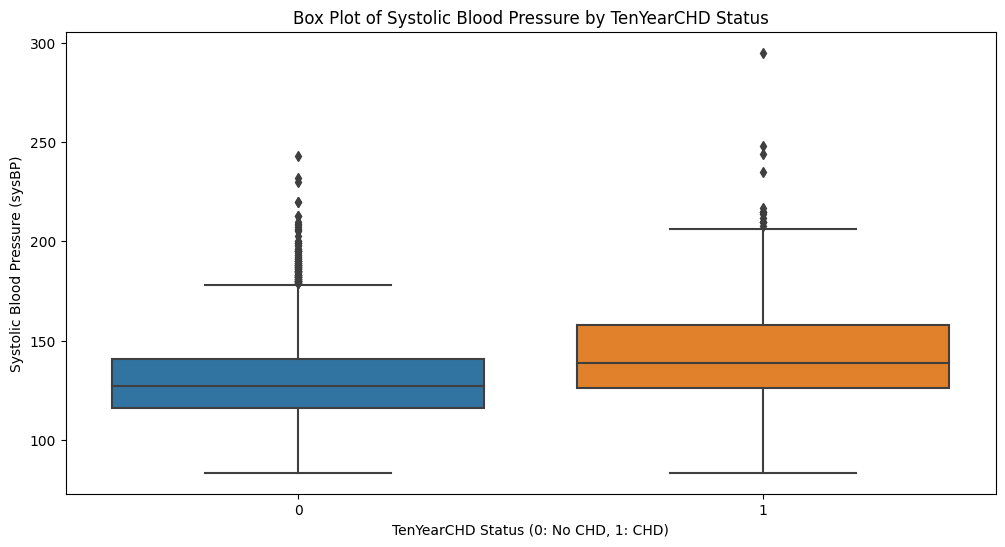

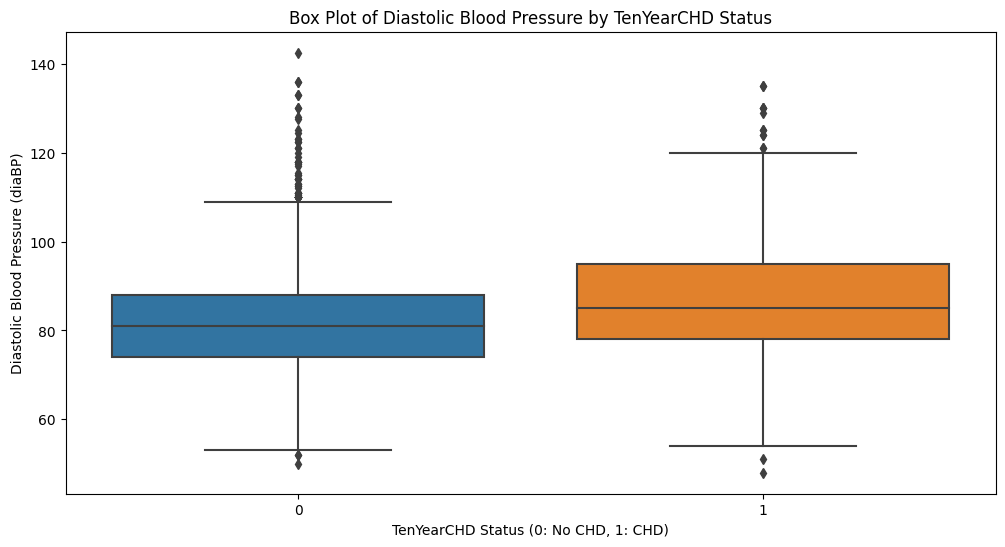

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt

# Box plot for Systolic Blood Pressure (sysBP)
plt.figure(figsize=(12, 6))
sns.boxplot(x='TenYearCHD', y='sysBP', data=df)
plt.title('Box Plot of Systolic Blood Pressure by TenYearCHD Status')
plt.xlabel('TenYearCHD Status (0: No CHD, 1: CHD)')
plt.ylabel('Systolic Blood Pressure (sysBP)')
plt.show()

# Box plot for Diastolic Blood Pressure (diaBP)
plt.figure(figsize=(12, 6))
sns.boxplot(x='TenYearCHD', y='diaBP', data=df)
plt.title('Box Plot of Diastolic Blood Pressure by TenYearCHD Status')
plt.xlabel('TenYearCHD Status (0: No CHD, 1: CHD)')
plt.ylabel('Diastolic Blood Pressure (diaBP)')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

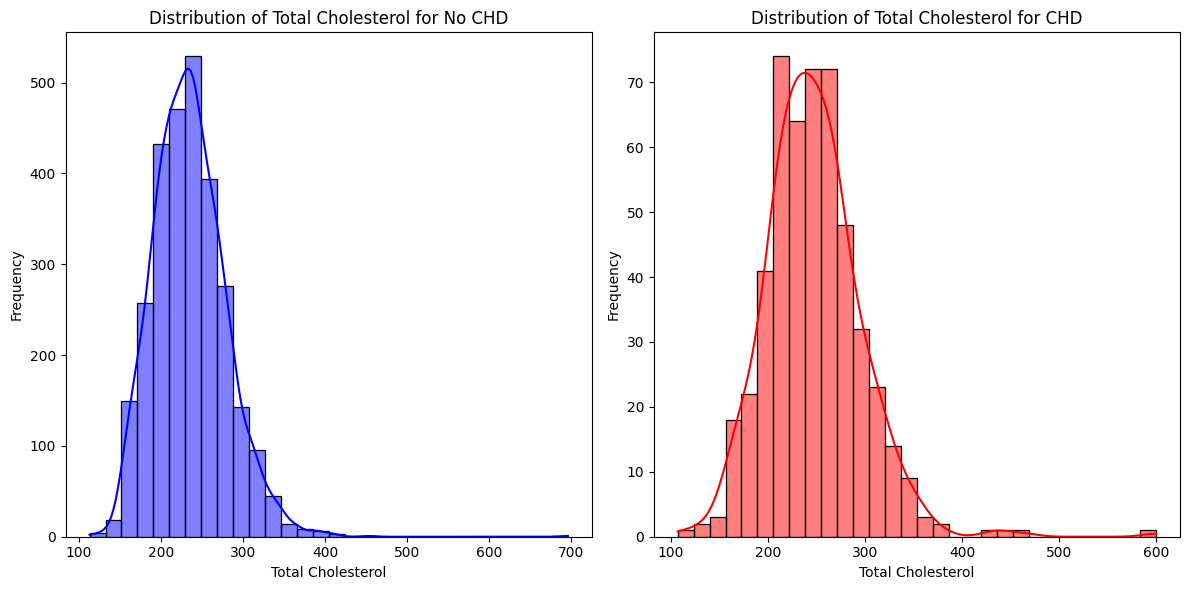

In [92]:
# Chart - 2 visualization code
# Set up the figure with subplots
plt.figure(figsize=(12, 6))

# Plot histogram for CHD = 0 (No CHD)
plt.subplot(1, 2, 1)
sns.histplot(df[df['TenYearCHD'] == 0]['totChol'], bins=30, kde=True, color='blue')
plt.title('Distribution of Total Cholesterol for No CHD')
plt.xlabel('Total Cholesterol')
plt.ylabel('Frequency')

# Plot histogram for CHD = 1 (With CHD)
plt.subplot(1, 2, 2)
sns.histplot(df[df['TenYearCHD'] == 1]['totChol'], bins=30, kde=True, color='red')
plt.title('Distribution of Total Cholesterol for CHD')
plt.xlabel('Total Cholesterol')
plt.ylabel('Frequency')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

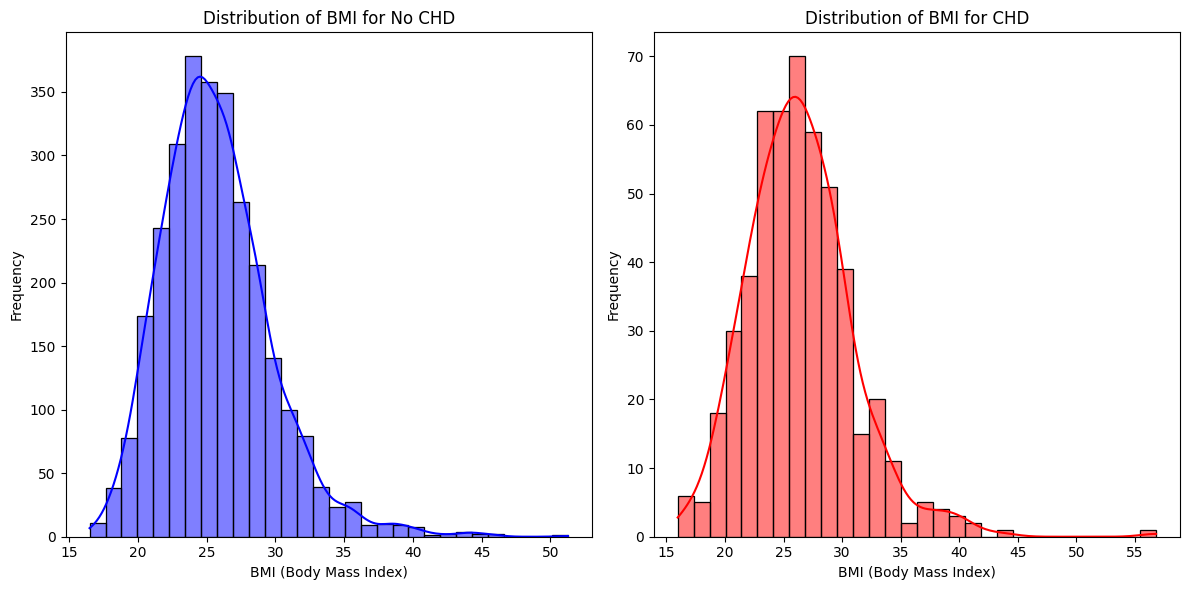

In [93]:
# Chart - 3 visualization code
# Set up the figure with subplots
plt.figure(figsize=(12, 6))

# Plot histogram for CHD = 0 (No CHD)
plt.subplot(1, 2, 1)
sns.histplot(df[df['TenYearCHD'] == 0]['BMI'], bins=30, kde=True, color='blue')
plt.title('Distribution of BMI for No CHD')
plt.xlabel('BMI (Body Mass Index)')
plt.ylabel('Frequency')

# Plot histogram for CHD = 1 (With CHD)
plt.subplot(1, 2, 2)
sns.histplot(df[df['TenYearCHD'] == 1]['BMI'], bins=30, kde=True, color='red')
plt.title('Distribution of BMI for CHD')
plt.xlabel('BMI (Body Mass Index)')
plt.ylabel('Frequency')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

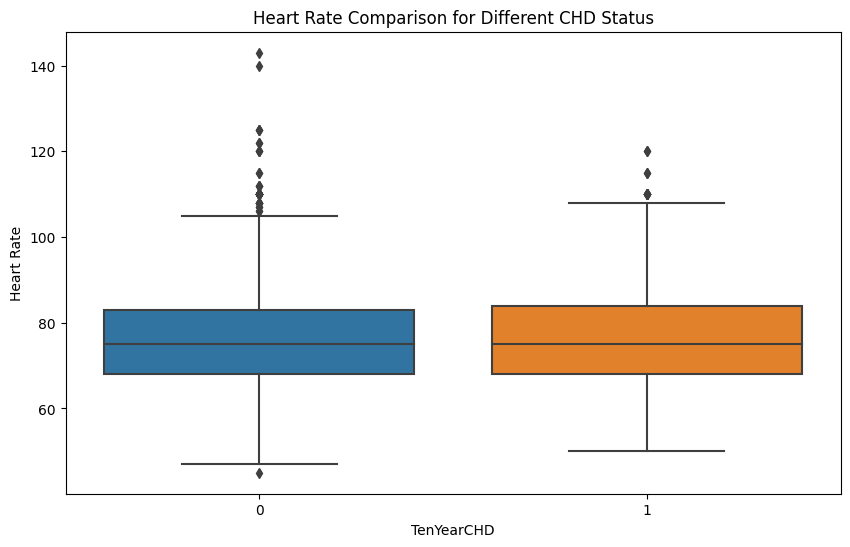

In [94]:
# Chart - 4 visualization code
# Set up the figure with subplots
plt.figure(figsize=(10, 6))

# Box plot for heart rates based on CHD status
sns.boxplot(x='TenYearCHD', y='heartRate', data=df)
plt.title('Heart Rate Comparison for Different CHD Status')
plt.xlabel('TenYearCHD')
plt.ylabel('Heart Rate')

# Show the plot
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

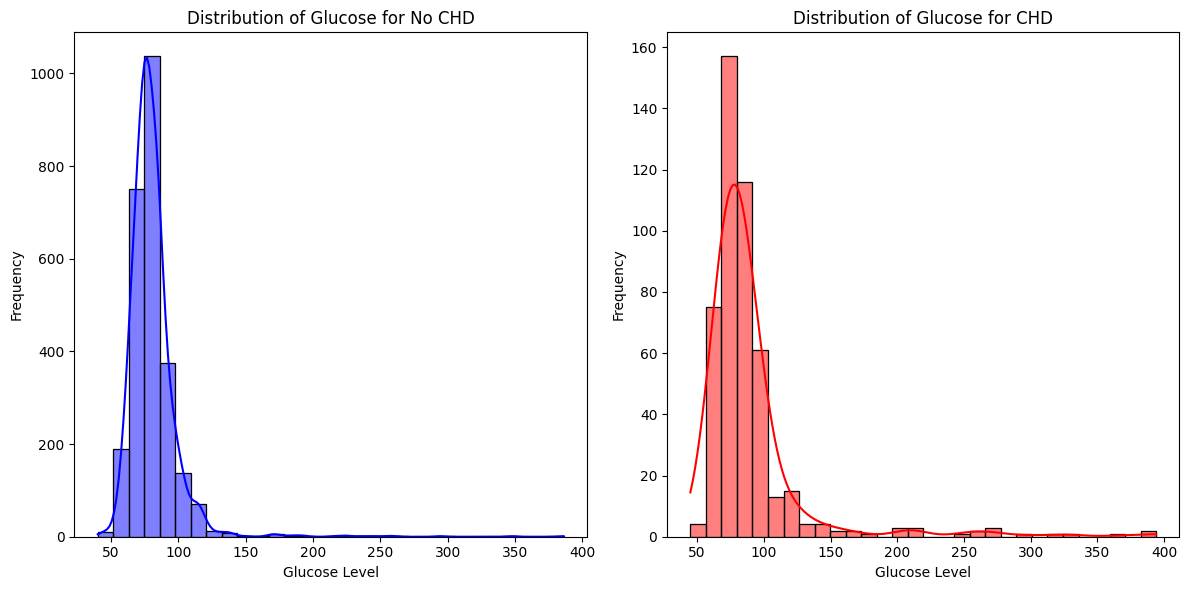

In [95]:
# Chart - 5 visualization code
# Set up the figure with subplots
plt.figure(figsize=(12, 6))

# Plot histogram for CHD = 0 (No CHD)
plt.subplot(1, 2, 1)
sns.histplot(df[df['TenYearCHD'] == 0]['glucose'], bins=30, kde=True, color='blue')
plt.title('Distribution of Glucose for No CHD')
plt.xlabel('Glucose Level')
plt.ylabel('Frequency')

# Plot histogram for CHD = 1 (With CHD)
plt.subplot(1, 2, 2)
sns.histplot(df[df['TenYearCHD'] == 1]['glucose'], bins=30, kde=True, color='red')
plt.title('Distribution of Glucose for CHD')
plt.xlabel('Glucose Level')
plt.ylabel('Frequency')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3390 non-null   int64  
 1   education        3303 non-null   float64
 2   sex              3390 non-null   object 
 3   is_smoking       3390 non-null   object 
 4   cigsPerDay       3368 non-null   float64
 5   BPMeds           3346 non-null   float64
 6   prevalentStroke  3390 non-null   int64  
 7   prevalentHyp     3390 non-null   int64  
 8   diabetes         3390 non-null   int64  
 9   totChol          3352 non-null   float64
 10  sysBP            3390 non-null   float64
 11  diaBP            3390 non-null   float64
 12  BMI              3376 non-null   float64
 13  heartRate        3389 non-null   float64
 14  glucose          3086 non-null   float64
 15  TenYearCHD       3390 non-null   int64  
dtypes: float64(9), int64(5), object(2)
memory usage: 423.9+ KB


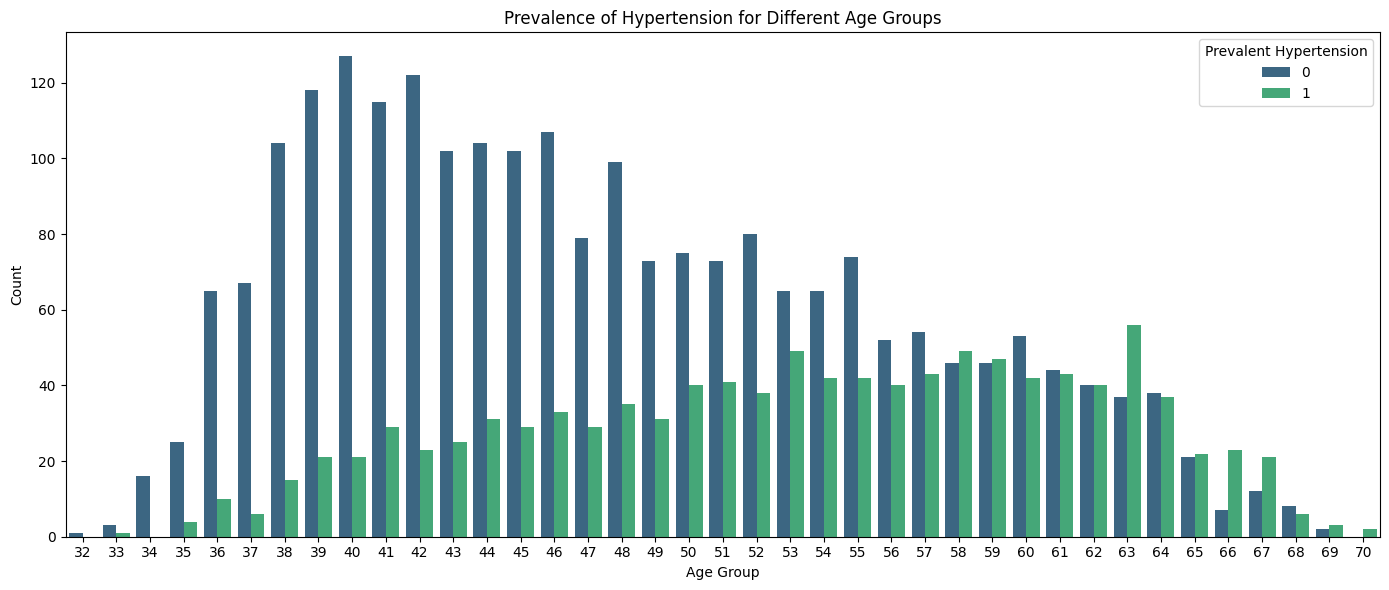

In [97]:
# Chart - 6 visualization code

# Set up the figure with subplots
plt.figure(figsize=(14, 6))

# Plot the prevalence of hypertension for different age groups
sns.countplot(x='age', hue='prevalentHyp', data=df, palette='viridis')
plt.title('Prevalence of Hypertension for Different Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Prevalent Hypertension')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

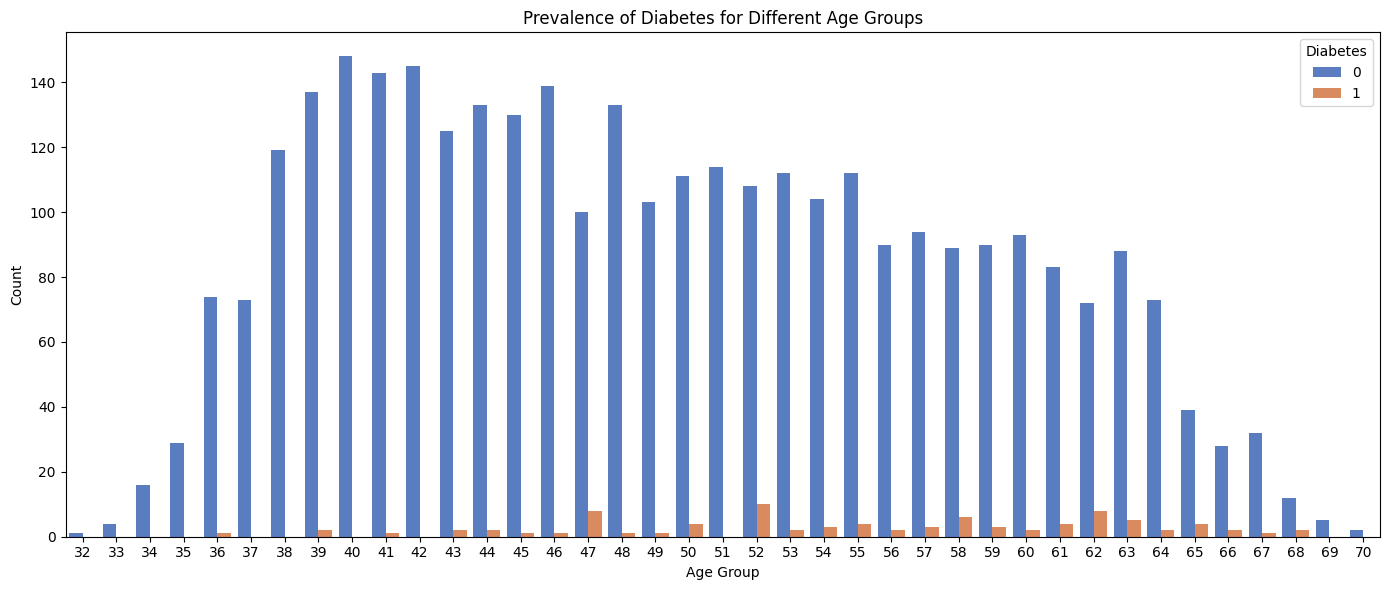

In [98]:
# Chart - 7 visualization code
# Set up the figure with subplots
plt.figure(figsize=(14, 6))
# Plot the prevalence of diabetes for different age groups
sns.countplot(x='age', hue='diabetes', data=df, palette='muted')
plt.title('Prevalence of Diabetes for Different Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Diabetes')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

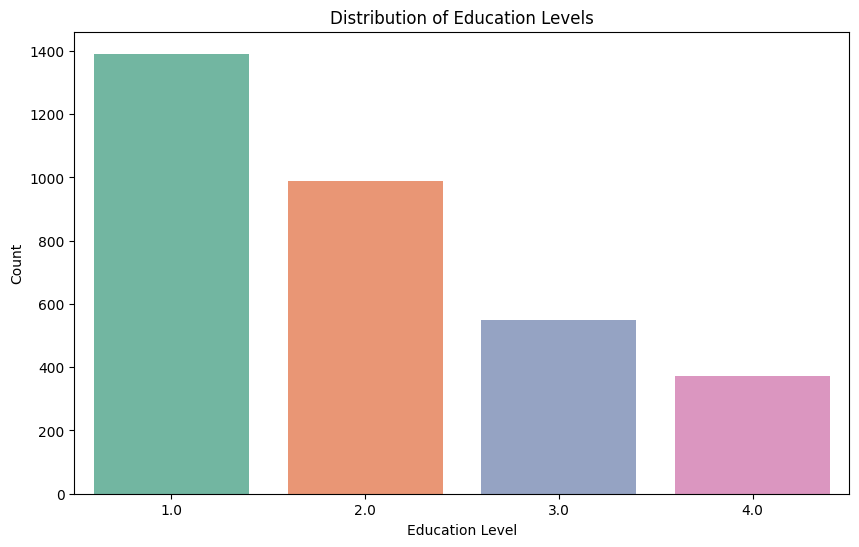

In [99]:
# Chart - 8 visualization code
# Plot the distribution of education levels
plt.figure(figsize=(10, 6))
sns.countplot(x='education', data=df, palette='Set2')
plt.title('Distribution of Education Levels')
plt.xlabel('Education Level')
plt.ylabel('Count')

# Show the plot
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [100]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [101]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [102]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [103]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13 - Distribution Plot

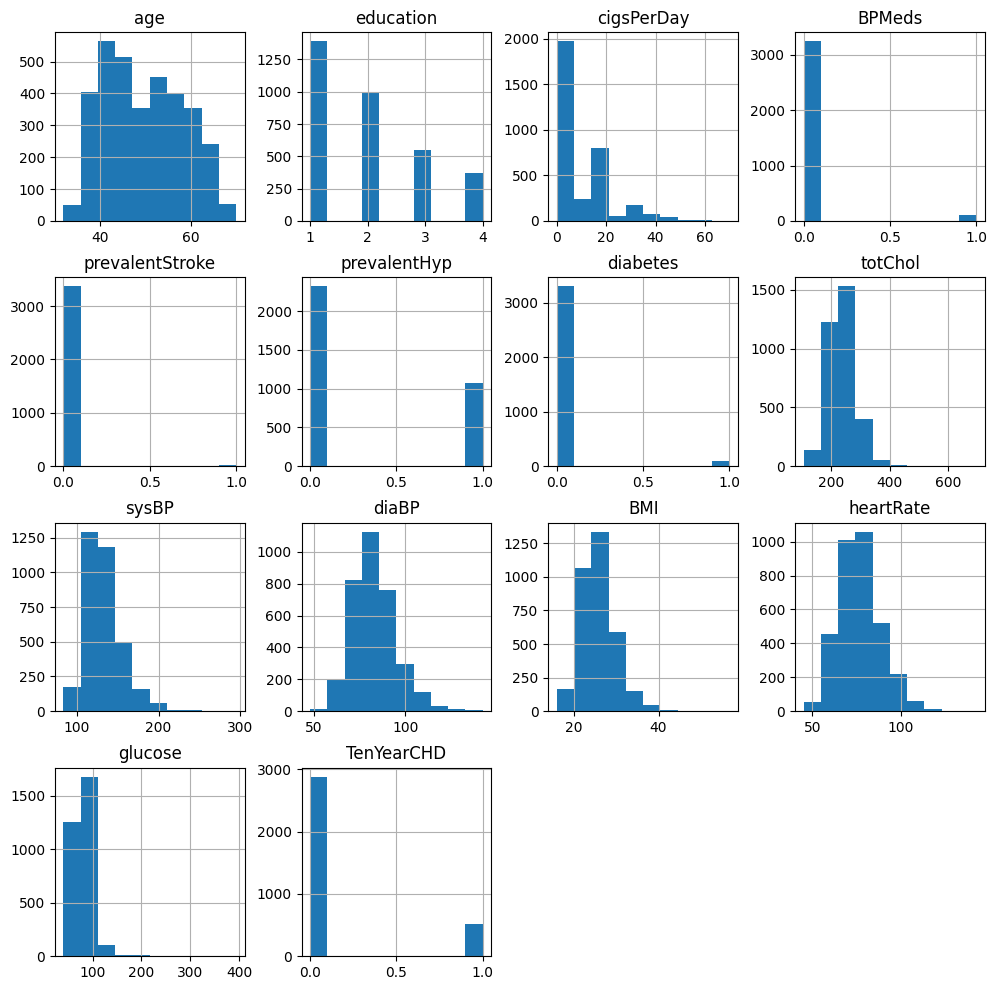

In [104]:
# Visualizing distributions using Histograms:
df.hist(figsize=(12, 12), grid=True);

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

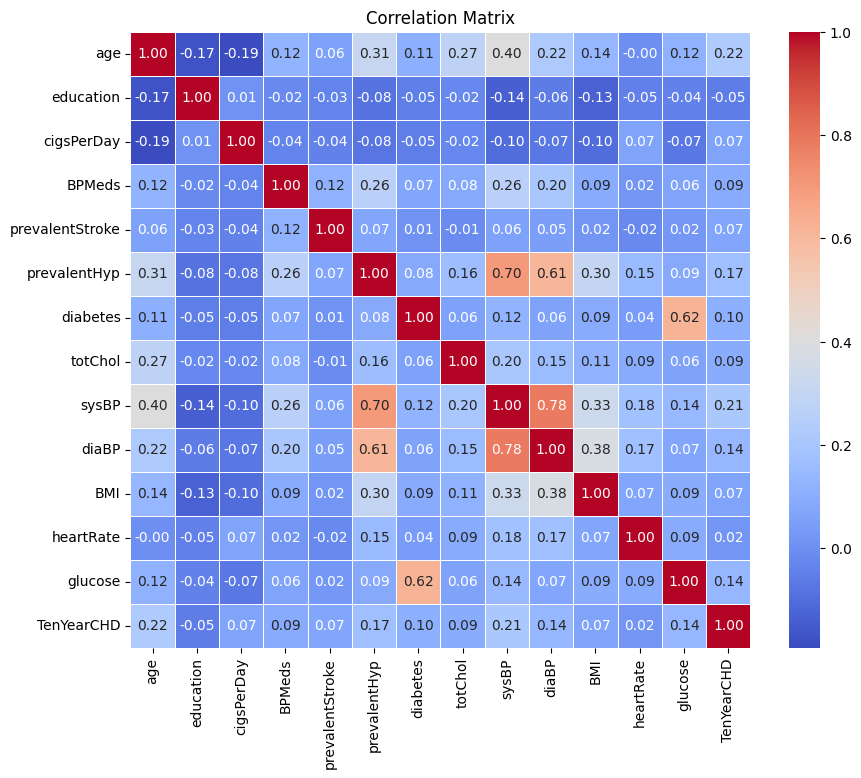

In [105]:
# Correlation Heatmap visualization code

# Calculate the correlation matrix
correlation_matrix = df.corr()

import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

In [106]:
# # Create a pair plot
# sns.pairplot(df)
# plt.show()

In [107]:
# # Assuming data_raw is your DataFrame
# columns_to_drop = ['education']

# # Drop the specified columns
# df = df.drop(columns=columns_to_drop)

# Display the first few rows of the cleaned DataFrame
df.head()

age  education sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
0   64        2.0   F        YES         3.0     0.0                0   
1   36        4.0   M         NO         0.0     0.0                0   
2   46        1.0   F        YES        10.0     0.0                0   
3   50        1.0   M        YES        20.0     0.0                0   
4   64        1.0   F        YES        30.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    221.0  148.0   85.0    NaN       90.0     80.0   
1             1         0    212.0  168.0   98.0  29.77       72.0     75.0   
2             0         0    250.0  116.0   71.0  20.35       88.0     94.0   
3             1         0    233.0  158.0   88.0  28.26       68.0     94.0   
4             0         0    241.0  136.5   85.0  26.42       70.0     77.0   

   TenYearCHD  
0           1  
1           0  
2           0  
3           1  
4           0

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [108]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [109]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [110]:
df.isna().sum()

age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [111]:
df[df['cigsPerDay'].isna()].head()

age  education sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
422   55        1.0   F        YES         NaN     0.0                0   
466   45        3.0   M        YES         NaN     0.0                0   
469   42        1.0   M        YES         NaN     0.0                0   
491   61        1.0   F        YES         NaN     0.0                0   
538   41        1.0   F        YES         NaN     0.0                0   

     prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
422             1         0    213.0  163.0   91.0  28.66       69.0     66.0   
466             1         0    170.0  145.5   99.0  26.74       83.0     85.0   
469             0         0    196.0  123.0   73.0  22.06       66.0      NaN   
491             1         0    356.0  168.0   98.0  27.30      103.0    106.0   
538             0         0    171.0  135.0   82.5  24.35       79.0     82.0   

     TenYearCHD  
422           0  
466           0  
469           0  
491           0  
538           0

In [112]:
df[df['BPMeds'].isna()].head()

age  education sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
8     41        2.0   F        YES        20.0     NaN                0   
102   68        2.0   F         NO         0.0     NaN                0   
128   67        2.0   F         NO         0.0     NaN                0   
174   60        1.0   F         NO         0.0     NaN                0   
194   56        1.0   F         NO         0.0     NaN                0   

     prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
8               0         0    220.0  126.0   78.0  20.70       86.0     79.0   
102             0         0    257.0  144.0   95.0  29.25       80.0     77.0   
128             0         0    261.0  117.0   63.0  22.55       75.0     83.0   
174             1         0    273.0  176.0   84.0  22.17       66.0     79.0   
194             1         0    391.0  126.0   84.0  24.83       80.0     78.0   

     TenYearCHD  
8             0  
102           0  
128           0  
174           0  
194           0

In [113]:
df[df['totChol'].isna()].head()

age  education sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
10    61        1.0   F         NO         0.0     0.0                0   
69    65        NaN   M         NO         0.0     0.0                0   
254   52        1.0   F         NO         0.0     0.0                0   
290   37        2.0   F        YES        30.0     0.0                0   
554   38        3.0   F        YES         3.0     1.0                0   

     prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
10              1         0      NaN  185.0  121.0  35.22       80.0      NaN   
69              0         0      NaN  152.5   97.5  28.35       65.0     73.0   
254             0         0      NaN  129.0   83.0  32.57       65.0      NaN   
290             0         0      NaN  115.0   79.0  28.41       85.0      NaN   
554             1         0      NaN  125.0   80.0  22.79       98.0      NaN   

     TenYearCHD  
10            0  
69            0  
254           0  
290           0  
554           0

In [114]:
df[df['BMI'].isna()].head()

age  education sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
0      64        2.0   F        YES         3.0     0.0                0   
54     63        1.0   M        YES        20.0     0.0                1   
271    47        2.0   F         NO         0.0     0.0                0   
720    61        1.0   F         NO         0.0     0.0                0   
1057   64        2.0   M        YES        20.0     0.0                0   

      prevalentHyp  diabetes  totChol  sysBP  diaBP  BMI  heartRate  glucose  \
0                0         0    221.0  148.0   85.0  NaN       90.0     80.0   
54               1         0    213.0  163.0   94.0  NaN       76.0     69.0   
271              0         0    195.0  126.0   75.0  NaN       60.0      NaN   
720              1         0    300.0  150.5   89.0  NaN       68.0     72.0   
1057             0         0    225.0  120.0   75.0  NaN       70.0     94.0   

      TenYearCHD  
0              1  
54             1  
271            1  
720            1  
1057           0

In [115]:
df[df['glucose'].isna()].head()

age  education sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
9    55        2.0   F         NO         0.0     0.0                0   
10   61        1.0   F         NO         0.0     0.0                0   
36   46        3.0   F         NO         0.0     0.0                0   
38   41        2.0   F        YES         9.0     1.0                1   
55   51        2.0   F         NO         0.0     0.0                0   

    prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
9              1         0    326.0  144.0   81.0  25.71       85.0      NaN   
10             1         0      NaN  185.0  121.0  35.22       80.0      NaN   
36             0         0    193.0  106.5   70.5  26.18       75.0      NaN   
38             1         0    180.0  114.0   70.0  22.41       92.0      NaN   
55             1         0    351.0  134.0   97.5  21.66      100.0      NaN   

    TenYearCHD  
9            0  
10           0  
36           0  
38           0  
55           0

In [116]:
df[df['heartRate'].isna()].head()

age  education sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
1388   64        1.0   M        YES        18.0     0.0                0   

      prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  \
1388             1         0    219.0  172.5   75.0  29.29        NaN   

      glucose  TenYearCHD  
1388     91.0           1

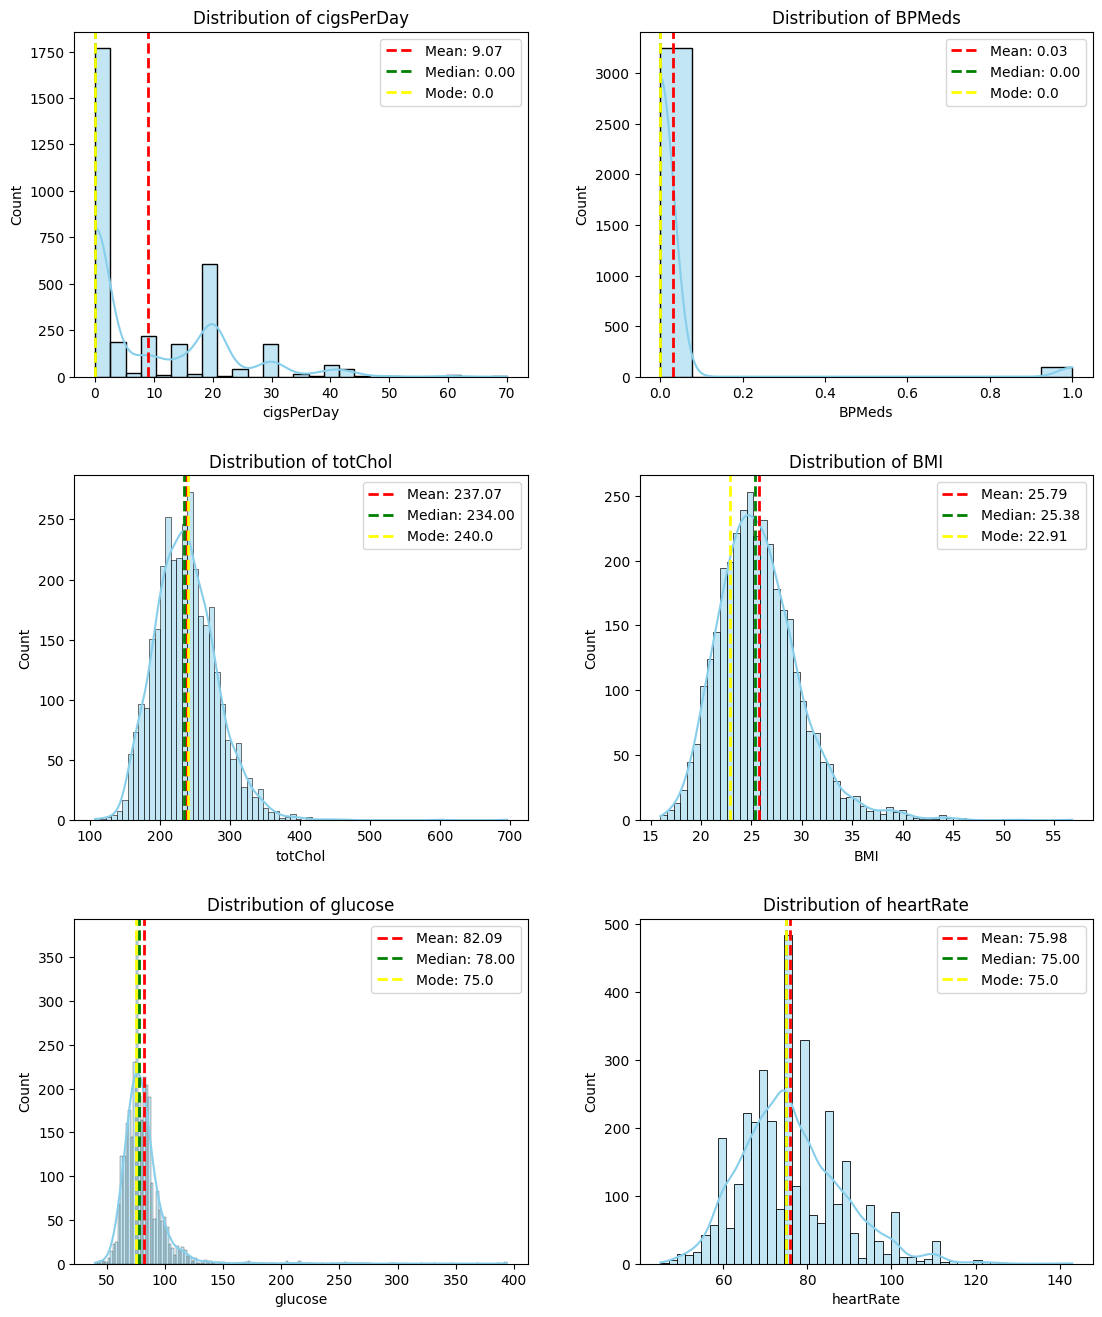

In [117]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming data_raw is your DataFrame

# List of columns to plot
columns_to_plot = ['cigsPerDay', 'BPMeds', 'totChol', 'BMI', 'glucose', 'heartRate']

# Set up subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 14))
fig.tight_layout(pad=5.0)

for i, column in enumerate(columns_to_plot):
    # Plot distribution
    sns.histplot(data_raw[column], kde=True, ax=axes[i // 2, i % 2], color='skyblue')

    # Annotate with mean, median, mode
    mean_value = data_raw[column].mean()
    median_value = data_raw[column].median()
    mode_value = data_raw[column].mode().values[0]

    axes[i // 2, i % 2].axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_value:.2f}')
    axes[i // 2, i % 2].axvline(median_value, color='green', linestyle='dashed', linewidth=2, label=f'Median: {median_value:.2f}')
    axes[i // 2, i % 2].axvline(mode_value, color='yellow', linestyle='dashed', linewidth=2, label=f'Mode: {mode_value}')

    axes[i // 2, i % 2].legend()
    axes[i // 2, i % 2].set_title(f'Distribution of {column}')

plt.show()

In [118]:
df.isna().sum()

age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [119]:
# Calculate the mean of a specific column
column_mode = df['education'].mode().values[0]

print(f"Mean of 'cigsPerDay': {column_mode}")

# Replace the Nan values with Mean.
df['education'].fillna(column_mode, inplace=True)

Mean of 'cigsPerDay': 1.0


In [120]:
# Calculate the mean of a specific column
column_mean = df['cigsPerDay'].mean()

print(f"Mean of 'cigsPerDay': {column_mean}")

# Replace the Nan values with Mean.
df['cigsPerDay'].fillna(column_mean, inplace=True)

Mean of 'cigsPerDay': 9.069477434679335


In [121]:
# Calculate the mean of a heartRate column
column_mean = df['heartRate'].mean()

print(f"Mean of 'heartRate': {column_mean}")

# Replace the Nan values with mean.
df['heartRate'].fillna(column_mean, inplace=True)

Mean of 'heartRate': 75.97727943346119


In [122]:
# Calculate the mean of a totChol column
column_median = df['totChol'].median()

print(f"Median of 'totChol': {column_median}")

# Replace the Nan values with Median.
df['totChol'].fillna(column_median, inplace=True)

Median of 'totChol': 234.0


In [123]:
# Calculate the mean of a BMI column
column_median = df['BMI'].median()

print(f"Median of 'BMI': {column_median}")

# Replace the Nan values with Median.
df['BMI'].fillna(column_median, inplace=True)

Median of 'BMI': 25.38


In [124]:
# Calculate the mean of a glucose column
column_median = df['glucose'].median()

print(f"Median of 'glucose': {column_median}")

# Replace the Nan values with Median.
df['glucose'].fillna(column_median, inplace=True)

Median of 'glucose': 78.0


In [125]:
# Calculate the mode of a BPMeds column
column_mode = df['BPMeds'].mode().values[0]

print(f"Mode of BPMeds: {column_mode}")

# Replace the Nan values with Mode.
df['BPMeds'].fillna(column_mode, inplace=True)

Mode of BPMeds: 0.0


In [126]:
df.isna().sum()

age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3390 non-null   int64  
 1   education        3390 non-null   float64
 2   sex              3390 non-null   object 
 3   is_smoking       3390 non-null   object 
 4   cigsPerDay       3390 non-null   float64
 5   BPMeds           3390 non-null   float64
 6   prevalentStroke  3390 non-null   int64  
 7   prevalentHyp     3390 non-null   int64  
 8   diabetes         3390 non-null   int64  
 9   totChol          3390 non-null   float64
 10  sysBP            3390 non-null   float64
 11  diaBP            3390 non-null   float64
 12  BMI              3390 non-null   float64
 13  heartRate        3390 non-null   float64
 14  glucose          3390 non-null   float64
 15  TenYearCHD       3390 non-null   int64  
dtypes: float64(9), int64(5), object(2)
memory usage: 423.9+ KB


In [128]:
# Select the non desired columns from 'df'
non_desired_column = ['education','age','sex','is_smoking','BPMeds','prevalentStroke','prevalentHyp','diabetes','TenYearCHD']

# Create a new DataFrame with the selected columns
data = df[non_desired_column]

data.head()

education  age sex is_smoking  BPMeds  prevalentStroke  prevalentHyp  \
0        2.0   64   F        YES     0.0                0             0   
1        4.0   36   M         NO     0.0                0             1   
2        1.0   46   F        YES     0.0                0             0   
3        1.0   50   M        YES     0.0                0             1   
4        1.0   64   F        YES     0.0                0             0   

   diabetes  TenYearCHD  
0         0           1  
1         0           0  
2         0           0  
3         0           1  
4         0           0

In [129]:
# Select the desired columns from 'df'
desired_columns = ['cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate','glucose']

# Create a new DataFrame with the selected columns
data_a = df[desired_columns]

data_a.head()

cigsPerDay  totChol  sysBP  diaBP    BMI  heartRate  glucose
0         3.0    221.0  148.0   85.0  25.38       90.0     80.0
1         0.0    212.0  168.0   98.0  29.77       72.0     75.0
2        10.0    250.0  116.0   71.0  20.35       88.0     94.0
3        20.0    233.0  158.0   88.0  28.26       68.0     94.0
4        30.0    241.0  136.5   85.0  26.42       70.0     77.0

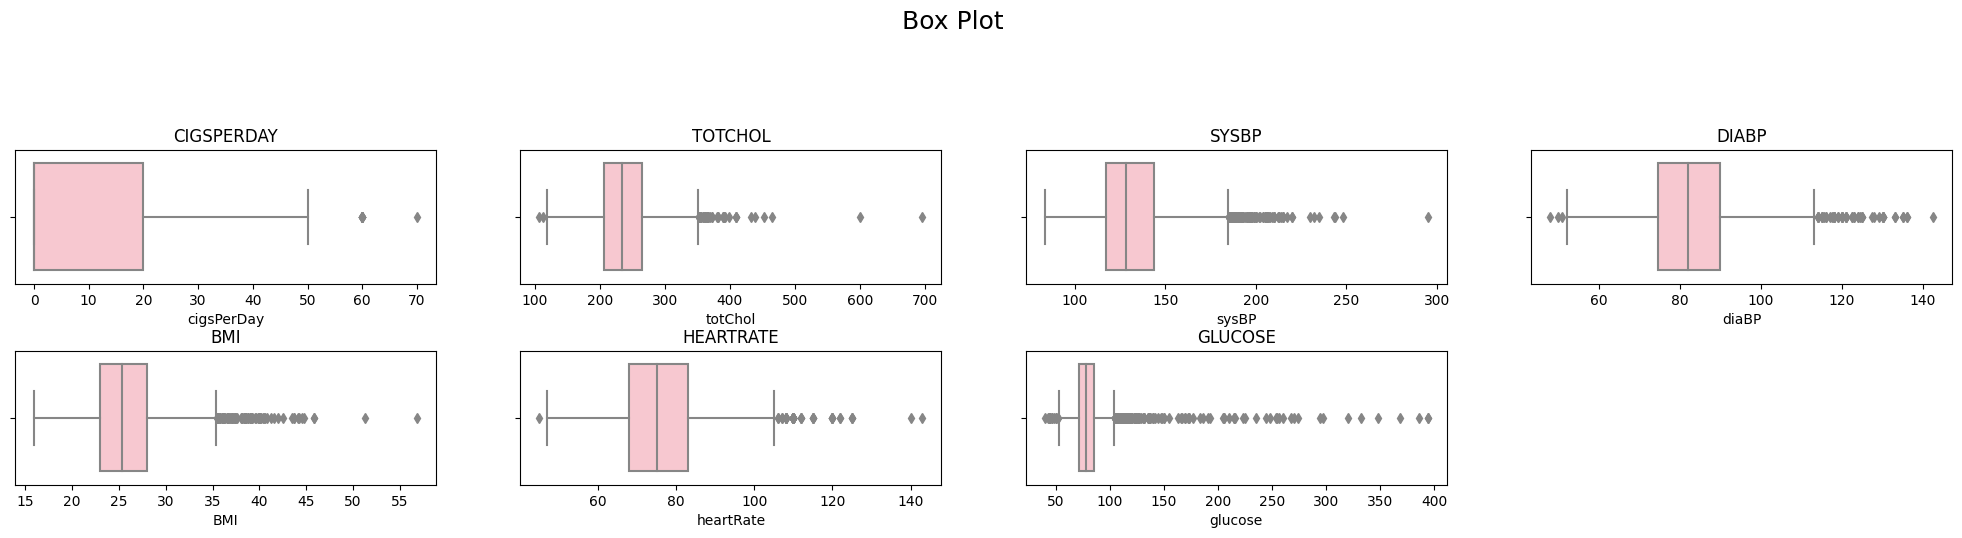

In [130]:
# Handling Outliers & Outlier treatments
df_2 = data_a.copy()

col_list = list(df_2.describe().columns)

#find the outliers using boxplot
plt.figure(figsize=(25, 20))
plt.suptitle("Box Plot", fontsize=18, y=0.95)

for n, ticker in enumerate(col_list):

    ax = plt.subplot(8, 4, n + 1)

    plt.subplots_adjust(hspace=0.5, wspace=0.2)

    sns.boxplot(x=df[ticker],color='pink', ax = ax)

    # chart formatting
    ax.set_title(ticker.upper())

In [131]:
# Handling Outliers & Outlier treatments

def find_outliers_iqr(df_2):
    # Calculate the first quartile (Q1) and third quartile (Q3) for each column
    q1 = df_2.quantile(0.25)
    q3 = df_2.quantile(0.75)

    # Calculate the interquartile range (IQR) for each column
    iqr = q3 - q1

    # Calculate the lower and upper bounds for outliers for each column
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Check for outliers in each column and count the number of outliers
    outliers_count = (df_2 < lower_bound) | (df_2 > upper_bound)
    num_outliers = outliers_count.sum()

    return num_outliers

outliers_per_column = find_outliers_iqr(df_2)
print("Number of outliers per column:")
print(outliers_per_column.sort_values(ascending = False))

Number of outliers per column:
glucose       214
sysBP         105
BMI            79
heartRate      64
diaBP          58
totChol        43
cigsPerDay      9
dtype: int64


In [132]:
# Handling Outliers & Outlier treatments
for ftr in col_list:
  print(ftr,'\n')
  q_25= np.percentile(df_2[ftr], 25)
  q_75 = np.percentile(df_2[ftr], 75)
  iqr = q_75 - q_25
  print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q_25, q_75, iqr))

  # calculate the outlier cutoff
  cut_off = iqr * 1.5
  lower = q_25 - cut_off
  upper = q_75 + cut_off
  print(f"\nlower = {lower} and upper = {upper} \n ")

  # identify outliers
  outliers = [x for x in df_2[ftr] if x < lower or x > upper]
  print('Identified outliers: %d' % len(outliers))

  #removing outliers
  if len(outliers)!=0:

    def bin(row):
      if row[ftr]> upper:
        return upper
      if row[ftr] < lower:
        return lower
      else:
        return row[ftr]


    data_a[ftr] =  df_2.apply (lambda row: bin(row), axis=1)
    print(f"{ftr} Outliers Removed")
  print("\n-------\n")

cigsPerDay 

Percentiles: 25th=0.000, 75th=20.000, IQR=20.000

lower = -30.0 and upper = 50.0 
 
Identified outliers: 9
cigsPerDay Outliers Removed

-------

totChol 

Percentiles: 25th=206.000, 75th=264.000, IQR=58.000

lower = 119.0 and upper = 351.0 
 
Identified outliers: 43
totChol Outliers Removed

-------

sysBP 

Percentiles: 25th=117.000, 75th=144.000, IQR=27.000

lower = 76.5 and upper = 184.5 
 
Identified outliers: 105
sysBP Outliers Removed

-------

diaBP 

Percentiles: 25th=74.500, 75th=90.000, IQR=15.500

lower = 51.25 and upper = 113.25 
 
Identified outliers: 58
diaBP Outliers Removed

-------

BMI 

Percentiles: 25th=23.030, 75th=27.997, IQR=4.967

lower = 15.578750000000005 and upper = 35.44875 
 
Identified outliers: 79
BMI Outliers Removed

-------

heartRate 

Percentiles: 25th=68.000, 75th=83.000, IQR=15.000

lower = 45.5 and upper = 105.5 
 
Identified outliers: 64
heartRate Outliers Removed

-------

glucose 

Percentiles: 25th=72.000, 75th=85.000, IQR=13.000


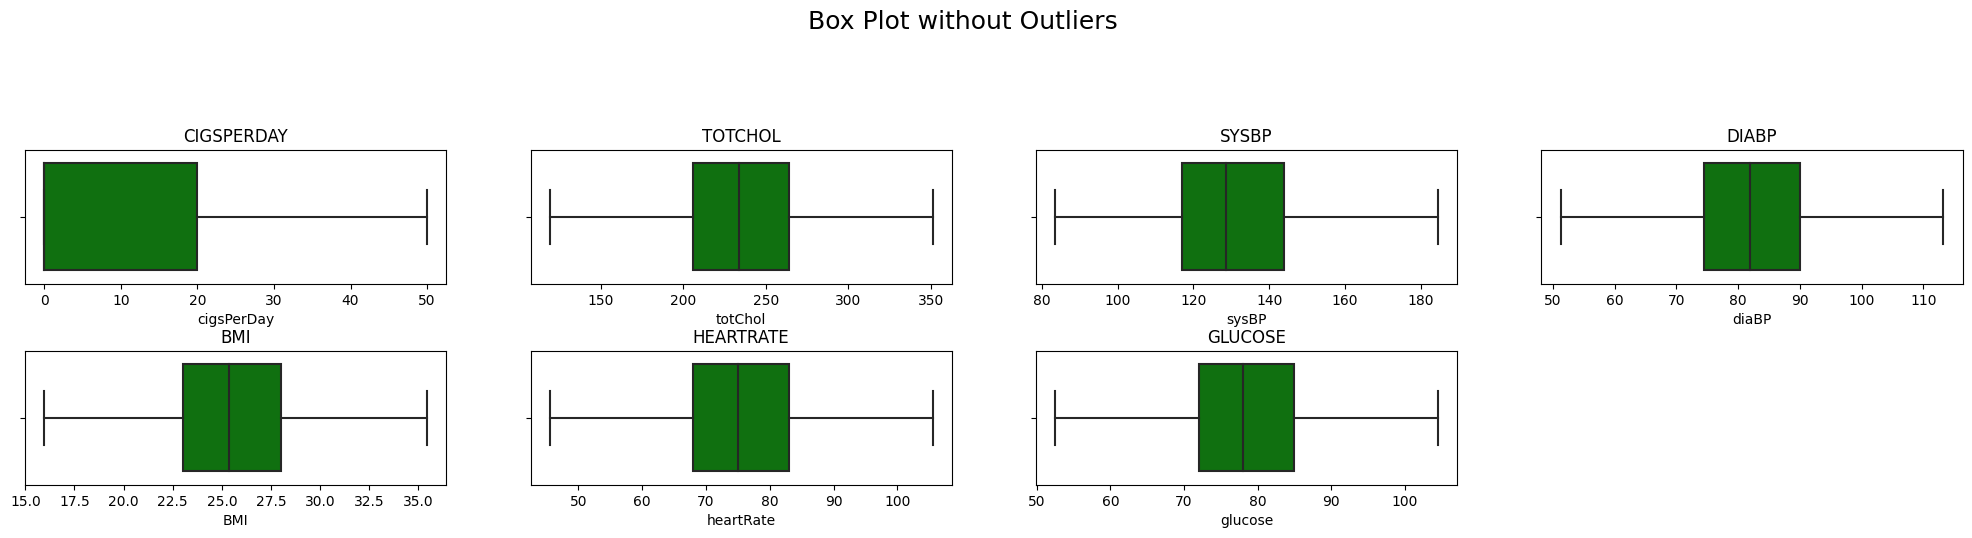

In [133]:
plt.figure(figsize=(25, 20))
plt.suptitle("Box Plot without Outliers", fontsize=18, y=0.95)
#plot the all figures in loop with boxplot
for n, ticker in enumerate(col_list):

    ax = plt.subplot(8, 4, n + 1)

    plt.subplots_adjust(hspace=0.5, wspace=0.2)

    sns.boxplot(x=data_a[ticker],color='g' ,ax = ax)

    # chart formatting
    ax.set_title(ticker.upper())

In [134]:
# Concatenate the two DataFrames vertically
df_new = pd.concat([data_a,data],axis=1)

In [135]:
data_a.head()

cigsPerDay  totChol  sysBP  diaBP    BMI  heartRate  glucose
0         3.0    221.0  148.0   85.0  25.38       90.0     80.0
1         0.0    212.0  168.0   98.0  29.77       72.0     75.0
2        10.0    250.0  116.0   71.0  20.35       88.0     94.0
3        20.0    233.0  158.0   88.0  28.26       68.0     94.0
4        30.0    241.0  136.5   85.0  26.42       70.0     77.0

In [136]:
data.head()

education  age sex is_smoking  BPMeds  prevalentStroke  prevalentHyp  \
0        2.0   64   F        YES     0.0                0             0   
1        4.0   36   M         NO     0.0                0             1   
2        1.0   46   F        YES     0.0                0             0   
3        1.0   50   M        YES     0.0                0             1   
4        1.0   64   F        YES     0.0                0             0   

   diabetes  TenYearCHD  
0         0           1  
1         0           0  
2         0           0  
3         0           1  
4         0           0

In [137]:
df_new.shape

(3390, 16)

In [138]:
df_new.head()

cigsPerDay  totChol  sysBP  diaBP    BMI  heartRate  glucose  education  \
0         3.0    221.0  148.0   85.0  25.38       90.0     80.0        2.0   
1         0.0    212.0  168.0   98.0  29.77       72.0     75.0        4.0   
2        10.0    250.0  116.0   71.0  20.35       88.0     94.0        1.0   
3        20.0    233.0  158.0   88.0  28.26       68.0     94.0        1.0   
4        30.0    241.0  136.5   85.0  26.42       70.0     77.0        1.0   

   age sex is_smoking  BPMeds  prevalentStroke  prevalentHyp  diabetes  \
0   64   F        YES     0.0                0             0         0   
1   36   M         NO     0.0                0             1         0   
2   46   F        YES     0.0                0             0         0   
3   50   M        YES     0.0                0             1         0   
4   64   F        YES     0.0                0             0         0   

   TenYearCHD  
0           1  
1           0  
2           0  
3           1  
4           0

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [139]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Fit and transform the 'rating' column to perform label encoding
df_new['sex_encoded'] = label_encoder.fit_transform(df_new['sex'])


df_new.drop('sex', axis=1, inplace=True)

In [140]:
df_new.head()

cigsPerDay  totChol  sysBP  diaBP    BMI  heartRate  glucose  education  \
0         3.0    221.0  148.0   85.0  25.38       90.0     80.0        2.0   
1         0.0    212.0  168.0   98.0  29.77       72.0     75.0        4.0   
2        10.0    250.0  116.0   71.0  20.35       88.0     94.0        1.0   
3        20.0    233.0  158.0   88.0  28.26       68.0     94.0        1.0   
4        30.0    241.0  136.5   85.0  26.42       70.0     77.0        1.0   

   age is_smoking  BPMeds  prevalentStroke  prevalentHyp  diabetes  \
0   64        YES     0.0                0             0         0   
1   36         NO     0.0                0             1         0   
2   46        YES     0.0                0             0         0   
3   50        YES     0.0                0             1         0   
4   64        YES     0.0                0             0         0   

   TenYearCHD  sex_encoded  
0           1            0  
1           0            1  
2           0            0  
3           1            1  
4           0            0

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [141]:
def blood_presure_classification(SysBP, DiaBP):
  if (SysBP < 90) or (DiaBP < 60):
    return 0 # 'Hypotension'
  if (SysBP < 120) and (DiaBP < 80):
    return 1 # 'Optimal'
  if (SysBP < 130) or (DiaBP < 86):
    return 2 # 'Normal'
  if (SysBP < 140) or (DiaBP < 90):
    return 3 # 'PreHypertensive'
  if (SysBP > 140) and (DiaBP < 90):
    return 4 # 'IsolatedSystolicHypertension'
  if (SysBP < 160) or (DiaBP < 100):
    return 5 # 'GradeI'
  if (SysBP < 180) or (DiaBP < 110):
    return 6 # 'GradeII'
  return 7 # 'GradeIII'

In [142]:
df_new['Hypertension'] = df_new.apply(lambda x: blood_presure_classification(x['sysBP'],x['diaBP']),axis=1)
df_new.head()

cigsPerDay  totChol  sysBP  diaBP    BMI  heartRate  glucose  education  \
0         3.0    221.0  148.0   85.0  25.38       90.0     80.0        2.0   
1         0.0    212.0  168.0   98.0  29.77       72.0     75.0        4.0   
2        10.0    250.0  116.0   71.0  20.35       88.0     94.0        1.0   
3        20.0    233.0  158.0   88.0  28.26       68.0     94.0        1.0   
4        30.0    241.0  136.5   85.0  26.42       70.0     77.0        1.0   

   age is_smoking  BPMeds  prevalentStroke  prevalentHyp  diabetes  \
0   64        YES     0.0                0             0         0   
1   36         NO     0.0                0             1         0   
2   46        YES     0.0                0             0         0   
3   50        YES     0.0                0             1         0   
4   64        YES     0.0                0             0         0   

   TenYearCHD  sex_encoded  Hypertension  
0           1            0             2  
1           0            1             5  
2           0            0             1  
3           1            1             3  
4           0            0             2

In [143]:
def diabetes_grade(glucose):
  if glucose < 100:
    return 1 # 'Normal'
  if glucose < 125:
    return 2 # 'Prediabetic'
  if glucose < 200:
    return 3 # 'Mild'
  if glucose < 400:
    return 4 # 'Moderate'
  return 5 # 'Severe'

In [144]:
df_new['Diabetes'] = df_new['glucose'].apply(lambda x: diabetes_grade(x))
df_new.head()

cigsPerDay  totChol  sysBP  diaBP    BMI  heartRate  glucose  education  \
0         3.0    221.0  148.0   85.0  25.38       90.0     80.0        2.0   
1         0.0    212.0  168.0   98.0  29.77       72.0     75.0        4.0   
2        10.0    250.0  116.0   71.0  20.35       88.0     94.0        1.0   
3        20.0    233.0  158.0   88.0  28.26       68.0     94.0        1.0   
4        30.0    241.0  136.5   85.0  26.42       70.0     77.0        1.0   

   age is_smoking  BPMeds  prevalentStroke  prevalentHyp  diabetes  \
0   64        YES     0.0                0             0         0   
1   36         NO     0.0                0             1         0   
2   46        YES     0.0                0             0         0   
3   50        YES     0.0                0             1         0   
4   64        YES     0.0                0             0         0   

   TenYearCHD  sex_encoded  Hypertension  Diabetes  
0           1            0             2         1  
1           0            1             5         1  
2           0            0             1         1  
3           1            1             3         1  
4           0            0             2         1

In [145]:
# Calculating MAP using 'SysBP' and 'DiaBP'.
df_new["mean_art_pressure"] = (df_new["sysBP"] + 2 * df_new["diaBP"])/3

In [146]:
# remove not useful columns
df_new.drop(columns=['sysBP', 'diaBP', 'is_smoking'], inplace=True)

In [147]:
# def categorize_heart_rate(heart_rate):
#     if heart_rate < 60:
#         return 'Low'
#     elif 60 <= heart_rate <= 100:
#         return 'Normal'
#     else:
#         return 'High'

# df_new['heart_rate_category'] = df_new['heartRate'].apply(categorize_heart_rate)

In [148]:
# def categorize_age_group(age):
#     if age < 18:
#         return 'Young'
#     elif 18 <= age < 35:
#         return 'Adult'
#     elif 35 <= age < 50:
#         return 'Middle-aged'
#     else:
#         return 'Senior'

# df_new['age_group'] = df_new['age'].apply(categorize_age_group)

In [149]:
# def categorize_bmi(bmi):
#     if bmi < 18.5:
#         return 'Underweight'
#     elif 18.5 <= bmi < 25:
#         return 'Normal'
#     elif 25 <= bmi < 30:
#         return 'Overweight'
#     else:
#         return 'Obese'

# df_new['bmi_category'] = df_new['BMI'].apply(categorize_bmi)

In [150]:
# df_new.head()

In [151]:
# import pandas as pd
# from sklearn.preprocessing import LabelEncoder

# # Assuming df is your DataFrame
# # ...

# # Create categorical encoding for 'heart_rate_category', 'age_group', and 'bmi_category'
# label_encoder = LabelEncoder()

# df_new['heart_rate_category_encoded'] = label_encoder.fit_transform(df_new['heart_rate_category'])
# df_new['age_group_encoded'] = label_encoder.fit_transform(df_new['age_group'])
# df_new['bmi_category_encoded'] = label_encoder.fit_transform(df_new['bmi_category'])

# # Drop the original columns
# df_new = df_new.drop(['heartRate', 'age', 'BMI', 'heart_rate_category', 'age_group', 'bmi_category'], axis=1)

# # Now df contains the encoded features and has dropped the original columns

#### 2. Feature Selection

In [152]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score

# "TenYearCHD" is the dependent variable


# Split the data into features (X) and target variable (y)
X = df_new.drop("TenYearCHD", axis=1)
y = df_new["TenYearCHD"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model to the training data
rf_classifier.fit(X_train, y_train)

# Get feature importances
feature_importances = pd.DataFrame(rf_classifier.feature_importances_, index=X_train.columns, columns=['importance'])

# Select features based on importance threshold
sfm = SelectFromModel(rf_classifier, threshold=0.10)  # Adjust the threshold as needed
sfm.fit(X_train, y_train)

# Transform the data to keep only important features
X_train_selected = sfm.transform(X_train)
X_test_selected = sfm.transform(X_test)

# Train a new Random Forest model on the selected features
rf_classifier_selected = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier_selected.fit(X_train_selected, y_train)

# Make predictions on the test set
y_pred_selected = rf_classifier_selected.predict(X_test_selected)

# Evaluate the model performance
accuracy_selected = accuracy_score(y_test, y_pred_selected)
print("Accuracy on Selected Features:", accuracy_selected)

# Print selected features
selected_features = X.columns[sfm.get_support()]
print("Selected Features:", selected_features)

Accuracy on Selected Features: 0.855457227138643
Selected Features: Index(['totChol', 'BMI', 'heartRate', 'glucose', 'age', 'mean_art_pressure'], dtype='object')


In [153]:
# Create a DataFrame with selected features and their importances
selected_features_df = pd.DataFrame({
    'Feature': selected_features,
    'Importance': feature_importances.loc[selected_features, 'importance']
})

# Sort the DataFrame by importance in descending order
selected_features_df = selected_features_df.sort_values(by='Importance', ascending=False)

# Display the DataFrame
print("Selected Features and Their Importances:")
print(selected_features_df)


Selected Features and Their Importances:
                             Feature  Importance
mean_art_pressure  mean_art_pressure    0.142860
BMI                              BMI    0.139055
totChol                      totChol    0.135944
age                              age    0.135323
glucose                      glucose    0.113413
heartRate                  heartRate    0.106530


In [154]:
# Create a DataFrame using selected features and fill the values with actual rows
df_selected_features = df_new[selected_features].copy()

# Add the target variable column ("TenYearCHD") to the new DataFrame
df_selected_features["TenYearCHD"] = df_new["TenYearCHD"]

# Display the new DataFrame with selected features and target variable
print("DataFrame with Selected Features:")
df_selected_features.head()

DataFrame with Selected Features:


totChol    BMI  heartRate  glucose  age  mean_art_pressure  TenYearCHD
0    221.0  25.38       90.0     80.0   64         106.000000           1
1    212.0  29.77       72.0     75.0   36         121.333333           0
2    250.0  20.35       88.0     94.0   46          86.000000           0
3    233.0  28.26       68.0     94.0   50         111.333333           1
4    241.0  26.42       70.0     77.0   64         102.166667           0

In [155]:
df_selected_features.shape

(3390, 7)

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [156]:
# Manipulate Features to minimize feature correlation and create new features
#examining the skewness in the dataset to check the distribution
skewness = df_selected_features.skew()

#ginding the absolute value
abs(skewness)

# setting up the threshold
skewness_threshold = 0.5

# Separate features into symmetrical and skewed based on skewness threshold
symmetrical_features = skewness[abs(skewness) < skewness_threshold].index
skewed_features = skewness[abs(skewness) >= skewness_threshold].index

# Create new DataFrames for symmetrical and skewed features
print('FEATURES FOLLOWED SYMMETRICAL DISTRIBUTION :')
symmetrical_data = df_new[symmetrical_features]
print(symmetrical_features)

print('FEATURES FOLLOWED SKEWED DISTRIBUTION :')
skewed_data = df_new[skewed_features]
print(skewed_features)

FEATURES FOLLOWED SYMMETRICAL DISTRIBUTION :
Index(['totChol', 'BMI', 'heartRate', 'glucose', 'age'], dtype='object')
FEATURES FOLLOWED SKEWED DISTRIBUTION :
Index(['mean_art_pressure', 'TenYearCHD'], dtype='object')


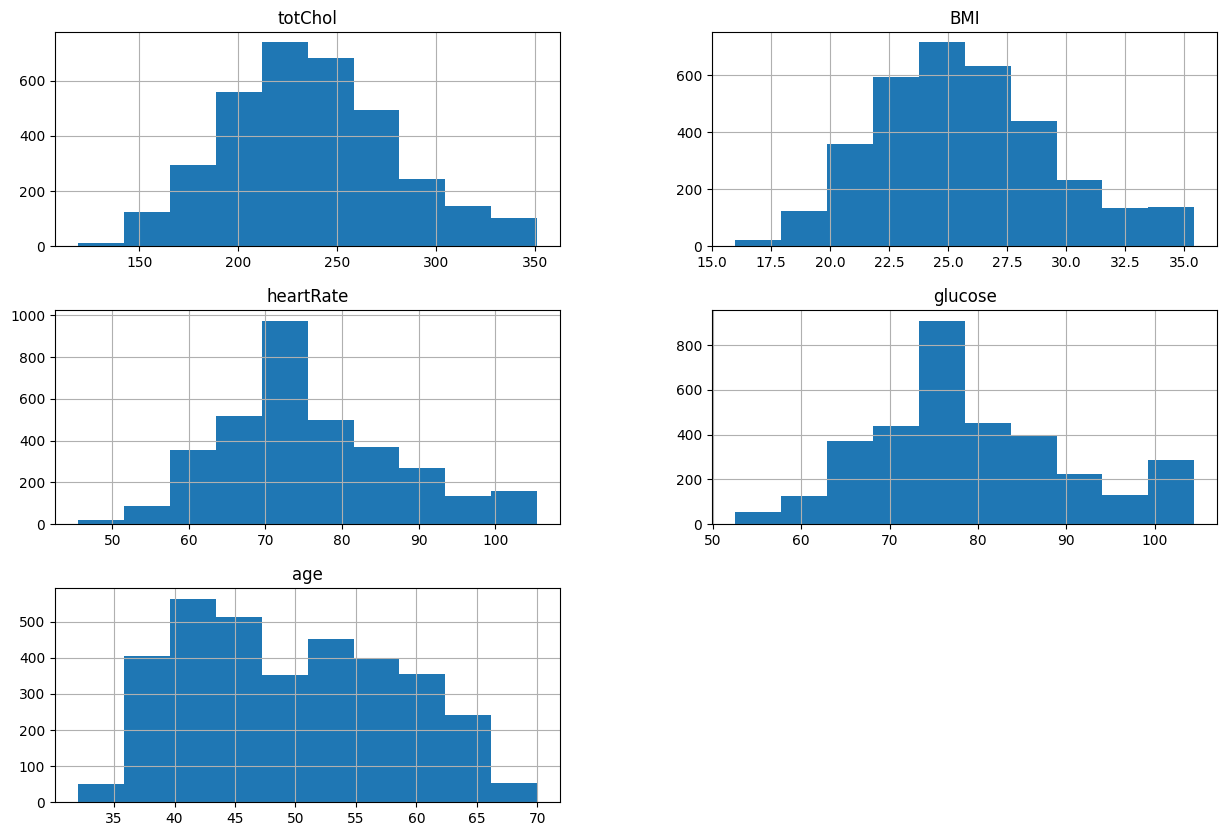

In [157]:
# Visualizing distributions using Histograms:
symmetrical_data.hist(figsize=(15, 10), grid=True);

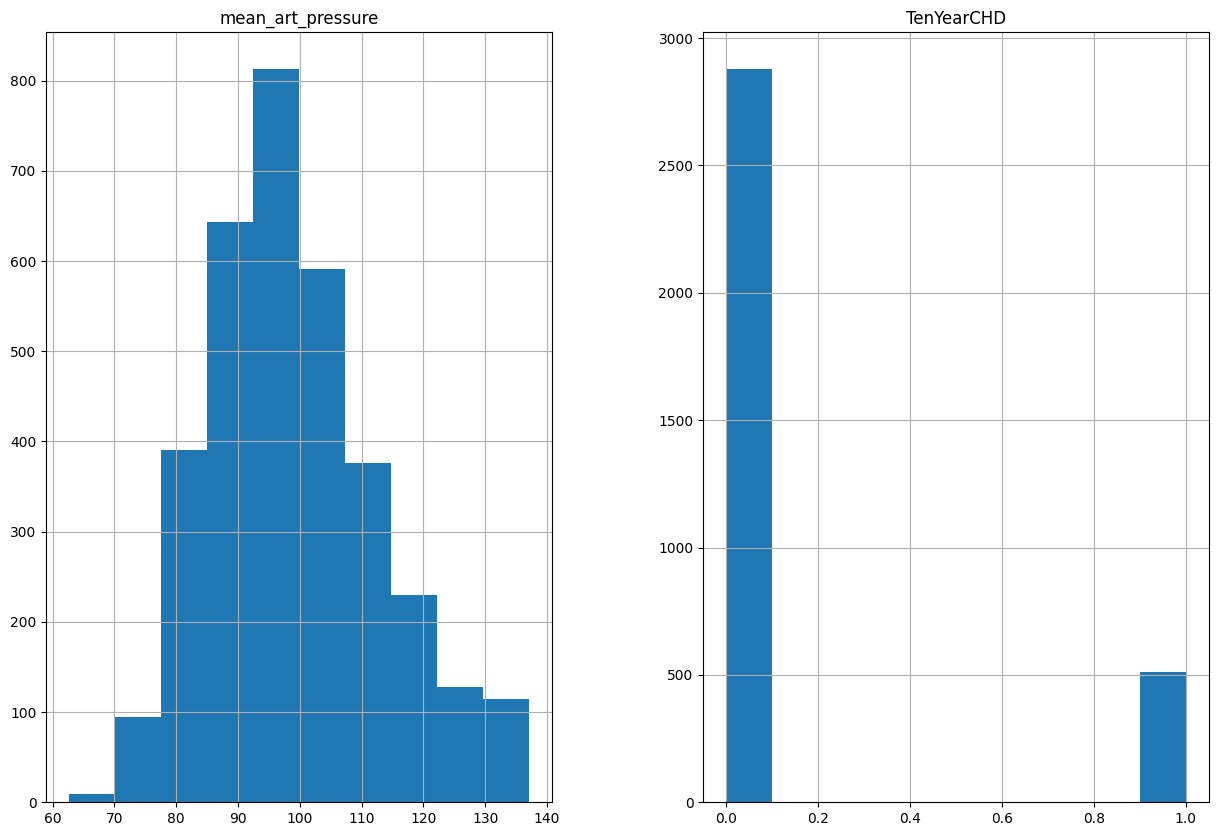

In [158]:
# Visualizing distributions using Histograms:
skewed_data.hist(figsize=(15, 10), grid=True);

In [159]:
skewed_data.columns

Index(['mean_art_pressure', 'TenYearCHD'], dtype='object')

In [160]:
import pandas as pd

# Assuming 'skewed_data' is your DataFrame
unique_value_counts = skewed_data.nunique()

# Print or view the unique value counts for each column
print(unique_value_counts)

mean_art_pressure    376
TenYearCHD             2
dtype: int64


In [107]:
# import numpy as np

# # Define a function to calculate the WoE values
# def calculate_woe(df, feature, target):
#     event_total = df[target].sum()
#     non_event_total = df.shape[0] - event_total
#     event_count = df.groupby(feature)[target].sum()
#     non_event_count = df.groupby(feature)[target].count() - event_count
#     woe_values = np.log((non_event_count / non_event_total) / (event_count / event_total))
#     return woe_values

# # Calculate WoE values for the skewed categorical features
# # woe_bpm = calculate_woe(skewed_data, 'BPMeds', 'TenYearCHD')
# woe_education = calculate_woe(skewed_data, 'education', 'TenYearCHD')
# woe_hypertension = calculate_woe(skewed_data, 'Hypertension', 'TenYearCHD')

# # Replace the original categorical values with the WoE values
# # skewed_data['BPMeds'] = skewed_data['BPMeds'].map(woe_bpm)
# skewed_data['education'] = skewed_data['education'].map(woe_education)
# skewed_data['Hypertension'] = skewed_data['Hypertension'].map(woe_hypertension)

In [161]:
# Select the columns you want to transform 'cigsPerDay'
columns_to_transform = ['mean_art_pressure' ]

# Apply log transformation to the selected columns
skewed_data[columns_to_transform] = skewed_data[columns_to_transform].apply(lambda x: np.log1p(x))

# Display the transformed DataFrame
skewed_data.head()

mean_art_pressure  TenYearCHD
0           4.672829           1
1           4.806750           0
2           4.465908           0
3           4.721471           1
4           4.636346           0

In [162]:
symmetrical_data.head()

totChol    BMI  heartRate  glucose  age
0    221.0  25.38       90.0     80.0   64
1    212.0  29.77       72.0     75.0   36
2    250.0  20.35       88.0     94.0   46
3    233.0  28.26       68.0     94.0   50
4    241.0  26.42       70.0     77.0   64

In [163]:
# Concatenate horizontally (along columns)
tranformed_data = pd.concat([symmetrical_data, skewed_data], axis=1)

In [164]:
tranformed_data.head()

totChol    BMI  heartRate  glucose  age  mean_art_pressure  TenYearCHD
0    221.0  25.38       90.0     80.0   64           4.672829           1
1    212.0  29.77       72.0     75.0   36           4.806750           0
2    250.0  20.35       88.0     94.0   46           4.465908           0
3    233.0  28.26       68.0     94.0   50           4.721471           1
4    241.0  26.42       70.0     77.0   64           4.636346           0

In [165]:
tranformed_data.isna().sum()

totChol              0
BMI                  0
heartRate            0
glucose              0
age                  0
mean_art_pressure    0
TenYearCHD           0
dtype: int64

In [166]:
tranformed_data.shape

(3390, 7)

### 6. Data Scaling

In [167]:
from sklearn.preprocessing import MinMaxScaler

# Separate the features (X) from the target variable
X = tranformed_data.drop("TenYearCHD", axis=1)
y = tranformed_data["TenYearCHD"]

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the features using the scaler
X_scaled = scaler.fit_transform(X)

# Create a DataFrame with the scaled features
df_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Add the target variable column ("TenYearCHD") to the scaled DataFrame
df_scaled["TenYearCHD"] = y

# Display the new DataFrame with scaled features and target variable
print("DataFrame with Scaled Features:")
df_scaled.head()

DataFrame with Scaled Features:


totChol       BMI  heartRate   glucose       age  mean_art_pressure  \
0  0.439655  0.483356   0.741667  0.528846  0.842105           0.671113   
1  0.400862  0.708614   0.441667  0.432692  0.105263           0.844228   
2  0.564655  0.225258   0.708333  0.798077  0.368421           0.403632   
3  0.491379  0.631133   0.375000  0.798077  0.473684           0.733990   
4  0.525862  0.536720   0.408333  0.471154  0.842105           0.623952   

   TenYearCHD  
0           1  
1           0  
2           0  
3           1  
4           0

In [168]:
# from sklearn.preprocessing import StandardScaler

# # Assuming "transformed_data" is your DataFrame
# # Replace this name with your actual DataFrame name



# # Initialize the StandardScaler
# scaler = StandardScaler()

# # Fit and transform the features using the scaler
# X_scaled = scaler.fit_transform(X)

# # Create a DataFrame with the scaled features
# df_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# # Add the target variable column ("TenYearCHD") to the scaled DataFrame
# df_scaled["TenYearCHD"] = y

# # Display the new DataFrame with scaled features and target variable
# print("DataFrame with Scaled Features:")
# df_scaled.head()


In [169]:
# Drop all rows with NaN values in place
df_scaled.dropna(inplace=True)

In [170]:
df_scaled.isna().sum()

totChol              0
BMI                  0
heartRate            0
glucose              0
age                  0
mean_art_pressure    0
TenYearCHD           0
dtype: int64

In [171]:
df_scaled.shape

(3390, 7)

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [172]:
# Split your data to train and test. Choose Splitting ratio wisely.
X = df_scaled.drop("TenYearCHD", axis=1)
y = df_scaled['TenYearCHD']

In [173]:
#splitting the data into 80/20 ration
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=3)

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [174]:
# Install the imbalanced-learn library
!pip install -U imbalanced-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.6/235.6 kB 3.3 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.10.1
    Uninstalling imbalanced-learn-0.10.1:
      Successfully uninstalled imbalanced-learn-0.10.1


In [175]:
# Assuming y_train and y_test are pandas Series or NumPy arrays
import pandas as pd

# Check value counts for y_train
print("y_train value counts:")
print(pd.Series(y_train).value_counts())

# Check value counts for y_test
print("\ny_test value counts:")
print(pd.Series(y_test).value_counts())

y_train value counts:
0    2031
1     342
Name: TenYearCHD, dtype: int64

y_test value counts:
0    848
1    169
Name: TenYearCHD, dtype: int64


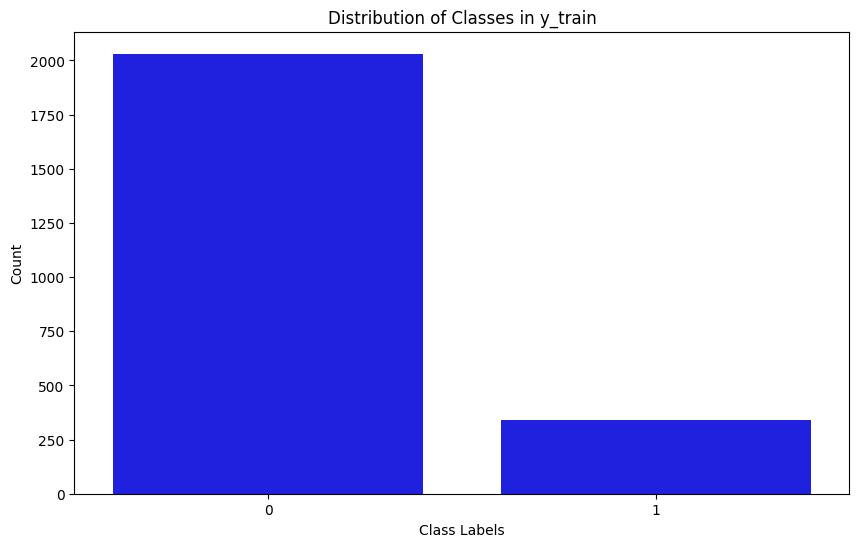

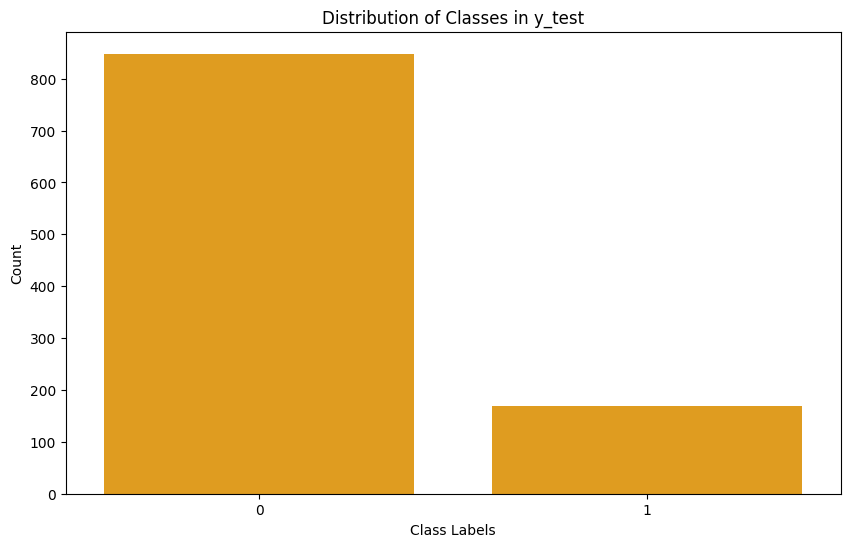

In [176]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming y_train and y_test are pandas Series or NumPy arrays
import pandas as pd

# Check value counts for y_train
y_train_counts = pd.Series(y_train).value_counts()

# Check value counts for y_test
y_test_counts = pd.Series(y_test).value_counts()

# Plotting the distribution for y_train
plt.figure(figsize=(10, 6))
sns.barplot(x=y_train_counts.index, y=y_train_counts.values, color='blue')
plt.title('Distribution of Classes in y_train')
plt.xlabel('Class Labels')
plt.ylabel('Count')
plt.show()

# Plotting the distribution for y_test
plt.figure(figsize=(10, 6))
sns.barplot(x=y_test_counts.index, y=y_test_counts.values, color='orange')
plt.title('Distribution of Classes in y_test')
plt.xlabel('Class Labels')
plt.ylabel('Count')
plt.show()

In [177]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Convert the resampled data back to DataFrames
X_train_resampled_df = pd.DataFrame(X_train_resampled, columns=X_train.columns)
y_train_resampled_df = pd.Series(y_train_resampled, name=y_train.name)

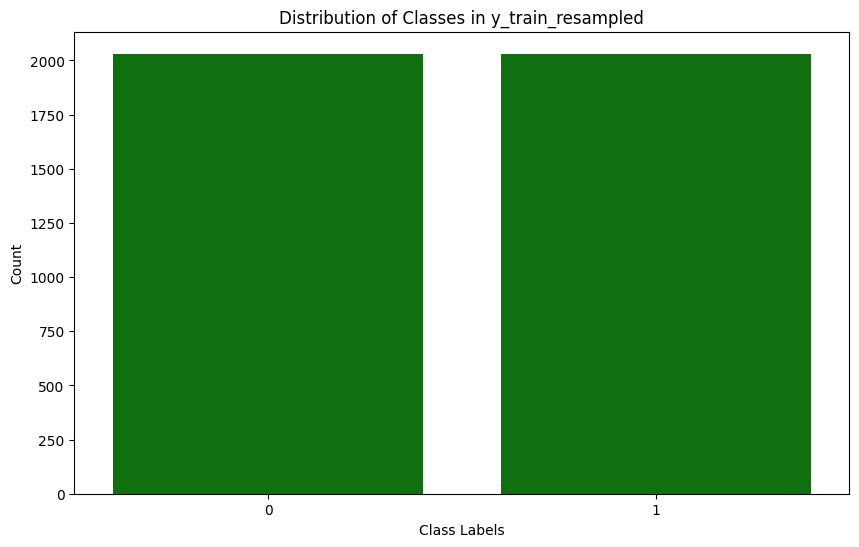

In [178]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check value counts for y_train_resampled
y_train_resampled_counts = y_train_resampled_df.value_counts()

# Plotting the distribution for y_train_resampled
plt.figure(figsize=(10, 6))
sns.barplot(x=y_train_resampled_counts.index, y=y_train_resampled_counts.values, color='green')
plt.title('Distribution of Classes in y_train_resampled')
plt.xlabel('Class Labels')
plt.ylabel('Count')
plt.show()

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

# ***7. ML Model Implementation***

## BASIC MODELS

### Model 1 - Logistic Regression


Threshold: 0.2


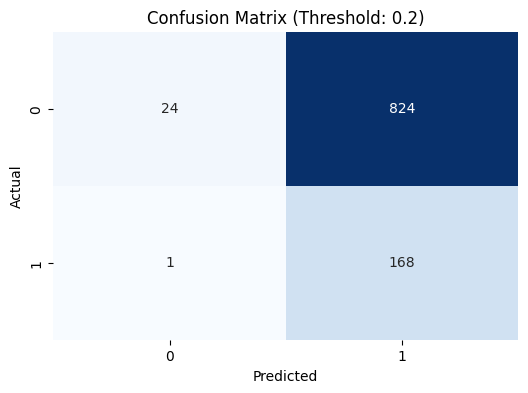

Accuracy: 0.1887905604719764
AUC-ROC Score: 0.7113570391872278
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.03      0.05       848
           1       0.17      0.99      0.29       169

    accuracy                           0.19      1017
   macro avg       0.56      0.51      0.17      1017
weighted avg       0.83      0.19      0.09      1017

---------------------------------------------------------

Threshold: 0.3


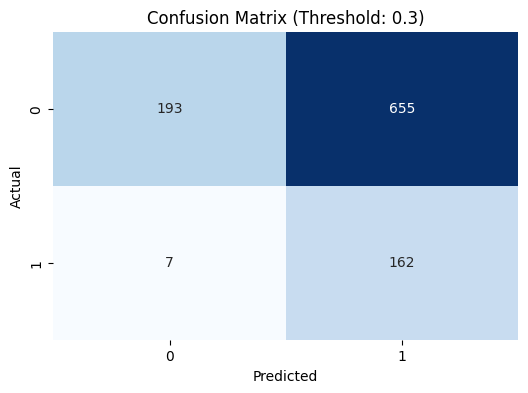

Accuracy: 0.34906588003933137
AUC-ROC Score: 0.7113570391872278
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.23      0.37       848
           1       0.20      0.96      0.33       169

    accuracy                           0.35      1017
   macro avg       0.58      0.59      0.35      1017
weighted avg       0.84      0.35      0.36      1017

---------------------------------------------------------

Threshold: 0.4


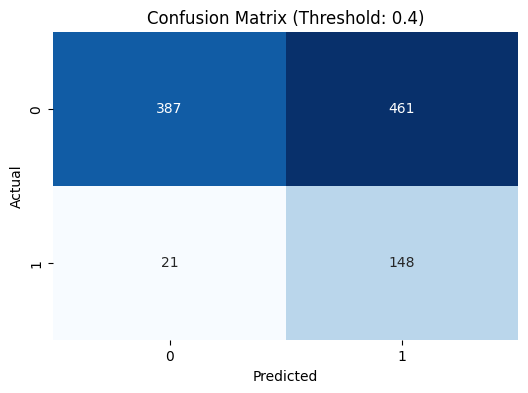

Accuracy: 0.5260570304818093
AUC-ROC Score: 0.7113570391872278
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.46      0.62       848
           1       0.24      0.88      0.38       169

    accuracy                           0.53      1017
   macro avg       0.60      0.67      0.50      1017
weighted avg       0.83      0.53      0.58      1017

---------------------------------------------------------

Threshold: 0.5


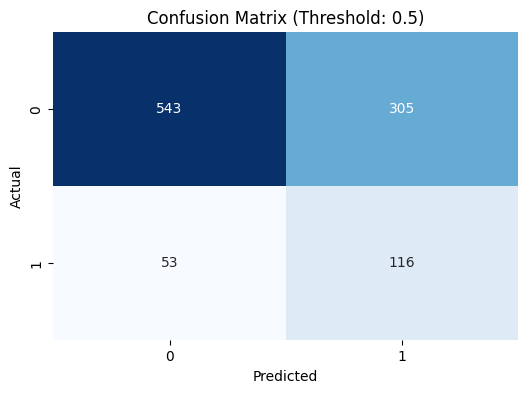

Accuracy: 0.647984267453294
AUC-ROC Score: 0.7113570391872278
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.64      0.75       848
           1       0.28      0.69      0.39       169

    accuracy                           0.65      1017
   macro avg       0.59      0.66      0.57      1017
weighted avg       0.81      0.65      0.69      1017

---------------------------------------------------------

Threshold: 0.6


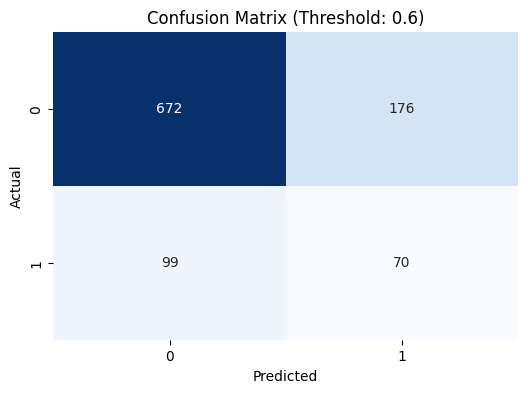

Accuracy: 0.7295968534906588
AUC-ROC Score: 0.7113570391872278
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.79      0.83       848
           1       0.28      0.41      0.34       169

    accuracy                           0.73      1017
   macro avg       0.58      0.60      0.58      1017
weighted avg       0.77      0.73      0.75      1017

---------------------------------------------------------

Threshold: 0.7


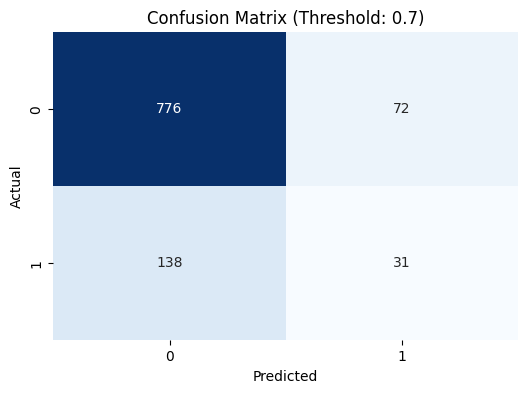

Accuracy: 0.7935103244837758
AUC-ROC Score: 0.7113570391872278
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.92      0.88       848
           1       0.30      0.18      0.23       169

    accuracy                           0.79      1017
   macro avg       0.57      0.55      0.55      1017
weighted avg       0.76      0.79      0.77      1017

---------------------------------------------------------

Threshold: 0.8


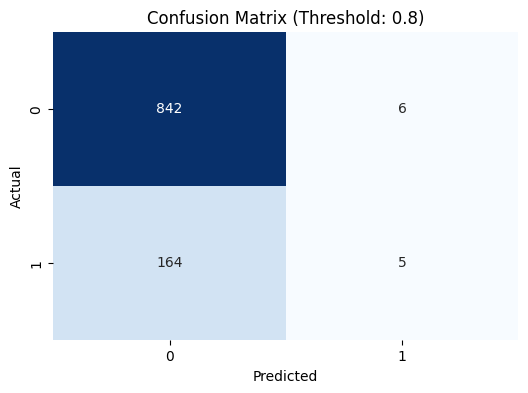

Accuracy: 0.8328416912487709
AUC-ROC Score: 0.7113570391872278
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.99      0.91       848
           1       0.45      0.03      0.06       169

    accuracy                           0.83      1017
   macro avg       0.65      0.51      0.48      1017
weighted avg       0.77      0.83      0.77      1017

---------------------------------------------------------


In [179]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

# Create a Logistic Regression model
logreg_model = LogisticRegression(random_state=42)

# Train the model
logreg_model.fit(X_train_resampled_df, y_train_resampled_df)

# Predict probabilities for the positive class
y_probs = logreg_model.predict_proba(X_test)[:, 1]

# Vary the threshold and evaluate the performance at each threshold
thresholds = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]  # Adjust these thresholds as needed
for threshold in thresholds:
    y_pred_threshold = (y_probs >= threshold).astype(int)

    # Get the confusion matrix
    cm = confusion_matrix(y_test, y_pred_threshold)

    print(f"\nThreshold: {threshold}")
    # Plot the confusion matrix as a heatmap with labels
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"Confusion Matrix (Threshold: {threshold})")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    accuracy = accuracy_score(y_test, y_pred_threshold)
    roc_auc = roc_auc_score(y_test, y_probs)

    print("Accuracy:", accuracy)
    print("AUC-ROC Score:", roc_auc)
    print("Classification Report:\n", classification_report(y_test, y_pred_threshold))
    print('---------------------------------------------------------')

In [180]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100]
}

# Create a logistic regression model
logreg_model = LogisticRegression(random_state=42)

# Create GridSearchCV
grid_search = GridSearchCV(logreg_model, param_grid, cv=5, scoring='roc_auc')

# Fit the model to the training data
grid_search.fit(X_train_resampled_df, y_train_resampled_df)

# Print the best parameters found by the grid search
print("Best Parameters:", grid_search.best_params_)

# Get the best model
best_logreg_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred_best = best_logreg_model.predict(X_test)
print("\nClassification Report for Best Model:\n", classification_report(y_test, y_pred_best))

Best Parameters: {'C': 10, 'penalty': 'l2'}

Classification Report for Best Model:
               precision    recall  f1-score   support

           0       0.91      0.64      0.75       848
           1       0.28      0.69      0.40       169

    accuracy                           0.65      1017
   macro avg       0.60      0.67      0.58      1017
weighted avg       0.81      0.65      0.69      1017



In [181]:
!pip install scikit-plot

<Figure size 800x600 with 0 Axes>

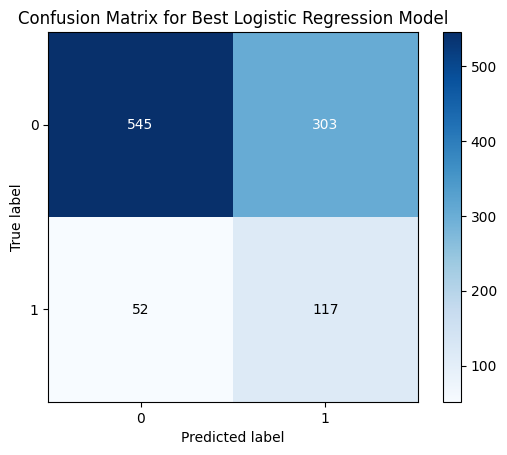

In [182]:
from sklearn.metrics import roc_curve, auc
from scikitplot.metrics import plot_confusion_matrix

# Get the best model from the grid search
best_logreg_model = grid_search.best_estimator_

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
plot_confusion_matrix(y_test, best_logreg_model.predict(X_test), cmap=plt.cm.Blues, title='Confusion Matrix for Best Logistic Regression Model')
plt.show()

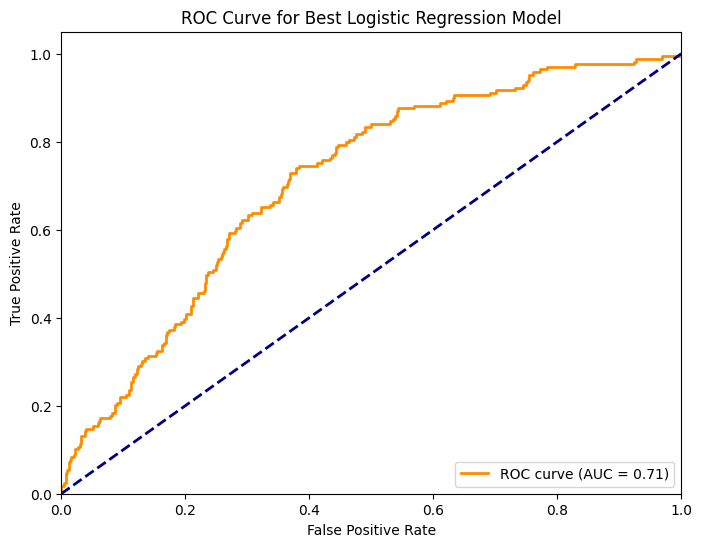

In [183]:
# Plot the ROC curve
y_probs_best = best_logreg_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs_best)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Best Logistic Regression Model')
plt.legend(loc='lower right')
plt.show()

### Model 2 - Decision Tree


Threshold: 0.2


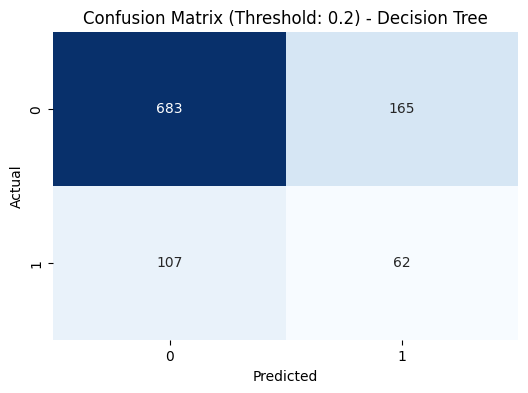

Accuracy: 0.7325467059980334
AUC-ROC Score: 0.5861442168136654
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.81      0.83       848
           1       0.27      0.37      0.31       169

    accuracy                           0.73      1017
   macro avg       0.57      0.59      0.57      1017
weighted avg       0.77      0.73      0.75      1017

---------------------------------------------------------

Threshold: 0.3


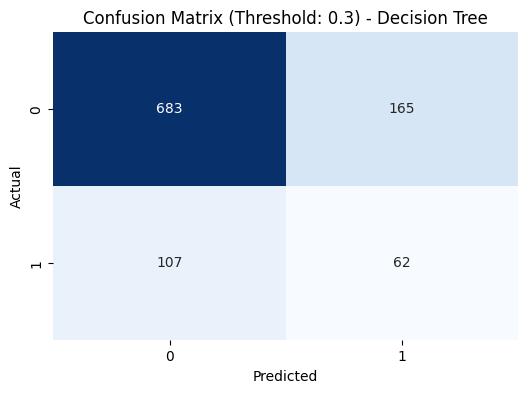

Accuracy: 0.7325467059980334
AUC-ROC Score: 0.5861442168136654
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.81      0.83       848
           1       0.27      0.37      0.31       169

    accuracy                           0.73      1017
   macro avg       0.57      0.59      0.57      1017
weighted avg       0.77      0.73      0.75      1017

---------------------------------------------------------

Threshold: 0.4


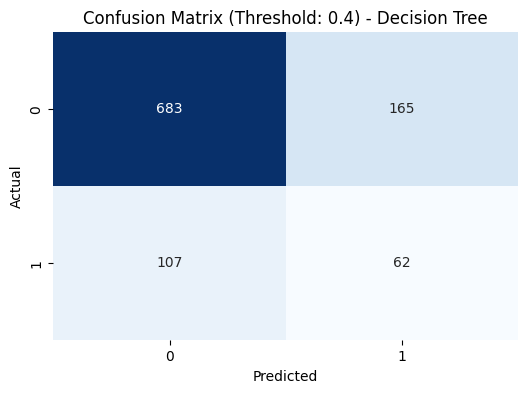

Accuracy: 0.7325467059980334
AUC-ROC Score: 0.5861442168136654
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.81      0.83       848
           1       0.27      0.37      0.31       169

    accuracy                           0.73      1017
   macro avg       0.57      0.59      0.57      1017
weighted avg       0.77      0.73      0.75      1017

---------------------------------------------------------

Threshold: 0.5


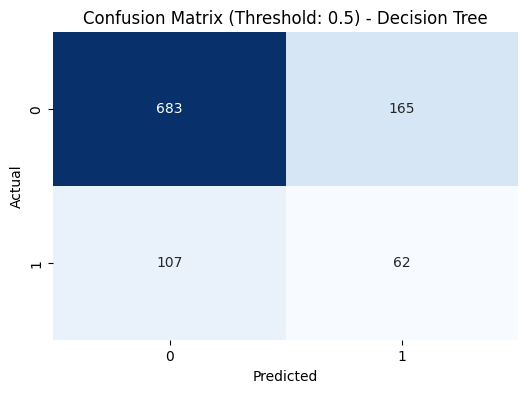

Accuracy: 0.7325467059980334
AUC-ROC Score: 0.5861442168136654
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.81      0.83       848
           1       0.27      0.37      0.31       169

    accuracy                           0.73      1017
   macro avg       0.57      0.59      0.57      1017
weighted avg       0.77      0.73      0.75      1017

---------------------------------------------------------

Threshold: 0.6


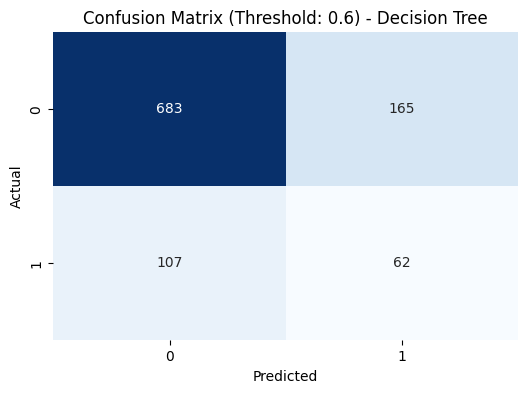

Accuracy: 0.7325467059980334
AUC-ROC Score: 0.5861442168136654
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.81      0.83       848
           1       0.27      0.37      0.31       169

    accuracy                           0.73      1017
   macro avg       0.57      0.59      0.57      1017
weighted avg       0.77      0.73      0.75      1017

---------------------------------------------------------

Threshold: 0.7


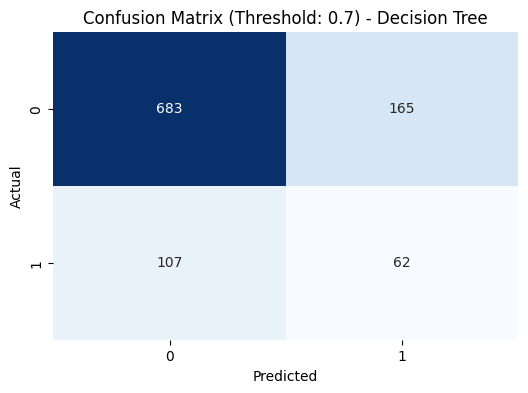

Accuracy: 0.7325467059980334
AUC-ROC Score: 0.5861442168136654
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.81      0.83       848
           1       0.27      0.37      0.31       169

    accuracy                           0.73      1017
   macro avg       0.57      0.59      0.57      1017
weighted avg       0.77      0.73      0.75      1017

---------------------------------------------------------

Threshold: 0.8


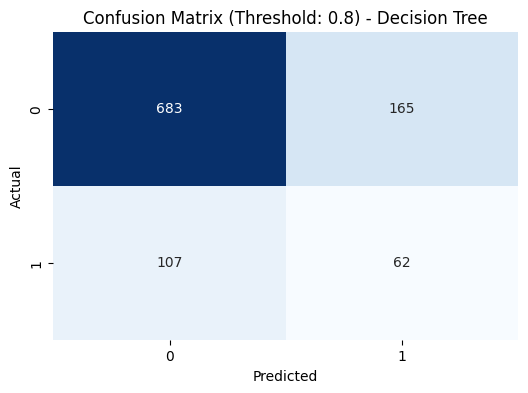

Accuracy: 0.7325467059980334
AUC-ROC Score: 0.5861442168136654
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.81      0.83       848
           1       0.27      0.37      0.31       169

    accuracy                           0.73      1017
   macro avg       0.57      0.59      0.57      1017
weighted avg       0.77      0.73      0.75      1017

---------------------------------------------------------


In [184]:
from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model
dt_model.fit(X_train_resampled_df, y_train_resampled_df)

# Predict probabilities for the positive class
y_probs_dt = dt_model.predict_proba(X_test)[:, 1]

# Vary the threshold and evaluate the performance at each threshold
thresholds = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
for threshold in thresholds:
    y_pred_threshold_dt = (y_probs_dt >= threshold).astype(int)

    # Get the confusion matrix
    cm_dt = confusion_matrix(y_test, y_pred_threshold_dt)

    print(f"\nThreshold: {threshold}")
    # Plot the confusion matrix as a heatmap with labels
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm_dt, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"Confusion Matrix (Threshold: {threshold}) - Decision Tree")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    accuracy_dt = accuracy_score(y_test, y_pred_threshold_dt)
    roc_auc_dt = roc_auc_score(y_test, y_probs_dt)

    print("Accuracy:", accuracy_dt)
    print("AUC-ROC Score:", roc_auc_dt)
    print("Classification Report:\n", classification_report(y_test, y_pred_threshold_dt))
    print('---------------------------------------------------------')

In [185]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search for Decision Tree
param_grid_dt = {
    'max_depth': [None, 10, 20, 30],  # Adjust these values as needed
    'min_samples_split': [5, 10, 15,20],
    'min_samples_leaf': [2, 4,6 , 8]
}

# Create a Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Create GridSearchCV for Decision Tree
grid_search_dt = GridSearchCV(dt_model, param_grid_dt, cv=5, scoring='roc_auc')

# Fit the model to the training data
grid_search_dt.fit(X_train_resampled_df, y_train_resampled_df)

# Print the best parameters found by the grid search
print("Best Parameters for Decision Tree:", grid_search_dt.best_params_)

# Get the best Decision Tree model
best_dt_model = grid_search_dt.best_estimator_

# Evaluate the best Decision Tree model on the test set
y_pred_best_dt = best_dt_model.predict(X_test)
print("\nClassification Report for Best Decision Tree Model:\n", classification_report(y_test, y_pred_best_dt))

Best Parameters for Decision Tree: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10}

Classification Report for Best Decision Tree Model:
               precision    recall  f1-score   support

           0       0.86      0.82      0.84       848
           1       0.26      0.33      0.29       169

    accuracy                           0.73      1017
   macro avg       0.56      0.57      0.56      1017
weighted avg       0.76      0.73      0.75      1017



<Figure size 800x600 with 0 Axes>

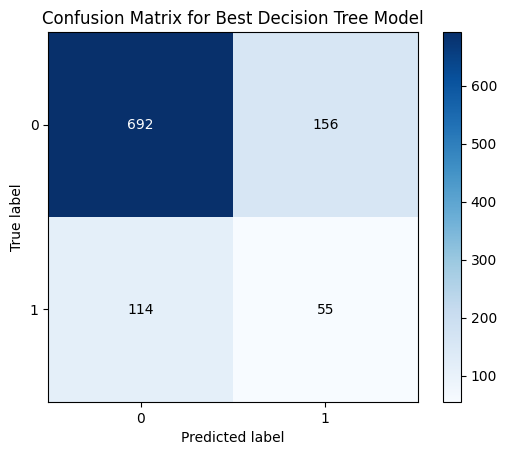

In [186]:
from scikitplot.metrics import plot_confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the confusion matrix for the best Decision Tree model
plt.figure(figsize=(8, 6))
plot_confusion_matrix(y_test, best_dt_model.predict(X_test), cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Best Decision Tree Model')
plt.show()


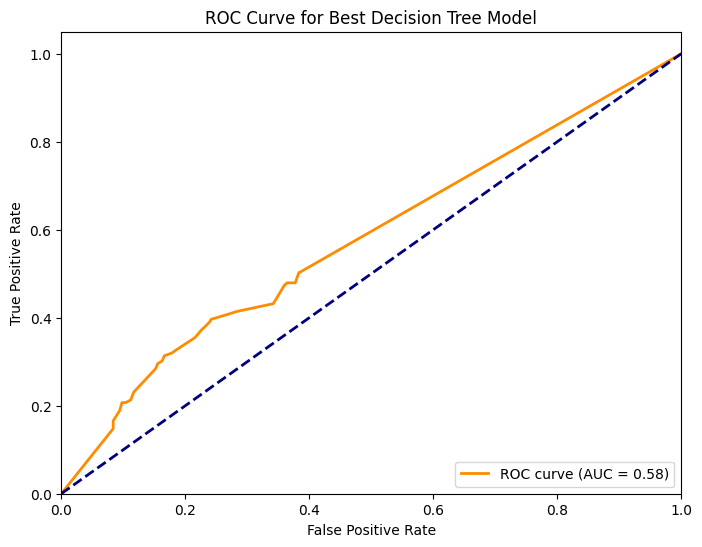

In [187]:
from sklearn.metrics import roc_curve, auc

# Plot the ROC curve for the best Decision Tree model
y_probs_best_dt = best_dt_model.predict_proba(X_test)[:, 1]
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_probs_best_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc_dt))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Best Decision Tree Model')
plt.legend(loc='lower right')
plt.show()

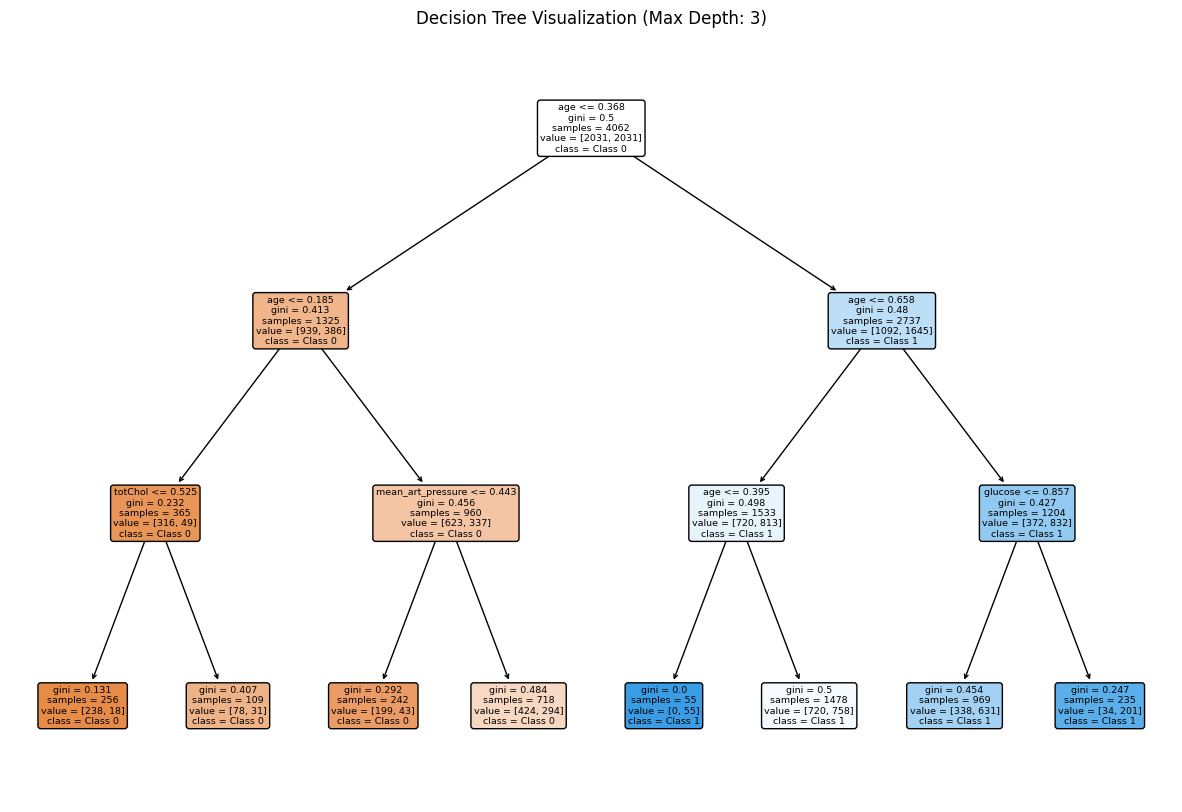

In [188]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Specify the maximum depth for the Decision Tree
max_depth = 3

# Create a Decision Tree model with the specified maximum depth
dt_model = DecisionTreeClassifier(max_depth=max_depth, random_state=42)

# Fit the model to the training data
dt_model.fit(X_train_resampled_df, y_train_resampled_df)

# Visualize the Decision Tree with the specified maximum depth
plt.figure(figsize=(15, 10))
plot_tree(dt_model, feature_names=X_train_resampled_df.columns, class_names=['Class 0', 'Class 1'], filled=True, rounded=True)
plt.title(f'Decision Tree Visualization (Max Depth: {max_depth})')
plt.show()

### Model 3 - Random forest Classifier


Threshold: 0.2


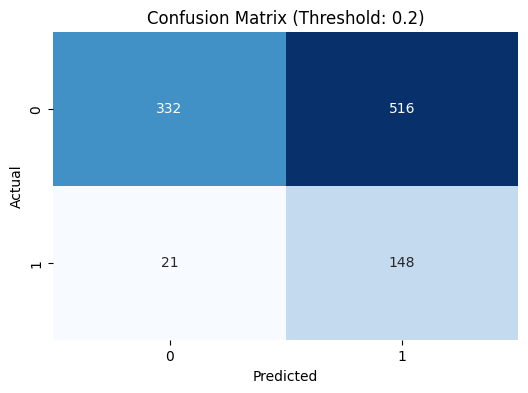

Accuracy: 0.471976401179941
AUC-ROC Score: 0.6713464329574634
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.39      0.55       848
           1       0.22      0.88      0.36       169

    accuracy                           0.47      1017
   macro avg       0.58      0.63      0.45      1017
weighted avg       0.82      0.47      0.52      1017

---------------------------------------------------------

Threshold: 0.3


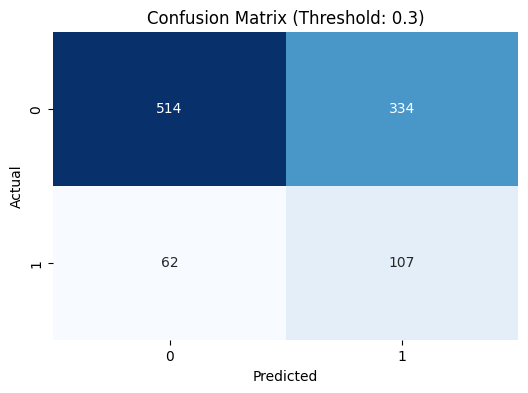

Accuracy: 0.6106194690265486
AUC-ROC Score: 0.6713464329574634
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.61      0.72       848
           1       0.24      0.63      0.35       169

    accuracy                           0.61      1017
   macro avg       0.57      0.62      0.54      1017
weighted avg       0.78      0.61      0.66      1017

---------------------------------------------------------

Threshold: 0.4


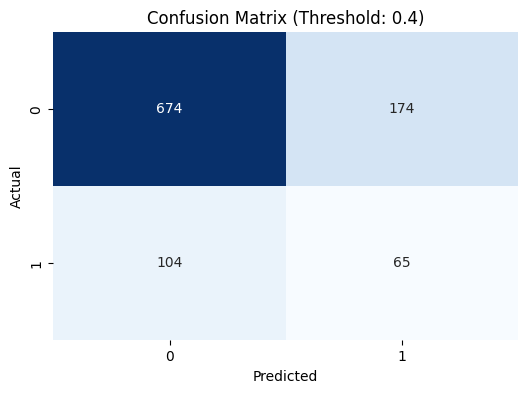

Accuracy: 0.7266470009832842
AUC-ROC Score: 0.6713464329574634
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.79      0.83       848
           1       0.27      0.38      0.32       169

    accuracy                           0.73      1017
   macro avg       0.57      0.59      0.57      1017
weighted avg       0.77      0.73      0.74      1017

---------------------------------------------------------

Threshold: 0.5


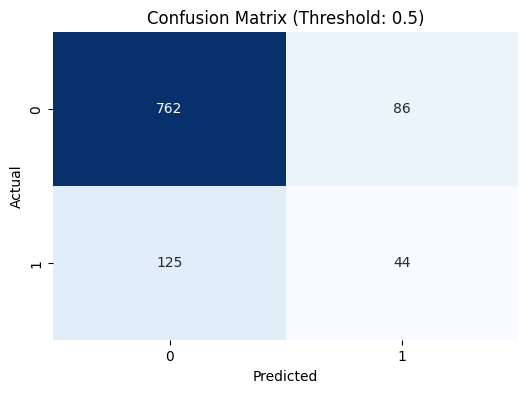

Accuracy: 0.7925270403146509
AUC-ROC Score: 0.6713464329574634
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.90      0.88       848
           1       0.34      0.26      0.29       169

    accuracy                           0.79      1017
   macro avg       0.60      0.58      0.59      1017
weighted avg       0.77      0.79      0.78      1017

---------------------------------------------------------

Threshold: 0.6


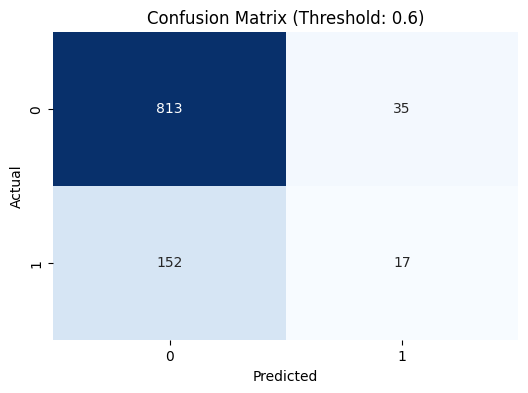

Accuracy: 0.816125860373648
AUC-ROC Score: 0.6713464329574634
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.96      0.90       848
           1       0.33      0.10      0.15       169

    accuracy                           0.82      1017
   macro avg       0.58      0.53      0.53      1017
weighted avg       0.76      0.82      0.77      1017

---------------------------------------------------------

Threshold: 0.7


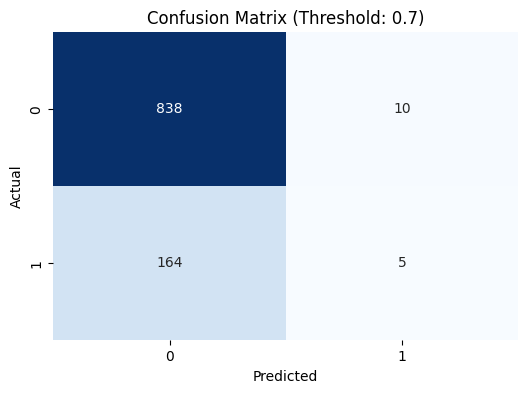

Accuracy: 0.8289085545722714
AUC-ROC Score: 0.6713464329574634
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.99      0.91       848
           1       0.33      0.03      0.05       169

    accuracy                           0.83      1017
   macro avg       0.58      0.51      0.48      1017
weighted avg       0.75      0.83      0.76      1017

---------------------------------------------------------

Threshold: 0.8


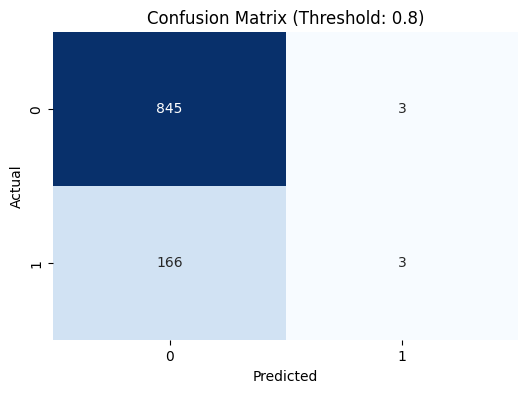

Accuracy: 0.8338249754178958
AUC-ROC Score: 0.6713464329574634
Classification Report:
               precision    recall  f1-score   support

           0       0.84      1.00      0.91       848
           1       0.50      0.02      0.03       169

    accuracy                           0.83      1017
   macro avg       0.67      0.51      0.47      1017
weighted avg       0.78      0.83      0.76      1017

---------------------------------------------------------


In [189]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train_resampled_df, y_train_resampled_df)

# Predict probabilities for the positive class
y_probs_rf = rf_model.predict_proba(X_test)[:, 1]

# Vary the threshold and evaluate the performance at each threshold
thresholds = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
for threshold in thresholds:
    y_pred_threshold_rf = (y_probs_rf >= threshold).astype(int)

    # Get the confusion matrix
    cm_rf = confusion_matrix(y_test, y_pred_threshold_rf)

    print(f"\nThreshold: {threshold}")
    # Plot the confusion matrix as a heatmap with labels
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"Confusion Matrix (Threshold: {threshold})")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    accuracy_rf = accuracy_score(y_test, y_pred_threshold_rf)
    roc_auc_rf = roc_auc_score(y_test, y_probs_rf)

    print("Accuracy:", accuracy_rf)
    print("AUC-ROC Score:", roc_auc_rf)
    print("Classification Report:\n", classification_report(y_test, y_pred_threshold_rf))
    print('---------------------------------------------------------')

In [190]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Define the parameter grid to search for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 150],  # Adjust these values as needed
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [5, 10, 15],
    'min_samples_leaf': [2, 4, 6]
}

# Create a Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Create GridSearchCV for Random Forest
grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=5, scoring='roc_auc')

# Fit the model to the training data
grid_search_rf.fit(X_train_resampled_df, y_train_resampled_df)

# Print the best parameters found by the grid search
print("Best Parameters for Random Forest:", grid_search_rf.best_params_)

# Get the best Random Forest model
best_rf_model = grid_search_rf.best_estimator_

# Evaluate the best Random Forest model on the test set
y_pred_best_rf = best_rf_model.predict(X_test)
print("\nClassification Report for Best Random Forest Model:\n", classification_report(y_test, y_pred_best_rf))

Best Parameters for Random Forest: {'max_depth': 30, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 150}

Classification Report for Best Random Forest Model:
               precision    recall  f1-score   support

           0       0.85      0.89      0.87       848
           1       0.29      0.23      0.26       169

    accuracy                           0.78      1017
   macro avg       0.57      0.56      0.56      1017
weighted avg       0.76      0.78      0.77      1017



<Figure size 800x600 with 0 Axes>

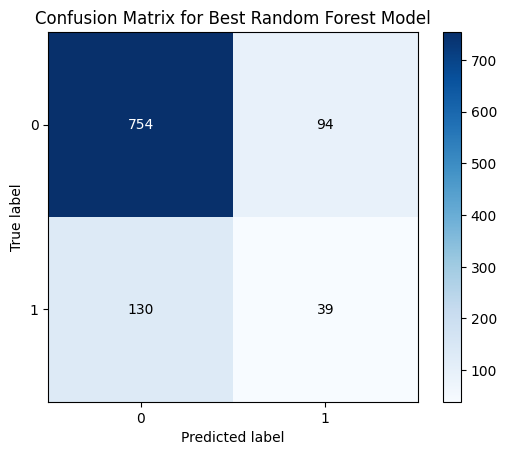

In [191]:
from scikitplot.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

# Plot the confusion matrix for the best Random Forest model
plt.figure(figsize=(8, 6))
plot_confusion_matrix(y_test, y_pred_best_rf, cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Best Random Forest Model')
plt.show()

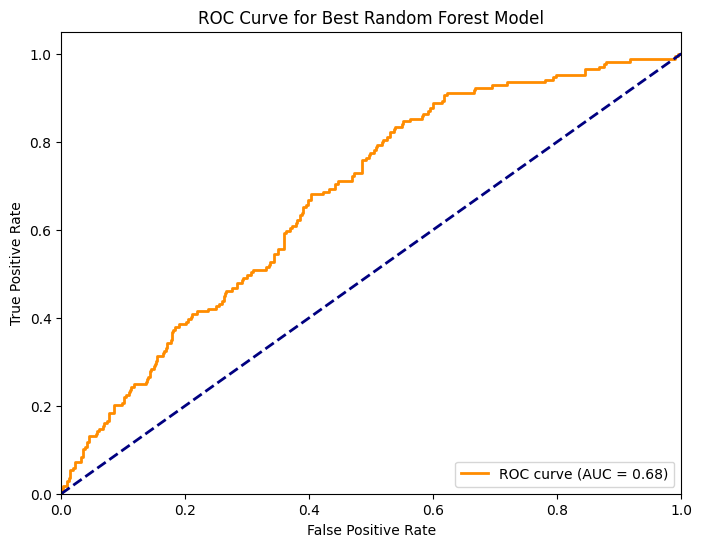

In [192]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Predict probabilities for the positive class
y_probs_best_rf = best_rf_model.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_probs_best_rf)

# Calculate the AUC (Area Under the Curve)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc_rf))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Best Random Forest Model')
plt.legend(loc='lower right')
plt.show()


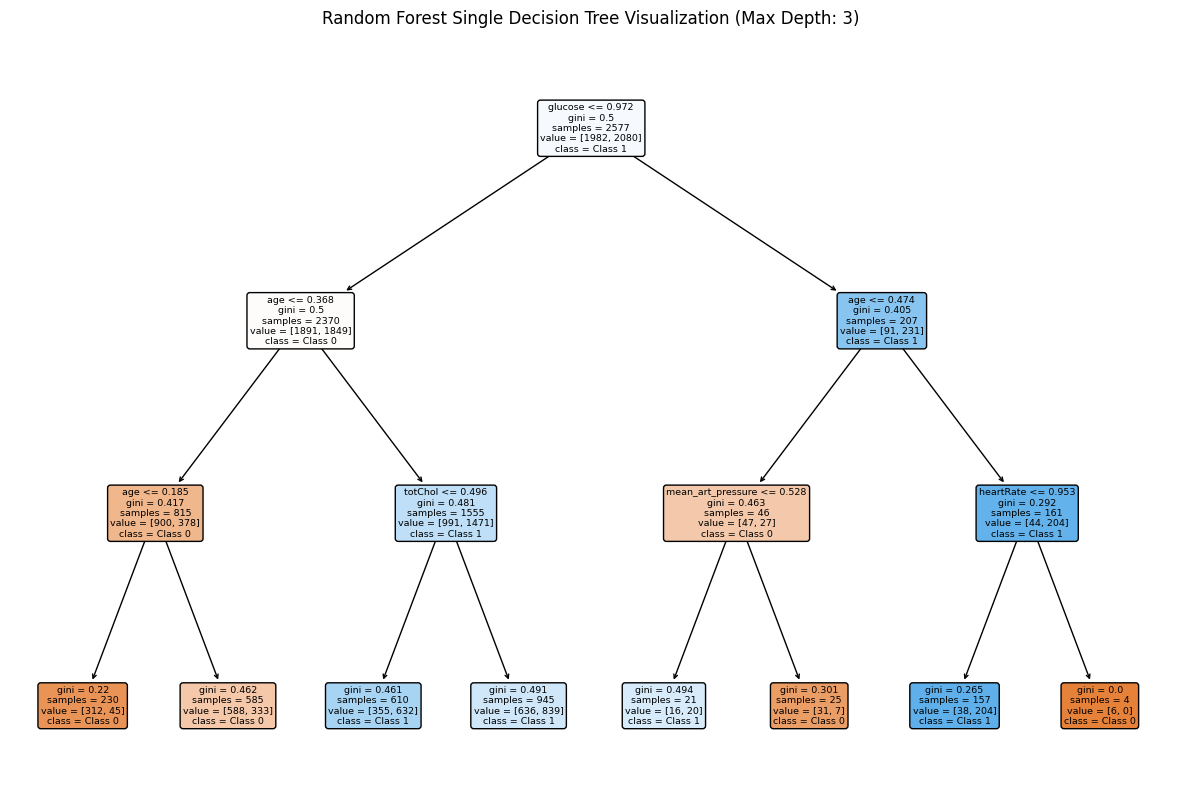

In [193]:
from sklearn.tree import plot_tree

# Create a Random Forest model with a single tree and maximum depth 3
rf_single_tree = RandomForestClassifier(n_estimators=1, max_depth=3, random_state=42)

# Fit the model to the training data
rf_single_tree.fit(X_train_resampled_df, y_train_resampled_df)

# Visualize the single decision tree with maximum depth 3
plt.figure(figsize=(15, 10))
plot_tree(rf_single_tree.estimators_[0], feature_names=X_train_resampled_df.columns, class_names=['Class 0', 'Class 1'], filled=True, rounded=True)
plt.title('Random Forest Single Decision Tree Visualization (Max Depth: 3)')
plt.show()

When we observe a situation where the normal accuracy is low, but the ROC-AUC score is high, it indicates a potential imbalance in the class distribution of your dataset. This is a common scenario in imbalanced datasets, where one class (usually the minority class) has significantly fewer samples than the other.

In such cases, accuracy might not be the most informative metric because a model that predicts the majority class for every instance can still achieve a high accuracy if the dataset is imbalanced.

Here's a quick guide on how to interpret these metrics in imbalanced datasets:

1. **High ROC-AUC, Low Accuracy:**
   - **ROC-AUC:** ROC-AUC is a good metric for imbalanced datasets. A high ROC-AUC suggests that the model is good at distinguishing between the positive and negative classes.
   - **Accuracy:** In imbalanced datasets, accuracy alone might not provide a complete picture. The low accuracy could be due to the imbalance, where the majority class dominates the predictions.

2. **Choosing the Best Model:**
   - **Consider the Business Context:** Depending on the specific goals and costs associated with false positives and false negatives in your application, you may prioritize precision, recall, or another metric.
   - **Use Multiple Metrics:** Evaluate multiple metrics (precision, recall, F1-score) in addition to accuracy and ROC-AUC to get a comprehensive understanding of your model's performance.

3. **Adjusting for Imbalance:**
   - **Class Weights:** In some models, you can assign different weights to classes to account for imbalance.
   - **Sampling Techniques:** Consider using resampling techniques like oversampling the minority class or undersampling the majority class.

4. **Precision-Recall Curve:**
   - **Plotting Precision-Recall Curve:** In imbalanced datasets, it's often informative to look at the precision-recall curve in addition to the ROC curve.

In summary, a high ROC-AUC is a positive sign, but you should also consider other metrics and explore techniques to handle class imbalance. The best model depends on the specific goals and constraints of your problem.

##ENSEMBLE BOOSTING MODELS

### Model 4 - AdaBoost


Threshold: 0.2


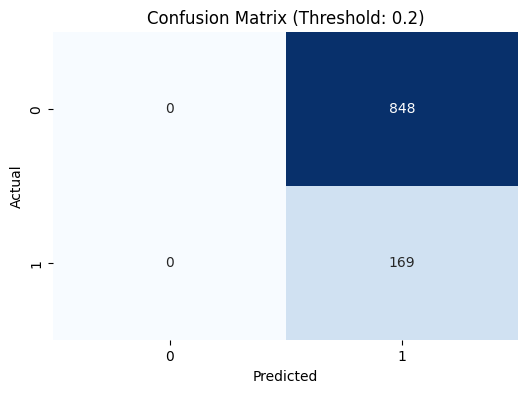

Accuracy: 0.16617502458210423
AUC-ROC Score: 0.7106592609132524
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       848
           1       0.17      1.00      0.28       169

    accuracy                           0.17      1017
   macro avg       0.08      0.50      0.14      1017
weighted avg       0.03      0.17      0.05      1017

---------------------------------------------------------

Threshold: 0.3


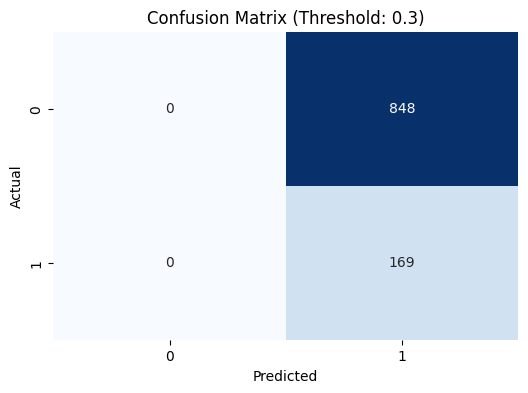

Accuracy: 0.16617502458210423
AUC-ROC Score: 0.7106592609132524
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       848
           1       0.17      1.00      0.28       169

    accuracy                           0.17      1017
   macro avg       0.08      0.50      0.14      1017
weighted avg       0.03      0.17      0.05      1017

---------------------------------------------------------

Threshold: 0.4


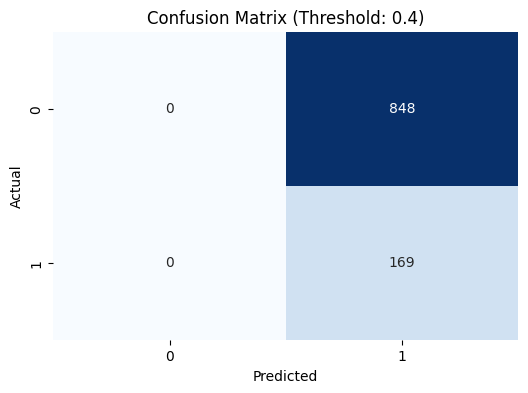

Accuracy: 0.16617502458210423
AUC-ROC Score: 0.7106592609132524
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       848
           1       0.17      1.00      0.28       169

    accuracy                           0.17      1017
   macro avg       0.08      0.50      0.14      1017
weighted avg       0.03      0.17      0.05      1017

---------------------------------------------------------

Threshold: 0.5


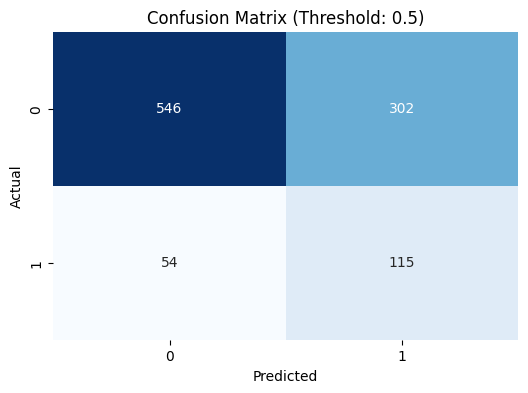

Accuracy: 0.6499508357915438
AUC-ROC Score: 0.7106592609132524
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.64      0.75       848
           1       0.28      0.68      0.39       169

    accuracy                           0.65      1017
   macro avg       0.59      0.66      0.57      1017
weighted avg       0.80      0.65      0.69      1017

---------------------------------------------------------

Threshold: 0.6


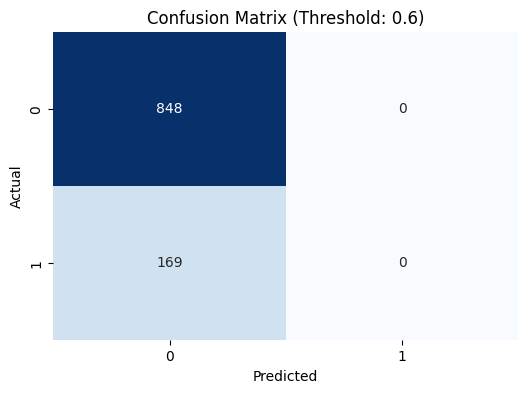

Accuracy: 0.8338249754178958
AUC-ROC Score: 0.7106592609132524
Classification Report:
               precision    recall  f1-score   support

           0       0.83      1.00      0.91       848
           1       0.00      0.00      0.00       169

    accuracy                           0.83      1017
   macro avg       0.42      0.50      0.45      1017
weighted avg       0.70      0.83      0.76      1017

---------------------------------------------------------

Threshold: 0.7


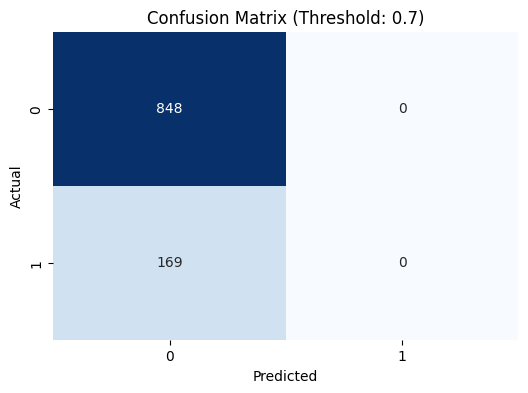

Accuracy: 0.8338249754178958
AUC-ROC Score: 0.7106592609132524
Classification Report:
               precision    recall  f1-score   support

           0       0.83      1.00      0.91       848
           1       0.00      0.00      0.00       169

    accuracy                           0.83      1017
   macro avg       0.42      0.50      0.45      1017
weighted avg       0.70      0.83      0.76      1017

---------------------------------------------------------

Threshold: 0.8


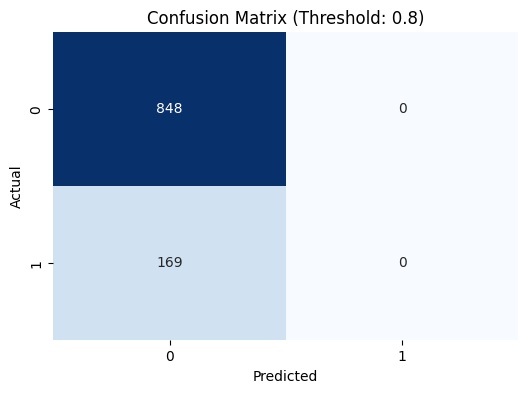

Accuracy: 0.8338249754178958
AUC-ROC Score: 0.7106592609132524
Classification Report:
               precision    recall  f1-score   support

           0       0.83      1.00      0.91       848
           1       0.00      0.00      0.00       169

    accuracy                           0.83      1017
   macro avg       0.42      0.50      0.45      1017
weighted avg       0.70      0.83      0.76      1017

---------------------------------------------------------


In [194]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

# Create a Logistic Regression model with the best parameters
best_logreg_model = LogisticRegression(C=100, penalty='l2', random_state=42)

# Create an AdaBoostClassifier using the Logistic Regression model as the base model
adaboost_model = AdaBoostClassifier(base_estimator=best_logreg_model, n_estimators=50, random_state=42)

# Train the AdaBoost model
adaboost_model.fit(X_train_resampled_df, y_train_resampled_df)

# Predict probabilities for the positive class
y_probs_adaboost = adaboost_model.predict_proba(X_test)[:, 1]

# Vary the threshold and evaluate the performance at each threshold
thresholds = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]  # Adjust these thresholds as needed
for threshold in thresholds:
    y_pred_threshold_adaboost = (y_probs_adaboost >= threshold).astype(int)

    # Get the confusion matrix
    cm_adaboost = confusion_matrix(y_test, y_pred_threshold_adaboost)

    print(f"\nThreshold: {threshold}")
    # Plot the confusion matrix as a heatmap with labels
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm_adaboost, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"Confusion Matrix (Threshold: {threshold})")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    accuracy_adaboost = accuracy_score(y_test, y_pred_threshold_adaboost)
    roc_auc_adaboost = roc_auc_score(y_test, y_probs_adaboost)

    print("Accuracy:", accuracy_adaboost)
    print("AUC-ROC Score:", roc_auc_adaboost)
    print("Classification Report:\n", classification_report(y_test, y_pred_threshold_adaboost))
    print('---------------------------------------------------------')


In [195]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for AdaBoost
param_grid_adaboost = {
    'n_estimators': [50, 100, 150],  # Adjust these values as needed
    'learning_rate': [0.01, 0.1, 1.0]
}

# Create an AdaBoostClassifier with the base Logistic Regression model
adaboost_model = AdaBoostClassifier(base_estimator=best_logreg_model, random_state=42)

# Create GridSearchCV for AdaBoost
grid_search_adaboost = GridSearchCV(adaboost_model, param_grid_adaboost, cv=5, scoring='roc_auc')

# Fit the model to the training data
grid_search_adaboost.fit(X_train_resampled_df, y_train_resampled_df)

# Print the best parameters found by the grid search
print("Best Parameters for AdaBoost:", grid_search_adaboost.best_params_)

# Get the best AdaBoost model
best_adaboost_model = grid_search_adaboost.best_estimator_

# Evaluate the best AdaBoost model on the test set using the specified threshold (0.5)
y_pred_best_adaboost = (best_adaboost_model.predict_proba(X_test)[:, 1] >= 0.5).astype(int)

print("\nClassification Report for Best AdaBoost Model:\n", classification_report(y_test, y_pred_best_adaboost))

Best Parameters for AdaBoost: {'learning_rate': 0.1, 'n_estimators': 100}

Classification Report for Best AdaBoost Model:
               precision    recall  f1-score   support

           0       0.91      0.64      0.75       848
           1       0.27      0.68      0.39       169

    accuracy                           0.65      1017
   macro avg       0.59      0.66      0.57      1017
weighted avg       0.80      0.65      0.69      1017



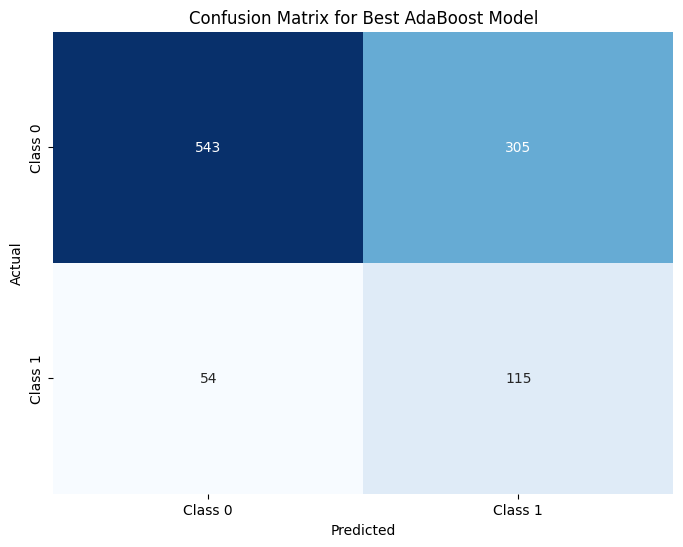

In [197]:
from scikitplot.metrics import plot_confusion_matrix

# Get the confusion matrix for the best AdaBoost model
cm_adaboost = confusion_matrix(y_test, y_pred_best_adaboost)

# Plot the confusion matrix as a heatmap with custom labels
plt.figure(figsize=(8, 6))
sns.heatmap(cm_adaboost, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix for Best AdaBoost Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(ticks=[0.5, 1.5], labels=['Class 0', 'Class 1'])
plt.yticks(ticks=[0.5, 1.5], labels=['Class 0', 'Class 1'])
plt.show()


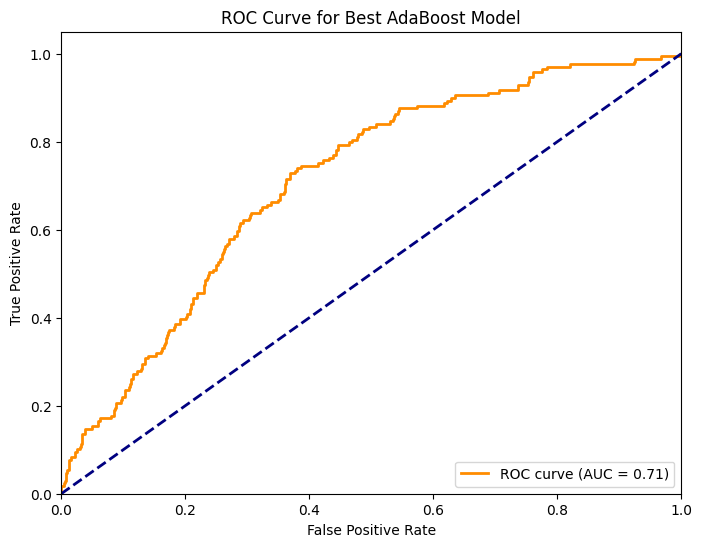

In [198]:
from sklearn.metrics import roc_curve, auc

# Get the predicted probabilities for the positive class
y_probs_best_adaboost = best_adaboost_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs_best_adaboost)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Best AdaBoost Model')
plt.legend(loc='lower right')
plt.show()

### Model 5 - Gradient Boosting


Threshold: 0.2


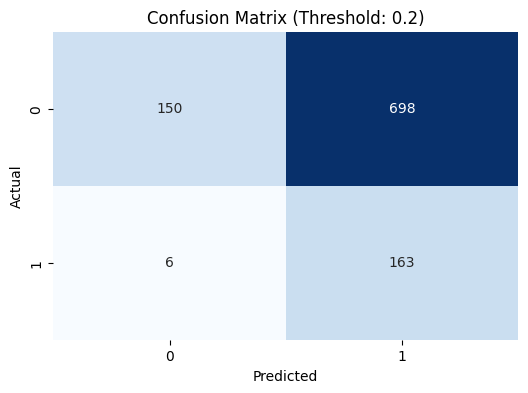

Accuracy: 0.3077679449360865
AUC-ROC Score: 0.6777590152952997
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.18      0.30       848
           1       0.19      0.96      0.32       169

    accuracy                           0.31      1017
   macro avg       0.58      0.57      0.31      1017
weighted avg       0.83      0.31      0.30      1017

---------------------------------------------------------

Threshold: 0.3


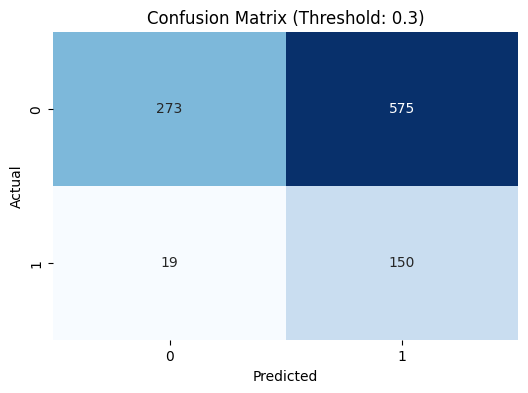

Accuracy: 0.415929203539823
AUC-ROC Score: 0.6777590152952997
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.32      0.48       848
           1       0.21      0.89      0.34       169

    accuracy                           0.42      1017
   macro avg       0.57      0.60      0.41      1017
weighted avg       0.81      0.42      0.46      1017

---------------------------------------------------------

Threshold: 0.4


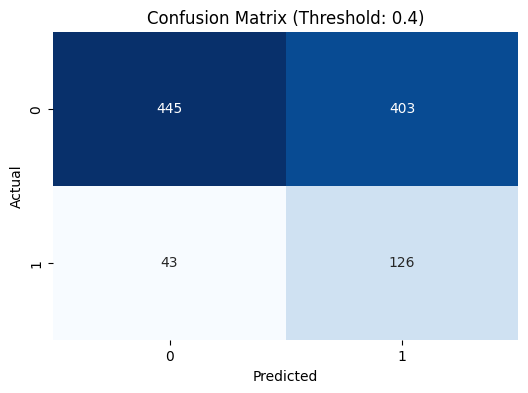

Accuracy: 0.5614552605703048
AUC-ROC Score: 0.6777590152952997
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.52      0.67       848
           1       0.24      0.75      0.36       169

    accuracy                           0.56      1017
   macro avg       0.58      0.64      0.51      1017
weighted avg       0.80      0.56      0.62      1017

---------------------------------------------------------

Threshold: 0.5


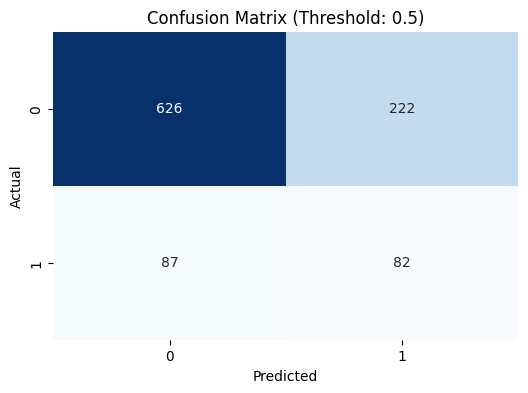

Accuracy: 0.696165191740413
AUC-ROC Score: 0.6777590152952997
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.74      0.80       848
           1       0.27      0.49      0.35       169

    accuracy                           0.70      1017
   macro avg       0.57      0.61      0.57      1017
weighted avg       0.78      0.70      0.73      1017

---------------------------------------------------------

Threshold: 0.6


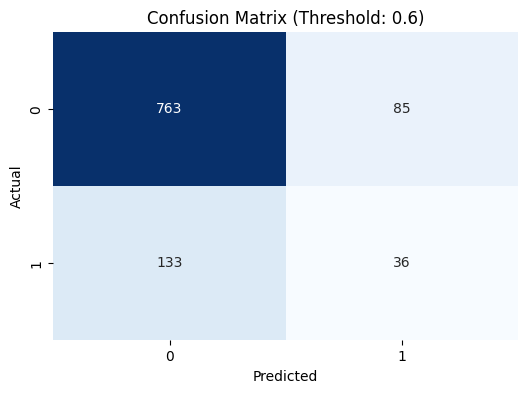

Accuracy: 0.7856440511307768
AUC-ROC Score: 0.6777590152952997
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.90      0.88       848
           1       0.30      0.21      0.25       169

    accuracy                           0.79      1017
   macro avg       0.57      0.56      0.56      1017
weighted avg       0.76      0.79      0.77      1017

---------------------------------------------------------

Threshold: 0.7


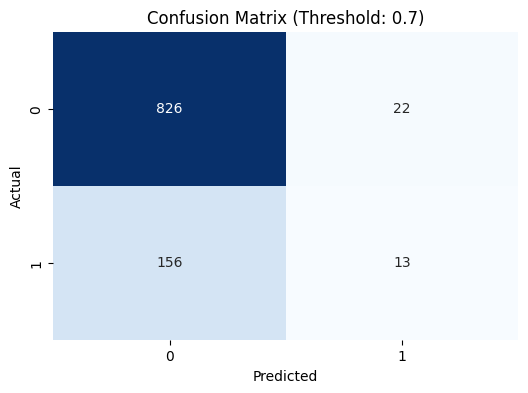

Accuracy: 0.8249754178957719
AUC-ROC Score: 0.6777590152952997
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.97      0.90       848
           1       0.37      0.08      0.13       169

    accuracy                           0.82      1017
   macro avg       0.61      0.53      0.52      1017
weighted avg       0.76      0.82      0.77      1017

---------------------------------------------------------

Threshold: 0.8


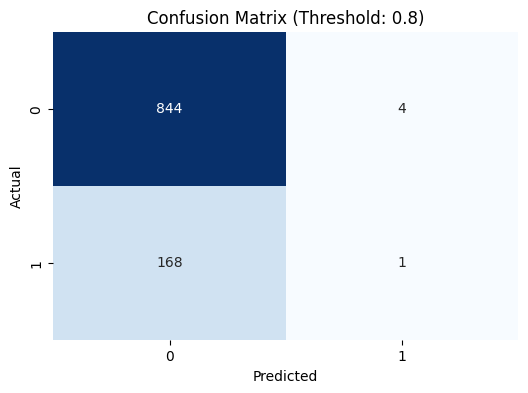

Accuracy: 0.8308751229105211
AUC-ROC Score: 0.6777590152952997
Classification Report:
               precision    recall  f1-score   support

           0       0.83      1.00      0.91       848
           1       0.20      0.01      0.01       169

    accuracy                           0.83      1017
   macro avg       0.52      0.50      0.46      1017
weighted avg       0.73      0.83      0.76      1017

---------------------------------------------------------


In [199]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt


# Create a GradientBoostingClassifier using the Logistic Regression model as the base model
gb_model = GradientBoostingClassifier(n_estimators=50, random_state=42)

# Train the Gradient Boosting model
gb_model.fit(X_train_resampled_df, y_train_resampled_df)

# Predict probabilities for the positive class
y_probs_gb = gb_model.predict_proba(X_test)[:, 1]

# Vary the threshold and evaluate the performance at each threshold
thresholds = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]  # Adjust these thresholds as needed
for threshold in thresholds:
    y_pred_threshold_gb = (y_probs_gb >= threshold).astype(int)

    # Get the confusion matrix
    cm_gb = confusion_matrix(y_test, y_pred_threshold_gb)

    print(f"\nThreshold: {threshold}")
    # Plot the confusion matrix as a heatmap with labels
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm_gb, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"Confusion Matrix (Threshold: {threshold})")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    accuracy_gb = accuracy_score(y_test, y_pred_threshold_gb)
    roc_auc_gb = roc_auc_score(y_test, y_probs_gb)

    print("Accuracy:", accuracy_gb)
    print("AUC-ROC Score:", roc_auc_gb)
    print("Classification Report:\n", classification_report(y_test, y_pred_threshold_gb))
    print('---------------------------------------------------------')

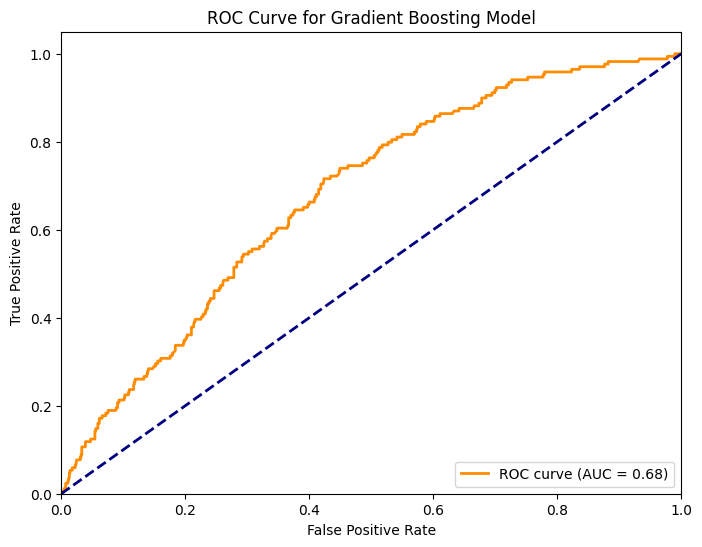

In [200]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Compute ROC curve and ROC area
fpr_gb, tpr_gb, thresholds_gb = roc_curve(y_test, y_probs_gb)
roc_auc_gb = auc(fpr_gb, tpr_gb)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_gb, tpr_gb, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc_gb))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Gradient Boosting Model')
plt.legend(loc='lower right')
plt.show()


In [201]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import make_scorer

# Define the parameter grid to search
param_grid_gb = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1.0]
}

# Create a GradientBoostingClassifier
gb_model = GradientBoostingClassifier(random_state=42)

# Create GridSearchCV for Gradient Boosting
grid_search_gb = GridSearchCV(gb_model, param_grid_gb, cv=5, scoring='roc_auc')

# Fit the model to the training data
grid_search_gb.fit(X_train_resampled_df, y_train_resampled_df)

# Print the best parameters found by the grid search
print("Best Parameters for Gradient Boosting:", grid_search_gb.best_params_)

# Get the best Gradient Boosting model
best_gb_model = grid_search_gb.best_estimator_

# Evaluate the best Gradient Boosting model on the test set
y_pred_best_gb = best_gb_model.predict(X_test)
print("\nClassification Report for Best Gradient Boosting Model:\n", classification_report(y_test, y_pred_best_gb))

Best Parameters for Gradient Boosting: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 150, 'subsample': 0.9}

Classification Report for Best Gradient Boosting Model:
               precision    recall  f1-score   support

           0       0.84      0.92      0.88       848
           1       0.24      0.13      0.17       169

    accuracy                           0.79      1017
   macro avg       0.54      0.52      0.52      1017
weighted avg       0.74      0.79      0.76      1017



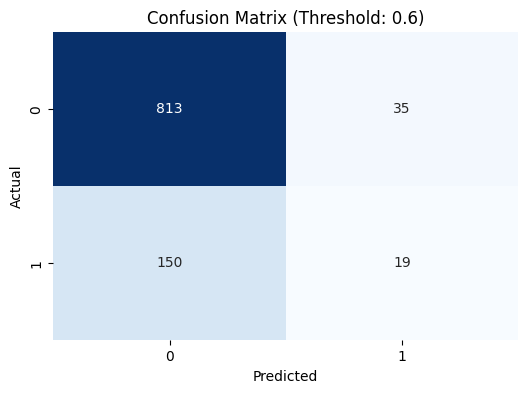

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict probabilities for the positive class
y_probs_gb = best_gb_model.predict_proba(X_test)[:, 1]

# Choose a threshold (you can adjust this based on your needs)
threshold = 0.6

# Convert probabilities to binary predictions based on the chosen threshold
y_pred_threshold_gb = (y_probs_gb >= threshold).astype(int)

# Get the confusion matrix
cm_gb = confusion_matrix(y_test, y_pred_threshold_gb)

# Plot the confusion matrix as a heatmap with labels
plt.figure(figsize=(6, 4))
sns.heatmap(cm_gb, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title(f"Confusion Matrix (Threshold: {threshold})")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


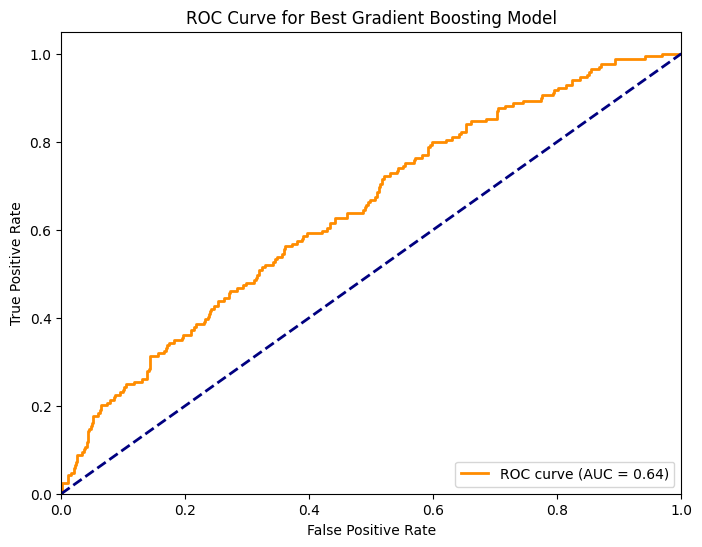

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Predict probabilities for the positive class
y_probs_gb = best_gb_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area
fpr_gb, tpr_gb, thresholds_gb = roc_curve(y_test, y_probs_gb)
roc_auc_gb = auc(fpr_gb, tpr_gb)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_gb, tpr_gb, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc_gb))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Best Gradient Boosting Model')
plt.legend(loc='lower right')
plt.show()

### Model 6 - XG Boosting


Threshold: 0.2


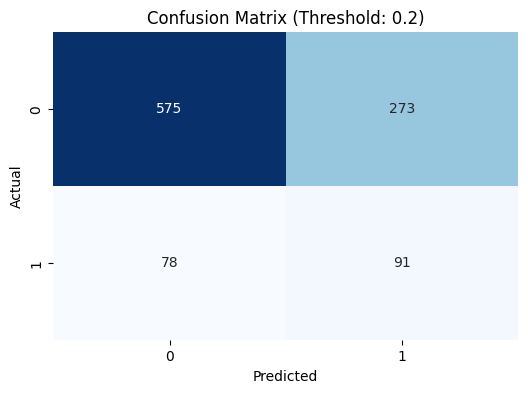

Accuracy: 0.6548672566371682
AUC-ROC Score: 0.6435469465222732
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.68      0.77       848
           1       0.25      0.54      0.34       169

    accuracy                           0.65      1017
   macro avg       0.57      0.61      0.55      1017
weighted avg       0.78      0.65      0.70      1017

---------------------------------------------------------

Threshold: 0.3


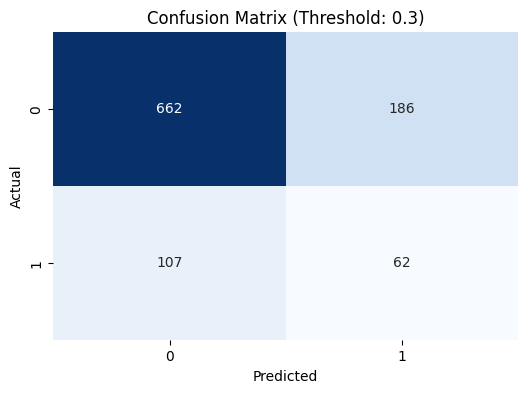

Accuracy: 0.711897738446411
AUC-ROC Score: 0.6435469465222732
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.78      0.82       848
           1       0.25      0.37      0.30       169

    accuracy                           0.71      1017
   macro avg       0.56      0.57      0.56      1017
weighted avg       0.76      0.71      0.73      1017

---------------------------------------------------------

Threshold: 0.4


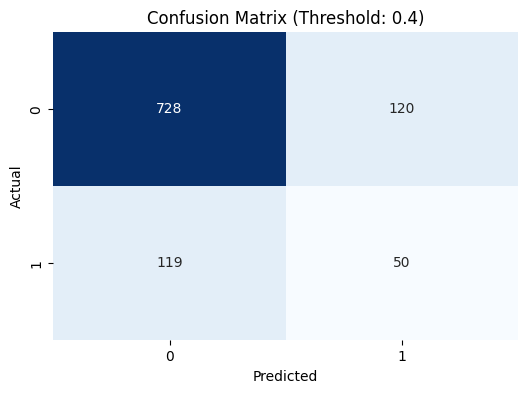

Accuracy: 0.7649950835791544
AUC-ROC Score: 0.6435469465222732
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.86      0.86       848
           1       0.29      0.30      0.29       169

    accuracy                           0.76      1017
   macro avg       0.58      0.58      0.58      1017
weighted avg       0.77      0.76      0.77      1017

---------------------------------------------------------

Threshold: 0.5


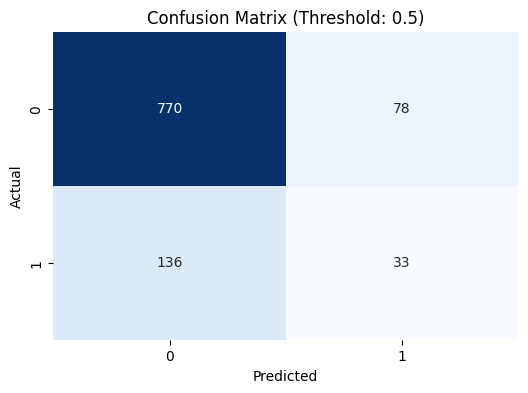

Accuracy: 0.7895771878072763
AUC-ROC Score: 0.6435469465222732
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.91      0.88       848
           1       0.30      0.20      0.24       169

    accuracy                           0.79      1017
   macro avg       0.57      0.55      0.56      1017
weighted avg       0.76      0.79      0.77      1017

---------------------------------------------------------

Threshold: 0.6


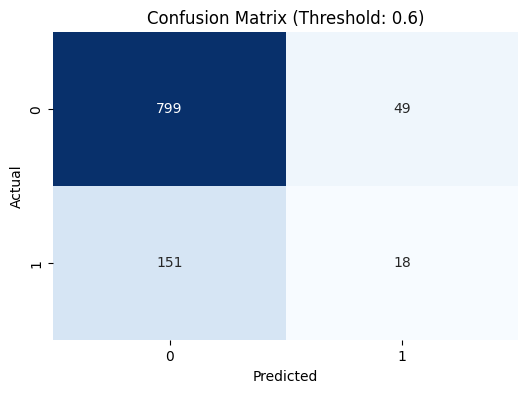

Accuracy: 0.8033431661750245
AUC-ROC Score: 0.6435469465222732
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.94      0.89       848
           1       0.27      0.11      0.15       169

    accuracy                           0.80      1017
   macro avg       0.55      0.52      0.52      1017
weighted avg       0.75      0.80      0.77      1017

---------------------------------------------------------

Threshold: 0.7


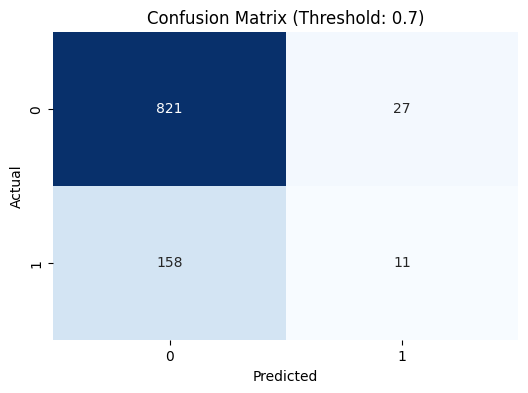

Accuracy: 0.8180924287118977
AUC-ROC Score: 0.6435469465222732
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.97      0.90       848
           1       0.29      0.07      0.11       169

    accuracy                           0.82      1017
   macro avg       0.56      0.52      0.50      1017
weighted avg       0.75      0.82      0.77      1017

---------------------------------------------------------

Threshold: 0.8


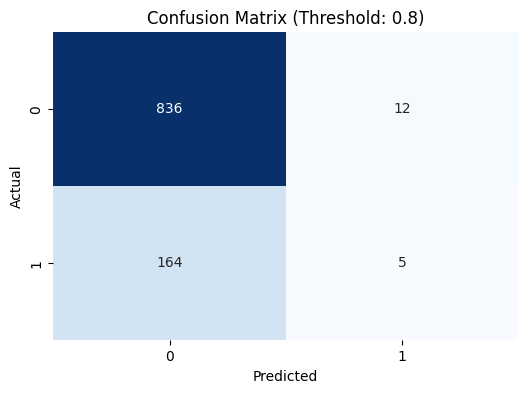

Accuracy: 0.8269419862340216
AUC-ROC Score: 0.6435469465222732
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.99      0.90       848
           1       0.29      0.03      0.05       169

    accuracy                           0.83      1017
   macro avg       0.57      0.51      0.48      1017
weighted avg       0.75      0.83      0.76      1017

---------------------------------------------------------


In [143]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

# Create an XGBoost model
xgb_model = xgb.XGBClassifier(n_estimators=50, random_state=42)

# Train the XGBoost model
xgb_model.fit(X_train_resampled_df, y_train_resampled_df)

# Predict probabilities for the positive class
y_probs_xgb = xgb_model.predict_proba(X_test)[:, 1]

# Vary the threshold and evaluate the performance at each threshold
thresholds = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]  # Adjust these thresholds as needed
for threshold in thresholds:
    y_pred_threshold_xgb = (y_probs_xgb >= threshold).astype(int)

    # Get the confusion matrix
    cm_xgb = confusion_matrix(y_test, y_pred_threshold_xgb)

    print(f"\nThreshold: {threshold}")
    # Plot the confusion matrix as a heatmap with labels
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm_xgb, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"Confusion Matrix (Threshold: {threshold})")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    accuracy_xgb = accuracy_score(y_test, y_pred_threshold_xgb)
    roc_auc_xgb = roc_auc_score(y_test, y_probs_xgb)

    print("Accuracy:", accuracy_xgb)
    print("AUC-ROC Score:", roc_auc_xgb)
    print("Classification Report:\n", classification_report(y_test, y_pred_threshold_xgb))
    print('---------------------------------------------------------')

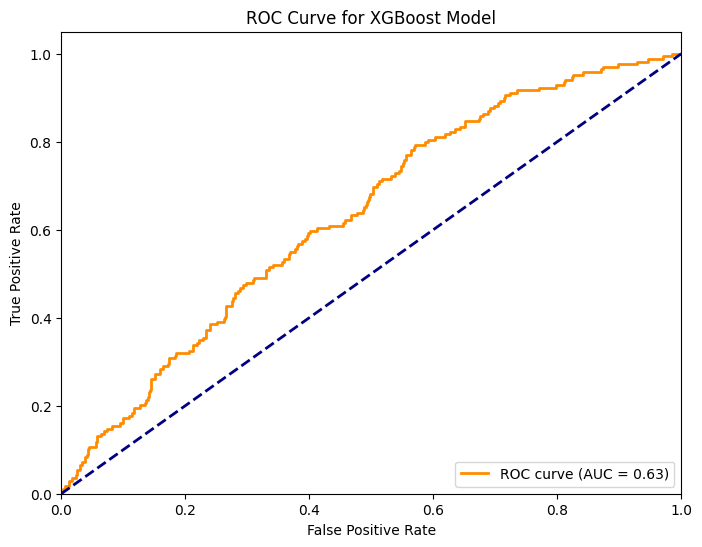

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Plot the ROC curve for the XGBoost model
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, y_probs_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb, tpr_xgb, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc_xgb))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for XGBoost Model')
plt.legend(loc='lower right')
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# Define the parameter grid to search
param_grid_xgb = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
}

# Create an XGBoost model
xgb_model = XGBClassifier(random_state=42)

# Create GridSearchCV for XGBoost
grid_search_xgb = GridSearchCV(xgb_model, param_grid_xgb, cv=5, scoring='roc_auc')

# Fit the model to the training data
grid_search_xgb.fit(X_train_resampled_df, y_train_resampled_df)

# Print the best parameters found by the grid search
print("Best Parameters for XGBoost:", grid_search_xgb.best_params_)

# Get the best XGBoost model
best_xgb_model = grid_search_xgb.best_estimator_

# Evaluate the best XGBoost model on the test set
y_pred_best_xgb = best_xgb_model.predict(X_test)
print("\nClassification Report for Best XGBoost Model:\n", classification_report(y_test, y_pred_best_xgb))


Best Parameters for XGBoost: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 150}

Classification Report for Best XGBoost Model:
               precision    recall  f1-score   support

           0       0.85      0.91      0.88       848
           1       0.28      0.17      0.21       169

    accuracy                           0.79      1017
   macro avg       0.56      0.54      0.55      1017
weighted avg       0.75      0.79      0.77      1017



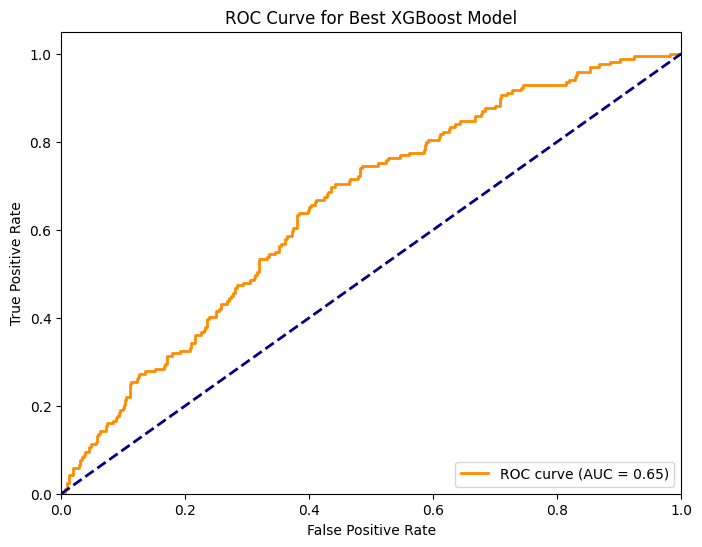

In [ ]:
from sklearn.metrics import roc_curve, auc

# Plot the ROC curve for the best XGBoost model
y_probs_xgb_best = best_xgb_model.predict_proba(X_test)[:, 1]
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, y_probs_xgb_best)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb, tpr_xgb, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc_xgb))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Best XGBoost Model')
plt.legend(loc='lower right')
plt.show()


## NON LINEAR MODELS

### Model 6 - KNN Classifier


Threshold: 0.2


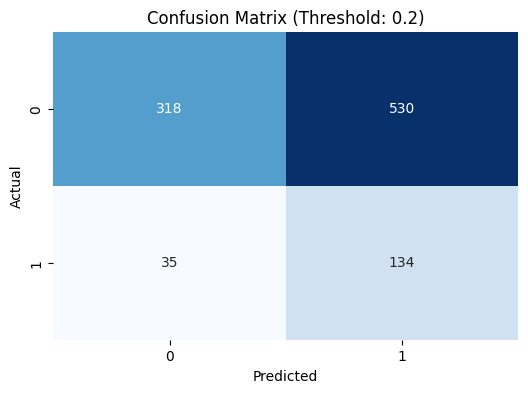

Accuracy: 0.4444444444444444
AUC-ROC Score: 0.6074334319526628
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.38      0.53       848
           1       0.20      0.79      0.32       169

    accuracy                           0.44      1017
   macro avg       0.55      0.58      0.43      1017
weighted avg       0.78      0.44      0.50      1017

---------------------------------------------------------

Threshold: 0.3


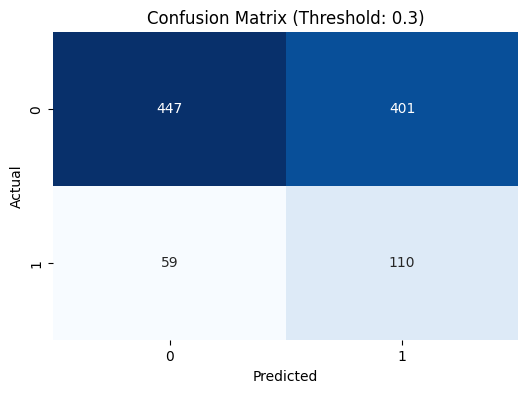

Accuracy: 0.5476892822025565
AUC-ROC Score: 0.6074334319526628
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.53      0.66       848
           1       0.22      0.65      0.32       169

    accuracy                           0.55      1017
   macro avg       0.55      0.59      0.49      1017
weighted avg       0.77      0.55      0.60      1017

---------------------------------------------------------

Threshold: 0.4


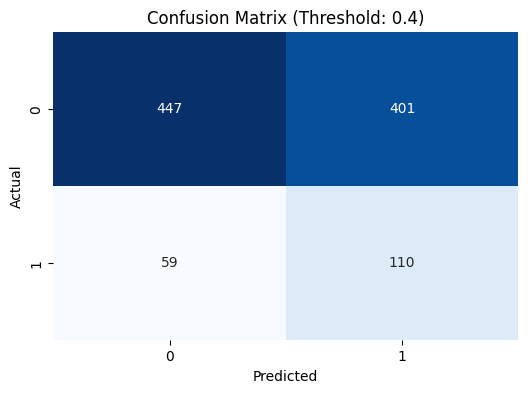

Accuracy: 0.5476892822025565
AUC-ROC Score: 0.6074334319526628
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.53      0.66       848
           1       0.22      0.65      0.32       169

    accuracy                           0.55      1017
   macro avg       0.55      0.59      0.49      1017
weighted avg       0.77      0.55      0.60      1017

---------------------------------------------------------

Threshold: 0.5


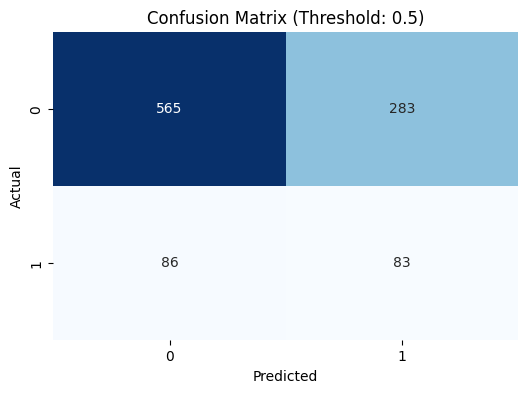

Accuracy: 0.6371681415929203
AUC-ROC Score: 0.6074334319526628
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.67      0.75       848
           1       0.23      0.49      0.31       169

    accuracy                           0.64      1017
   macro avg       0.55      0.58      0.53      1017
weighted avg       0.76      0.64      0.68      1017

---------------------------------------------------------

Threshold: 0.6


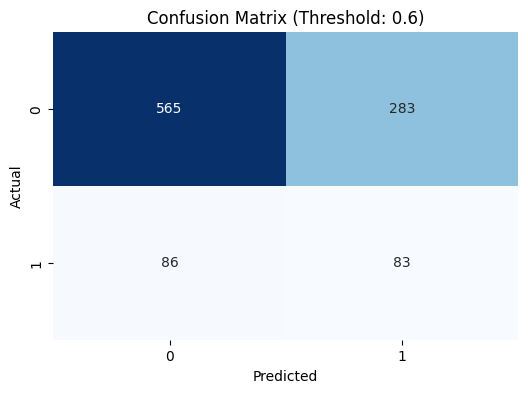

Accuracy: 0.6371681415929203
AUC-ROC Score: 0.6074334319526628
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.67      0.75       848
           1       0.23      0.49      0.31       169

    accuracy                           0.64      1017
   macro avg       0.55      0.58      0.53      1017
weighted avg       0.76      0.64      0.68      1017

---------------------------------------------------------

Threshold: 0.7


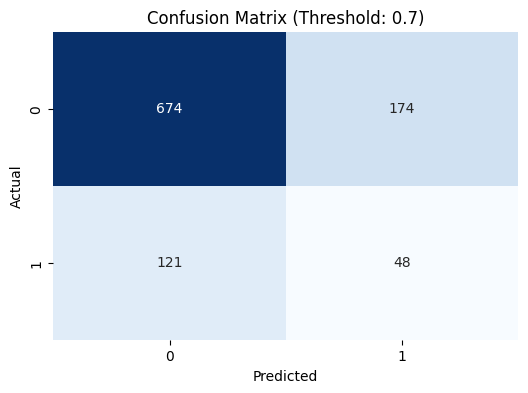

Accuracy: 0.7099311701081613
AUC-ROC Score: 0.6074334319526628
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.79      0.82       848
           1       0.22      0.28      0.25       169

    accuracy                           0.71      1017
   macro avg       0.53      0.54      0.53      1017
weighted avg       0.74      0.71      0.72      1017

---------------------------------------------------------

Threshold: 0.8


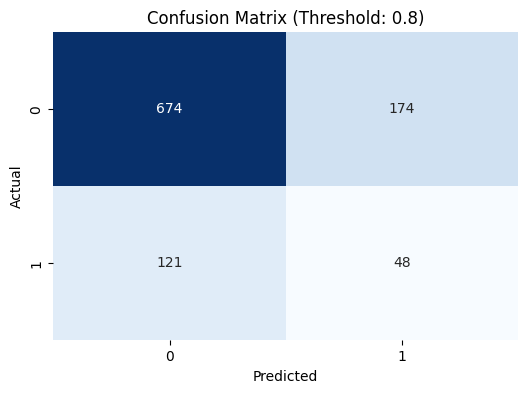

Accuracy: 0.7099311701081613
AUC-ROC Score: 0.6074334319526628
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.79      0.82       848
           1       0.22      0.28      0.25       169

    accuracy                           0.71      1017
   macro avg       0.53      0.54      0.53      1017
weighted avg       0.74      0.71      0.72      1017

---------------------------------------------------------


In [144]:
from sklearn.neighbors import KNeighborsClassifier

# Create a KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)  # Adjust the number of neighbors as needed

# Train the KNN model
knn_model.fit(X_train_resampled_df, y_train_resampled_df)

# Predict probabilities for the positive class
y_probs_knn = knn_model.predict_proba(X_test)[:, 1]

# Vary the threshold and evaluate the performance at each threshold
thresholds = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]  # Adjust these thresholds as needed
for threshold in thresholds:
    y_pred_threshold_knn = (y_probs_knn >= threshold).astype(int)

    # Get the confusion matrix
    cm_knn = confusion_matrix(y_test, y_pred_threshold_knn)

    print(f"\nThreshold: {threshold}")
    # Plot the confusion matrix as a heatmap with labels
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"Confusion Matrix (Threshold: {threshold})")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    accuracy_knn = accuracy_score(y_test, y_pred_threshold_knn)
    roc_auc_knn = roc_auc_score(y_test, y_probs_knn)

    print("Accuracy:", accuracy_knn)
    print("AUC-ROC Score:", roc_auc_knn)
    print("Classification Report:\n", classification_report(y_test, y_pred_threshold_knn))
    print('---------------------------------------------------------')

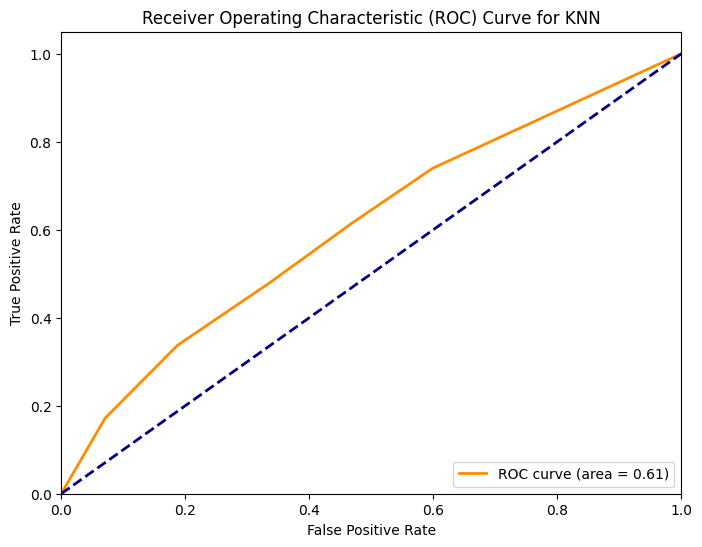

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, y_probs_knn)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for KNN')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Define the parameter grid to search for KNN
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],  # Adjust these values as needed
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Create a KNN model
knn_model = KNeighborsClassifier()

# Create GridSearchCV for KNN
grid_search_knn = GridSearchCV(knn_model, param_grid_knn, cv=5, scoring='roc_auc')

# Fit the model to the training data
grid_search_knn.fit(X_train_resampled_df, y_train_resampled_df)

# Print the best parameters found by the grid search
print("Best Parameters for KNN:", grid_search_knn.best_params_)

# Get the best KNN model
best_knn_model = grid_search_knn.best_estimator_

# Evaluate the best KNN model on the test set
y_pred_best_knn = best_knn_model.predict(X_test)
print("\nClassification Report for Best KNN Model:\n", classification_report(y_test, y_pred_best_knn))

Best Parameters for KNN: {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}

Classification Report for Best KNN Model:
               precision    recall  f1-score   support

           0       0.88      0.66      0.75       848
           1       0.24      0.53      0.33       169

    accuracy                           0.64      1017
   macro avg       0.56      0.59      0.54      1017
weighted avg       0.77      0.64      0.68      1017



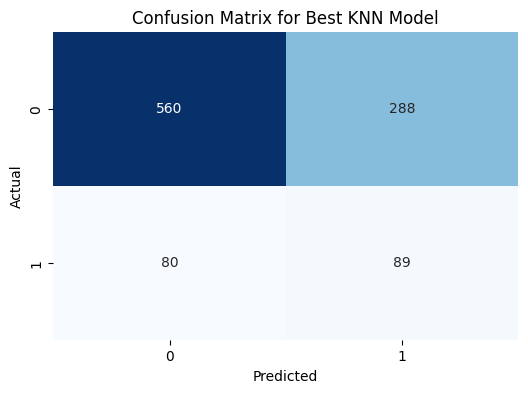

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Get the confusion matrix for the best KNN model
cm_knn = confusion_matrix(y_test, y_pred_best_knn)

# Plot the confusion matrix as a heatmap with labels
plt.figure(figsize=(6, 4))
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix for Best KNN Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


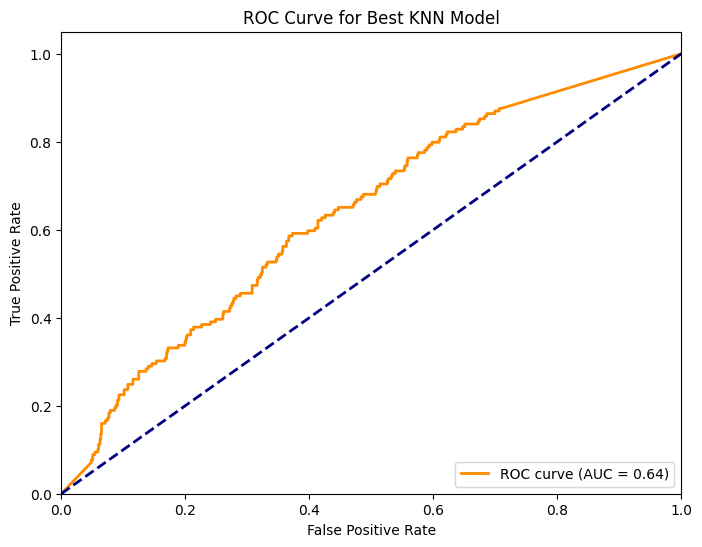

In [ ]:
from sklearn.metrics import roc_curve, auc

# Get the probabilities for the positive class
y_probs_knn = best_knn_model.predict_proba(X_test)[:, 1]

# Compute the ROC curve
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_probs_knn)

# Compute the AUC score
roc_auc_knn = auc(fpr_knn, tpr_knn)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_knn, tpr_knn, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc_knn))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Best KNN Model')
plt.legend(loc='lower right')
plt.show()

### Model 7 - Naive Bayes Classifier


Threshold: 0.2


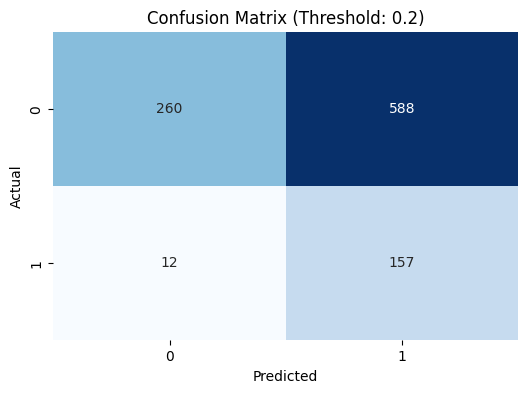

Accuracy: 0.41002949852507375
AUC-ROC Score: 0.7102126828179078
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.31      0.46       848
           1       0.21      0.93      0.34       169

    accuracy                           0.41      1017
   macro avg       0.58      0.62      0.40      1017
weighted avg       0.83      0.41      0.44      1017

---------------------------------------------------------

Threshold: 0.3


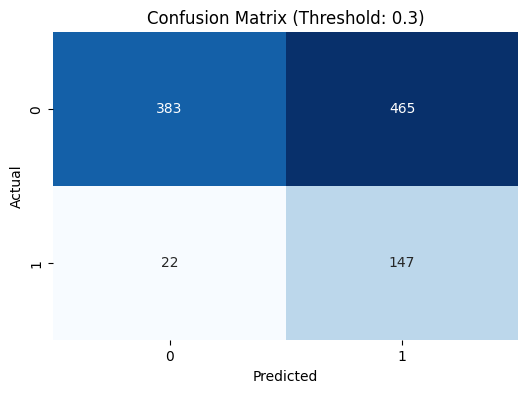

Accuracy: 0.5211406096361848
AUC-ROC Score: 0.7102126828179078
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.45      0.61       848
           1       0.24      0.87      0.38       169

    accuracy                           0.52      1017
   macro avg       0.59      0.66      0.49      1017
weighted avg       0.83      0.52      0.57      1017

---------------------------------------------------------

Threshold: 0.4


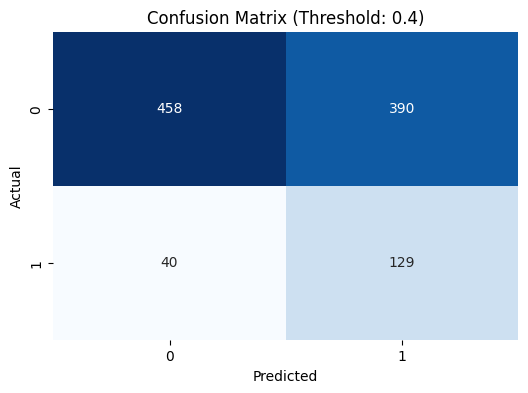

Accuracy: 0.5771878072763028
AUC-ROC Score: 0.7102126828179078
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.54      0.68       848
           1       0.25      0.76      0.38       169

    accuracy                           0.58      1017
   macro avg       0.58      0.65      0.53      1017
weighted avg       0.81      0.58      0.63      1017

---------------------------------------------------------

Threshold: 0.5


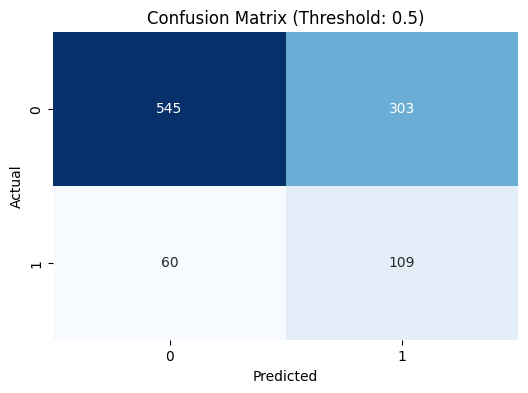

Accuracy: 0.6430678466076696
AUC-ROC Score: 0.7102126828179078
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.64      0.75       848
           1       0.26      0.64      0.38       169

    accuracy                           0.64      1017
   macro avg       0.58      0.64      0.56      1017
weighted avg       0.80      0.64      0.69      1017

---------------------------------------------------------

Threshold: 0.6


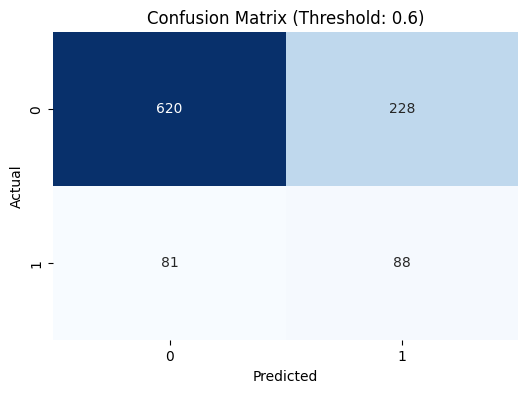

Accuracy: 0.696165191740413
AUC-ROC Score: 0.7102126828179078
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.73      0.80       848
           1       0.28      0.52      0.36       169

    accuracy                           0.70      1017
   macro avg       0.58      0.63      0.58      1017
weighted avg       0.78      0.70      0.73      1017

---------------------------------------------------------

Threshold: 0.7


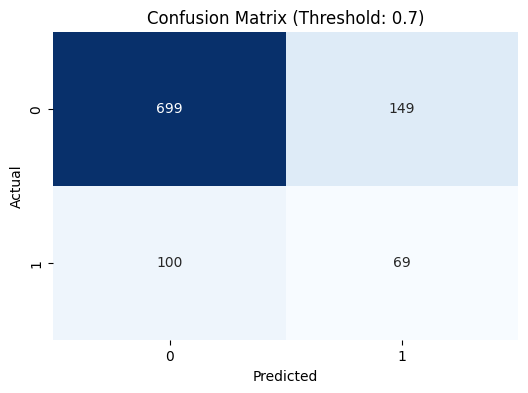

Accuracy: 0.7551622418879056
AUC-ROC Score: 0.7102126828179078
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.82      0.85       848
           1       0.32      0.41      0.36       169

    accuracy                           0.76      1017
   macro avg       0.60      0.62      0.60      1017
weighted avg       0.78      0.76      0.77      1017

---------------------------------------------------------

Threshold: 0.8


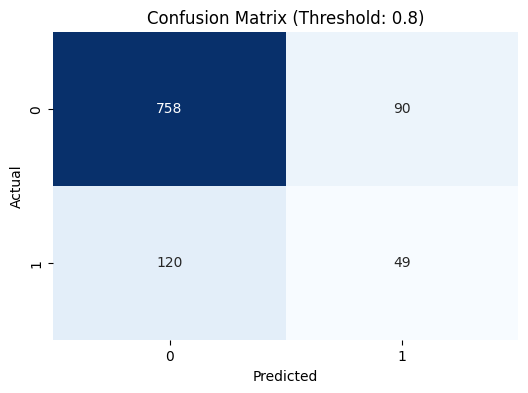

Accuracy: 0.7935103244837758
AUC-ROC Score: 0.7102126828179078
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.89      0.88       848
           1       0.35      0.29      0.32       169

    accuracy                           0.79      1017
   macro avg       0.61      0.59      0.60      1017
weighted avg       0.78      0.79      0.79      1017

---------------------------------------------------------


In [145]:
from sklearn.naive_bayes import GaussianNB

# Create a Naive Bayes model
nb_model = GaussianNB()

# Train the Naive Bayes model
nb_model.fit(X_train_resampled_df, y_train_resampled_df)

# Predict probabilities for the positive class
y_probs_nb = nb_model.predict_proba(X_test)[:, 1]

# Vary the threshold and evaluate the performance at each threshold
thresholds = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]  # Adjust these thresholds as needed
for threshold in thresholds:
    y_pred_threshold_nb = (y_probs_nb >= threshold).astype(int)

    # Get the confusion matrix
    cm_nb = confusion_matrix(y_test, y_pred_threshold_nb)

    print(f"\nThreshold: {threshold}")
    # Plot the confusion matrix as a heatmap with labels
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm_nb, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"Confusion Matrix (Threshold: {threshold})")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    accuracy_nb = accuracy_score(y_test, y_pred_threshold_nb)
    roc_auc_nb = roc_auc_score(y_test, y_probs_nb)

    print("Accuracy:", accuracy_nb)
    print("AUC-ROC Score:", roc_auc_nb)
    print("Classification Report:\n", classification_report(y_test, y_pred_threshold_nb))
    print('---------------------------------------------------------')


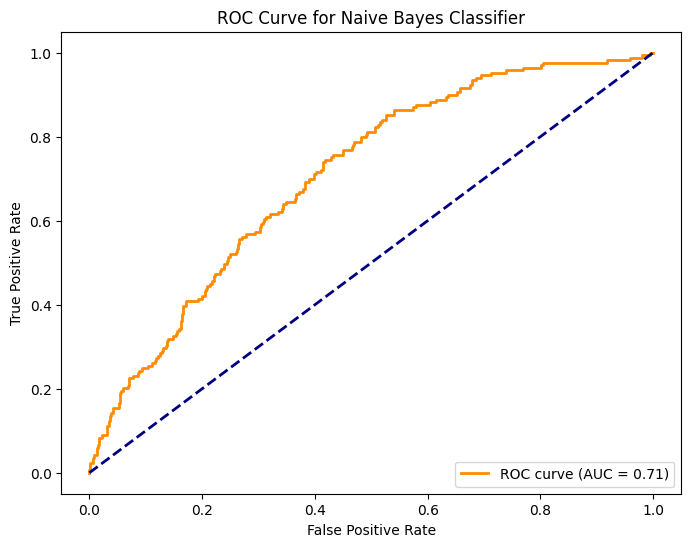

In [ ]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and ROC area for each class
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test, y_probs_nb)
roc_auc_nb = auc(fpr_nb, tpr_nb)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_nb, tpr_nb, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_nb:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Naive Bayes Classifier')
plt.legend(loc='lower right')
plt.show()


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB

# Create a Naive Bayes model
nb_model = GaussianNB()

# Define the parameter grid to search
param_grid_nb = {}  # No hyperparameters for Gaussian Naive Bayes

# Create GridSearchCV for Naive Bayes
grid_search_nb = GridSearchCV(nb_model, param_grid_nb, cv=5, scoring='roc_auc')

# Fit the model to the training data
grid_search_nb.fit(X_train_resampled_df, y_train_resampled_df)

# Print the best parameters found by the grid search
print("Best Parameters for Naive Bayes:", grid_search_nb.best_params_)

# Get the best Naive Bayes model
best_nb_model = grid_search_nb.best_estimator_

# Evaluate the best Naive Bayes model on the test set
y_pred_best_nb = best_nb_model.predict(X_test)
print("\nClassification Report for Best Naive Bayes Model:\n", classification_report(y_test, y_pred_best_nb))


Best Parameters for Naive Bayes: {}

Classification Report for Best Naive Bayes Model:
               precision    recall  f1-score   support

           0       0.90      0.62      0.74       848
           1       0.26      0.67      0.37       169

    accuracy                           0.63      1017
   macro avg       0.58      0.64      0.55      1017
weighted avg       0.80      0.63      0.68      1017



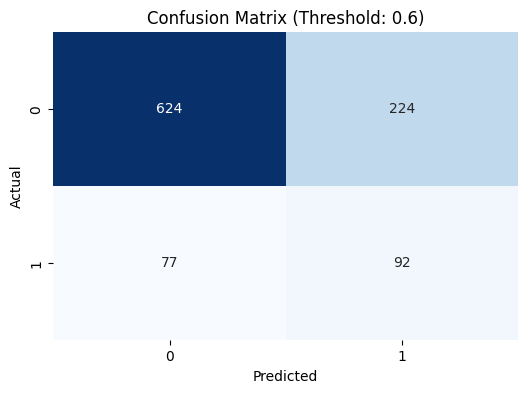

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Predict probabilities for the positive class using the best Naive Bayes model
y_probs_nb = best_nb_model.predict_proba(X_test)[:, 1]

# Choose a threshold (you can adjust this based on your preference)
threshold = 0.6
y_pred_threshold_nb = (y_probs_nb >= threshold).astype(int)

# Get the confusion matrix
cm_nb = confusion_matrix(y_test, y_pred_threshold_nb)

# Plot the confusion matrix as a heatmap with labels
plt.figure(figsize=(6, 4))
sns.heatmap(cm_nb, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title(f"Confusion Matrix (Threshold: {threshold})")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


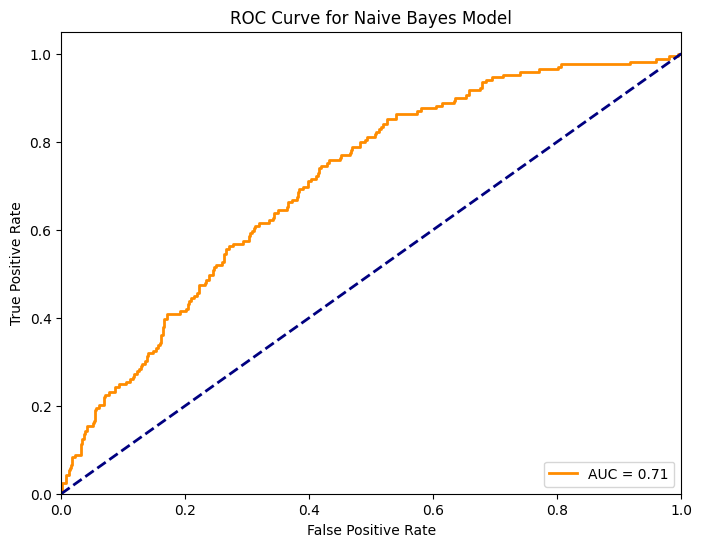

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Calculate the ROC curve
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test, y_probs_nb)

# Calculate the area under the ROC curve
roc_auc_nb = auc(fpr_nb, tpr_nb)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_nb, tpr_nb, color='darkorange', lw=2, label=f'AUC = {roc_auc_nb:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Naive Bayes Model')
plt.legend(loc='lower right')
plt.show()

###Model 8 - SVM CLASSIFIER


Threshold: 0.2


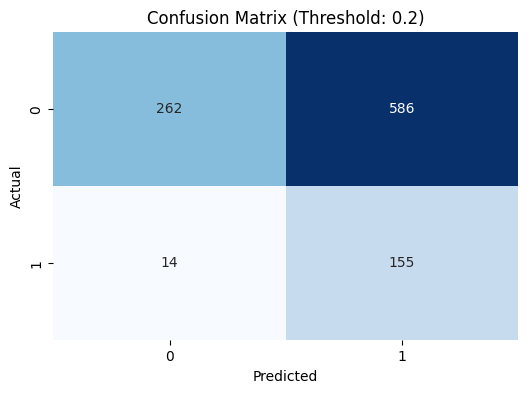

Accuracy: 0.41002949852507375
AUC-ROC Score: 0.6863626214134197
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.31      0.47       848
           1       0.21      0.92      0.34       169

    accuracy                           0.41      1017
   macro avg       0.58      0.61      0.40      1017
weighted avg       0.83      0.41      0.45      1017

---------------------------------------------------------

Threshold: 0.3


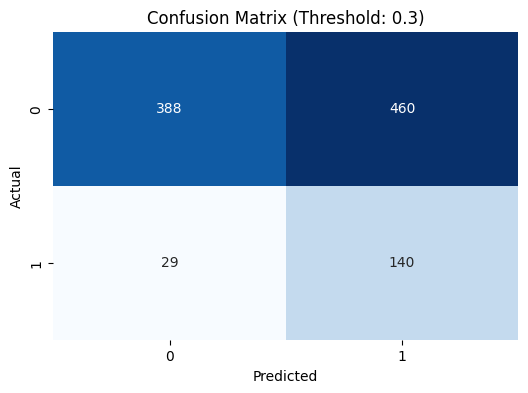

Accuracy: 0.5191740412979351
AUC-ROC Score: 0.6863626214134197
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.46      0.61       848
           1       0.23      0.83      0.36       169

    accuracy                           0.52      1017
   macro avg       0.58      0.64      0.49      1017
weighted avg       0.81      0.52      0.57      1017

---------------------------------------------------------

Threshold: 0.4


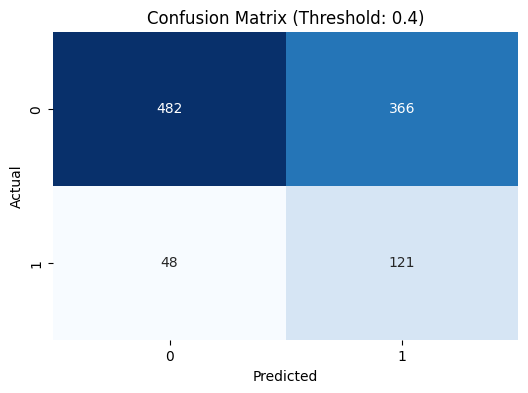

Accuracy: 0.5929203539823009
AUC-ROC Score: 0.6863626214134197
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.57      0.70       848
           1       0.25      0.72      0.37       169

    accuracy                           0.59      1017
   macro avg       0.58      0.64      0.53      1017
weighted avg       0.80      0.59      0.64      1017

---------------------------------------------------------

Threshold: 0.5


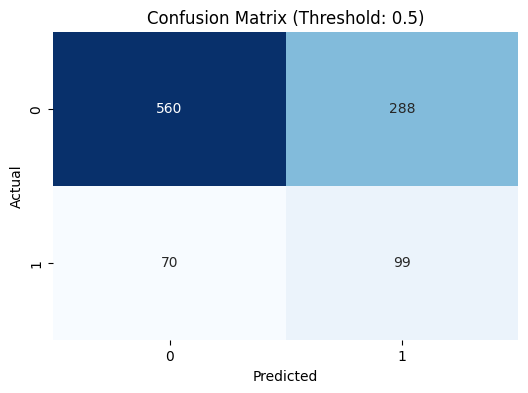

Accuracy: 0.647984267453294
AUC-ROC Score: 0.6863626214134197
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.66      0.76       848
           1       0.26      0.59      0.36       169

    accuracy                           0.65      1017
   macro avg       0.57      0.62      0.56      1017
weighted avg       0.78      0.65      0.69      1017

---------------------------------------------------------

Threshold: 0.6


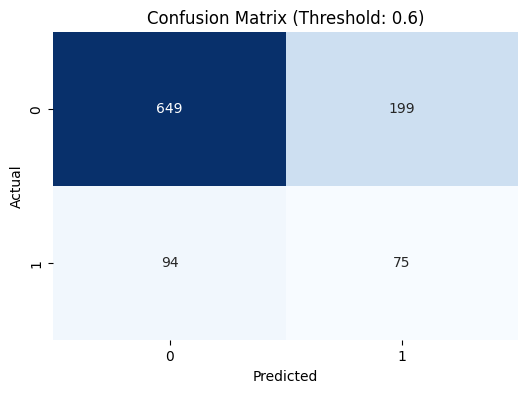

Accuracy: 0.711897738446411
AUC-ROC Score: 0.6863626214134197
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.77      0.82       848
           1       0.27      0.44      0.34       169

    accuracy                           0.71      1017
   macro avg       0.57      0.60      0.58      1017
weighted avg       0.77      0.71      0.74      1017

---------------------------------------------------------

Threshold: 0.7


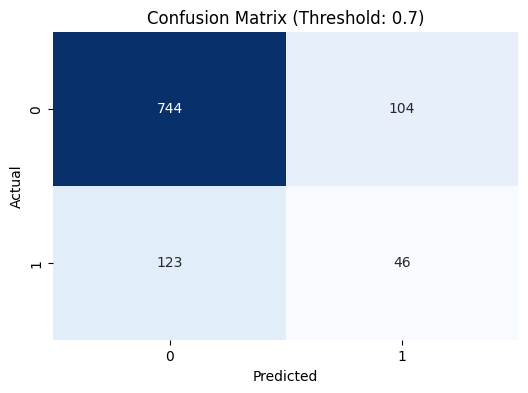

Accuracy: 0.7767944936086529
AUC-ROC Score: 0.6863626214134197
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.88      0.87       848
           1       0.31      0.27      0.29       169

    accuracy                           0.78      1017
   macro avg       0.58      0.57      0.58      1017
weighted avg       0.77      0.78      0.77      1017

---------------------------------------------------------

Threshold: 0.8


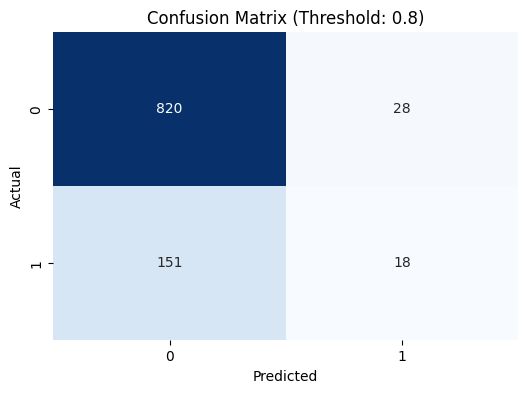

Accuracy: 0.823992133726647
AUC-ROC Score: 0.6863626214134197
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.97      0.90       848
           1       0.39      0.11      0.17       169

    accuracy                           0.82      1017
   macro avg       0.62      0.54      0.53      1017
weighted avg       0.77      0.82      0.78      1017

---------------------------------------------------------


In [146]:
from sklearn.svm import SVC

# Create an SVM model
svm_model = SVC(probability=True, random_state=42)

# Train the SVM model
svm_model.fit(X_train_resampled_df, y_train_resampled_df)

# Predict probabilities for the positive class
y_probs_svm = svm_model.predict_proba(X_test)[:, 1]

# Vary the threshold and evaluate the performance at each threshold
thresholds_svm = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]  # Adjust these thresholds as needed
for threshold_svm in thresholds_svm:
    y_pred_threshold_svm = (y_probs_svm >= threshold_svm).astype(int)

    # Get the confusion matrix
    cm_svm = confusion_matrix(y_test, y_pred_threshold_svm)

    print(f"\nThreshold: {threshold_svm}")
    # Plot the confusion matrix as a heatmap with labels
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"Confusion Matrix (Threshold: {threshold_svm})")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    accuracy_svm = accuracy_score(y_test, y_pred_threshold_svm)
    roc_auc_svm = roc_auc_score(y_test, y_probs_svm)

    print("Accuracy:", accuracy_svm)
    print("AUC-ROC Score:", roc_auc_svm)
    print("Classification Report:\n", classification_report(y_test, y_pred_threshold_svm))
    print('---------------------------------------------------------')

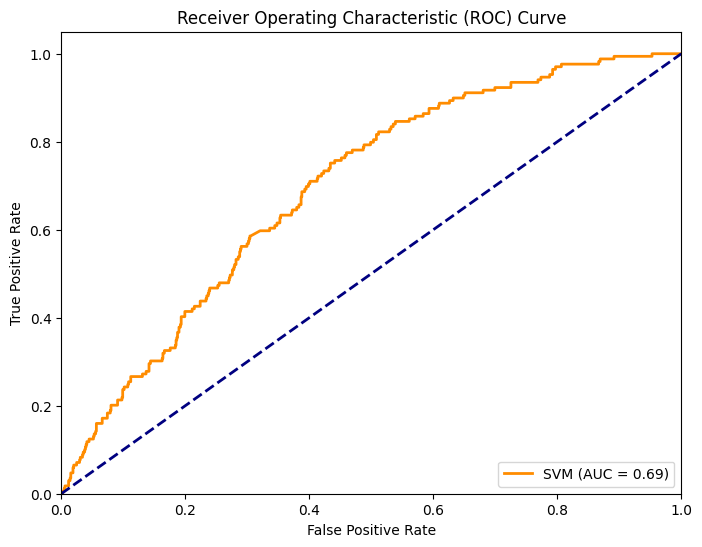

In [ ]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and ROC area for each class
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, y_probs_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_svm, tpr_svm, color='darkorange', lw=2, label=f'SVM (AUC = {roc_auc_svm:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto', 0.1, 1]
}

# Create an SVM model
svm_model = SVC(probability=True, random_state=42)

# Create GridSearchCV for SVM
grid_search_svm = GridSearchCV(svm_model, param_grid_svm, cv=5, scoring='roc_auc')

# Fit the model to the training data
grid_search_svm.fit(X_train_resampled_df, y_train_resampled_df)

# Print the best parameters found by the grid search
print("Best Parameters for SVM:", grid_search_svm.best_params_)

# Get the best SVM model
best_svm_model = grid_search_svm.best_estimator_

# Evaluate the best SVM model on the test set
y_pred_best_svm = best_svm_model.predict(X_test)
print("\nClassification Report for Best SVM Model:\n", classification_report(y_test, y_pred_best_svm))


Best Parameters for SVM: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}

Classification Report for Best SVM Model:
               precision    recall  f1-score   support

           0       0.86      0.72      0.78       848
           1       0.23      0.42      0.30       169

    accuracy                           0.67      1017
   macro avg       0.54      0.57      0.54      1017
weighted avg       0.76      0.67      0.70      1017



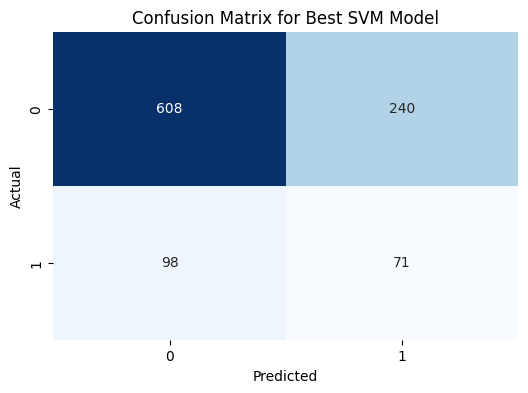

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Get the confusion matrix for the best SVM model
cm_svm = confusion_matrix(y_test, y_pred_best_svm)

# Plot the confusion matrix as a heatmap with labels
plt.figure(figsize=(6, 4))
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix for Best SVM Model")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


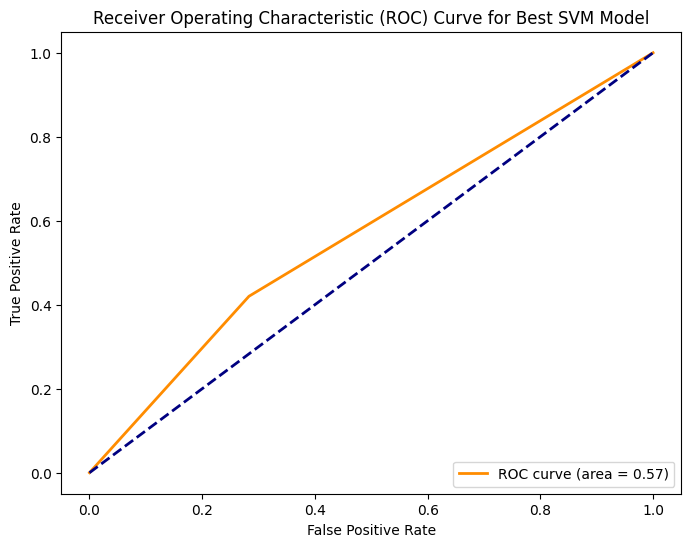

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test, y_pred_best_svm)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Best SVM Model')
plt.legend(loc="lower right")
plt.show()


###Model 9 - Neural Network


Threshold: 0.2


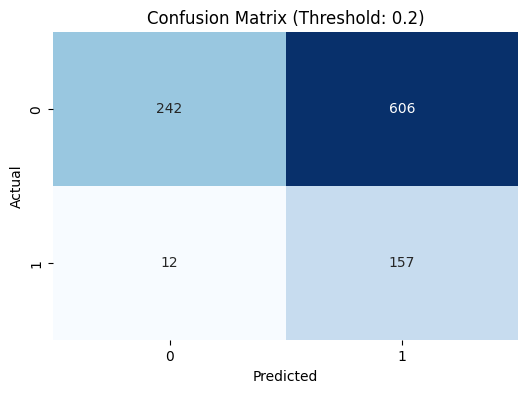

Accuracy: 0.39233038348082594
AUC-ROC Score: 0.7025371218041755
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.29      0.44       848
           1       0.21      0.93      0.34       169

    accuracy                           0.39      1017
   macro avg       0.58      0.61      0.39      1017
weighted avg       0.83      0.39      0.42      1017

---------------------------------------------------------

Threshold: 0.3


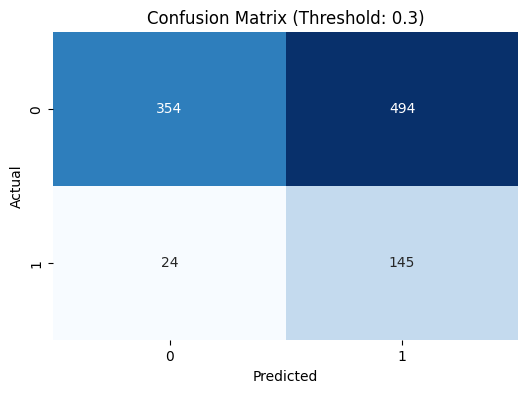

Accuracy: 0.49065880039331367
AUC-ROC Score: 0.7025371218041755
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.42      0.58       848
           1       0.23      0.86      0.36       169

    accuracy                           0.49      1017
   macro avg       0.58      0.64      0.47      1017
weighted avg       0.82      0.49      0.54      1017

---------------------------------------------------------

Threshold: 0.4


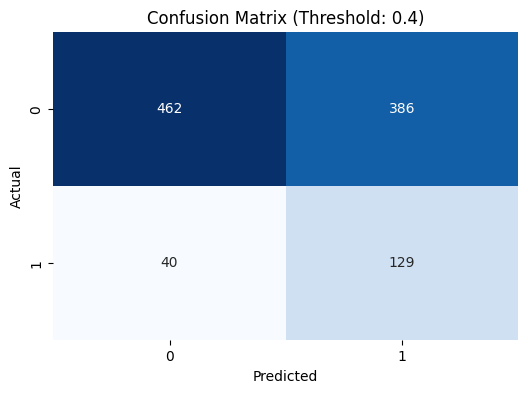

Accuracy: 0.5811209439528023
AUC-ROC Score: 0.7025371218041755
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.54      0.68       848
           1       0.25      0.76      0.38       169

    accuracy                           0.58      1017
   macro avg       0.59      0.65      0.53      1017
weighted avg       0.81      0.58      0.63      1017

---------------------------------------------------------

Threshold: 0.5


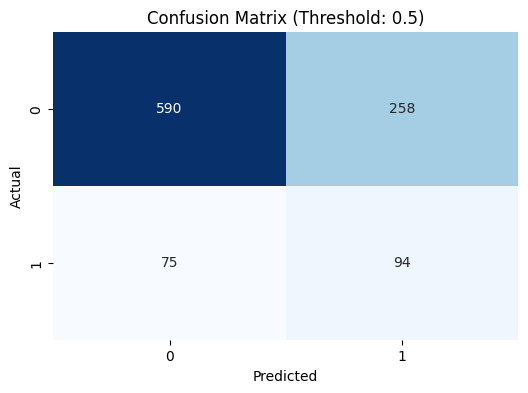

Accuracy: 0.672566371681416
AUC-ROC Score: 0.7025371218041755
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.70      0.78       848
           1       0.27      0.56      0.36       169

    accuracy                           0.67      1017
   macro avg       0.58      0.63      0.57      1017
weighted avg       0.78      0.67      0.71      1017

---------------------------------------------------------

Threshold: 0.6


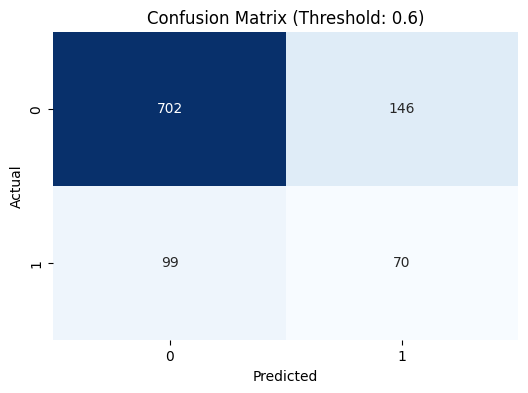

Accuracy: 0.7590953785644051
AUC-ROC Score: 0.7025371218041755
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.83      0.85       848
           1       0.32      0.41      0.36       169

    accuracy                           0.76      1017
   macro avg       0.60      0.62      0.61      1017
weighted avg       0.78      0.76      0.77      1017

---------------------------------------------------------

Threshold: 0.7


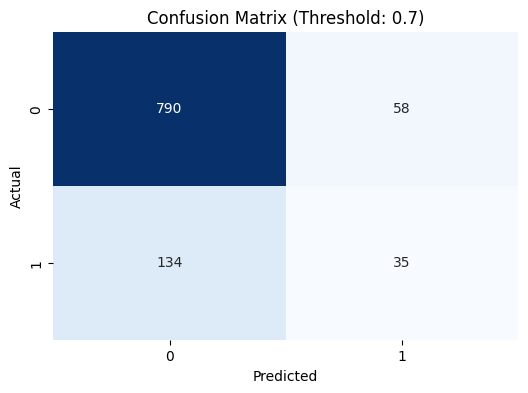

Accuracy: 0.8112094395280236
AUC-ROC Score: 0.7025371218041755
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.93      0.89       848
           1       0.38      0.21      0.27       169

    accuracy                           0.81      1017
   macro avg       0.62      0.57      0.58      1017
weighted avg       0.78      0.81      0.79      1017

---------------------------------------------------------

Threshold: 0.8


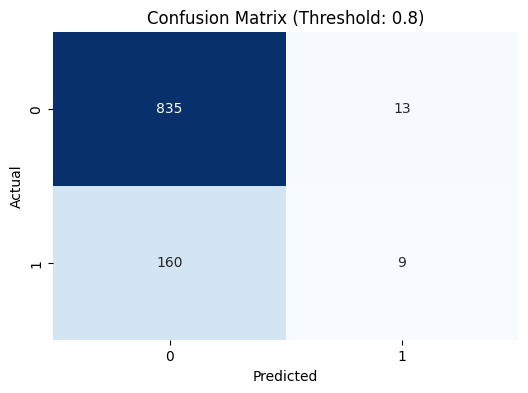

Accuracy: 0.8298918387413963
AUC-ROC Score: 0.7025371218041755
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.98      0.91       848
           1       0.41      0.05      0.09       169

    accuracy                           0.83      1017
   macro avg       0.62      0.52      0.50      1017
weighted avg       0.77      0.83      0.77      1017

---------------------------------------------------------


In [147]:
from sklearn.neural_network import MLPClassifier

# Create a Neural Network model
nn_model = MLPClassifier(random_state=42)

# Train the Neural Network model
nn_model.fit(X_train_resampled_df, y_train_resampled_df)

# Predict probabilities for the positive class
y_probs_nn = nn_model.predict_proba(X_test)[:, 1]

# Vary the threshold and evaluate the performance at each threshold
thresholds_nn = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]  # Adjust these thresholds as needed
for threshold_nn in thresholds_nn:
    y_pred_threshold_nn = (y_probs_nn >= threshold_nn).astype(int)

    # Get the confusion matrix
    cm_nn = confusion_matrix(y_test, y_pred_threshold_nn)

    print(f"\nThreshold: {threshold_nn}")
    # Plot the confusion matrix as a heatmap with labels
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm_nn, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"Confusion Matrix (Threshold: {threshold_nn})")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    accuracy_nn = accuracy_score(y_test, y_pred_threshold_nn)
    roc_auc_nn = roc_auc_score(y_test, y_probs_nn)

    print("Accuracy:", accuracy_nn)
    print("AUC-ROC Score:", roc_auc_nn)
    print("Classification Report:\n", classification_report(y_test, y_pred_threshold_nn))
    print('---------------------------------------------------------')


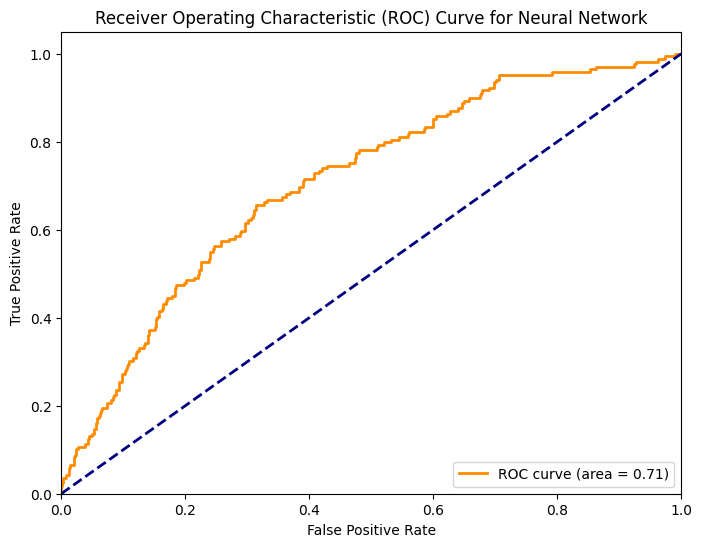

In [ ]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and ROC area for each class
fpr, tpr, thresholds = roc_curve(y_test, y_probs_nn)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Neural Network')
plt.legend(loc="lower right")
plt.show()


Best Parameters for Neural Network: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (100, 50), 'learning_rate': 'constant'}

Classification Report for Best Neural Network Model:
               precision    recall  f1-score   support

           0       0.89      0.63      0.74       848
           1       0.25      0.62      0.36       169

    accuracy                           0.63      1017
   macro avg       0.57      0.62      0.55      1017
weighted avg       0.79      0.63      0.68      1017



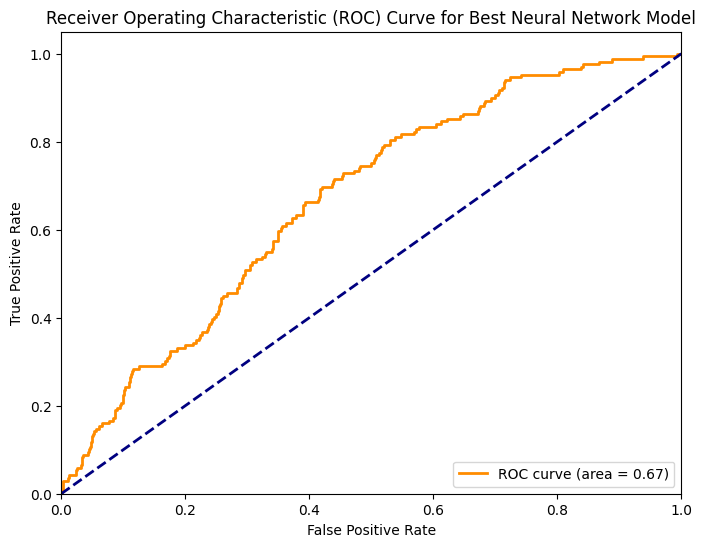

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

# Define the parameter grid to search
param_grid_nn = {
    'hidden_layer_sizes': [(50,), (100,), (100, 50)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'invscaling', 'adaptive']
}

# Create a Neural Network model
nn_model = MLPClassifier(random_state=42)

# Create GridSearchCV for Neural Network
grid_search_nn = GridSearchCV(nn_model, param_grid_nn, cv=5, scoring='roc_auc')

# Fit the model to the training data
grid_search_nn.fit(X_train_resampled_df, y_train_resampled_df)

# Print the best parameters found by the grid search
print("Best Parameters for Neural Network:", grid_search_nn.best_params_)

# Get the best Neural Network model
best_nn_model = grid_search_nn.best_estimator_

# Evaluate the best Neural Network model on the test set
y_probs_best_nn = best_nn_model.predict_proba(X_test)[:, 1]
y_pred_best_nn = best_nn_model.predict(X_test)

# Display the results
print("\nClassification Report for Best Neural Network Model:\n", classification_report(y_test, y_pred_best_nn))

# Plot ROC curve for the best Neural Network model
fpr_best_nn, tpr_best_nn, _ = roc_curve(y_test, y_probs_best_nn)
roc_auc_best_nn = auc(fpr_best_nn, tpr_best_nn)

plt.figure(figsize=(8, 6))
plt.plot(fpr_best_nn, tpr_best_nn, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_best_nn))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Best Neural Network Model')
plt.legend(loc="lower right")
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Get the predictions for the best Neural Network model
y_pred_best_nn = best_nn_model.predict(X_test)

# Calculate the confusion matrix
cm_best_nn = confusion_matrix(y_test, y_pred_best_nn)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm_best_nn, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix for Best Neural Network Model")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***